In [ ]:
import time
import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from sklearn.svm import SVC
from scipy import stats
import plotly.express as px
from sklearn.utils import resample
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV # Grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # Random search cross validation

In [ ]:
col_names = ['ID','Diagnosis','radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','oncave_points1','symmetry1','fractal_dimension1','radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave_points2','symmetry2','fractal_dimension2','radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3','symmetry3','fractal_dimension3']

In [ ]:
from google.colab import files
files.upload()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_excel('DatasetV2.xlsx', header=None, names=col_names)
df.head()
#df.describe()

Saving DatasetV2.xlsx to DatasetV2 (1).xlsx


ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  oncave_points1  ...  radius3  texture3  \
0       0.27760      0.3001         0.14710  ...    25.38     17.33   
1       0.07864      0.0869         0.07017  ...    24.99     23.41   
2       0.15990      0.1974         0.12790  ...    23.57     25.53   
3       0.28390      0.2414         0.10520  ...    14.91     26.50   
4       0.13280      0.1980         0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   

   symmetry3  fractal_dimension3  
0     0.4601             0.11890  
1     0.2750             0.08902  
2     0.3613             0.08758  
3     0.6638             0.17300  
4     0.2364             0.07678  

[5 rows x 32 columns]

In [ ]:
df.dtypes

ID                      int64
Diagnosis              object
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
oncave_points1        float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
dtype: object

In [ ]:
df.columns

Index(['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'oncave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   oncave_points1      569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [ ]:
print("El número de registros es: ", df.shape[0])
print("El número de atributos es: ", df.shape[1])

El número de registros es:  569
El número de atributos es:  32


In [ ]:
df.isnull().sum()

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
oncave_points1        0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [ ]:
df['radius1'].fillna(df['radius1'].mean(), inplace=True)
df.isnull().sum()

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
oncave_points1        0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [ ]:
df.describe().round(3)

ID   radius1  texture1  perimeter1     area1  smoothness1  \
count  5.690000e+02   569.000   569.000     569.000   569.000      569.000   
mean   3.037183e+07   706.771    19.290      91.969   654.889        0.096   
std    1.250206e+08  2430.243     4.301      24.299   351.914        0.014   
min    8.670000e+03     7.760     9.710      43.790   143.500        0.053   
25%    8.692180e+05    12.210    16.170      75.170   420.300        0.086   
50%    9.060240e+05    13.850    18.840      86.240   551.100        0.096   
75%    8.813129e+06    17.680    21.800     104.100   782.700        0.105   
max    9.113205e+08  9904.000    39.280     188.500  2501.000        0.163   

       compactness1  concavity1  oncave_points1  symmetry1  ...   radius3  \
count       569.000     569.000         569.000    569.000  ...   569.000   
mean          0.104       0.089           0.049      0.181  ...   315.195   
std           0.053       0.080           0.039      0.027  ...  1655.459   
min           0.019       0.000           0.000      0.106  ...     7.930   
25%           0.065       0.030           0.020      0.162  ...    13.180   
50%           0.093       0.062           0.034      0.179  ...    15.150   
75%           0.130       0.131           0.074      0.196  ...    19.850   
max           0.345       0.427           0.201      0.304  ...  9981.000   

       texture3  perimeter3     area3  smoothness3  compactness3  concavity3  \
count   569.000     569.000   569.000      569.000       569.000     569.000   
mean     25.677     107.261   880.583        0.132         2.112       4.410   
std       6.146      33.603   569.357        0.023        44.343      69.929   
min      12.020      50.410   185.200        0.071         0.027       0.000   
25%      21.080      84.110   515.300        0.117         0.147       0.114   
50%      25.410      97.660   686.500        0.131         0.212       0.227   
75%      29.720     125.400  1084.000        0.146         0.339       0.383   
max      49.540     251.200  4254.000        0.223      1058.000    1252.000   

       concave_points3  symmetry3  fractal_dimension3  
count          569.000    569.000             569.000  
mean             0.115      0.290               0.084  
std              0.066      0.062               0.018  
min              0.000      0.156               0.055  
25%              0.065      0.250               0.071  
50%              0.100      0.282               0.080  
75%              0.161      0.318               0.092  
max              0.291      0.664               0.208  

[8 rows x 31 columns]

In [ ]:
categorical_features=df.select_dtypes(include=['object']).columns[1:]
print(categorical_features)

Index([], dtype='object')


In [ ]:
for variable in categorical_features[:-1]:
    # Histogram
    countplot_fig = px.histogram(df, x=df[variable].value_counts().index, y=df[variable].value_counts().values,title=f'Conteo para {variable}')
    countplot_fig.update_traces(texttemplate='%{y}', textposition='outside')
    countplot_fig.update_xaxes(categoryorder='total ascending')
    # Pie chart
    counts = df[variable].value_counts()
    labels = counts.index
    pie_chart_fig = px.pie(names=labels, values=counts, title=f'Gráfico de Torta para {variable}',
                        labels={'names': '', 'values': ''},
                        hole=0.3)

    # Mostrar leyenda al pie chart usando las etiquetas del índice
    pie_chart_fig.update_traces(textinfo='percent+label', pull=[0.05]*len(labels))

    # Guardar y mostrar la figura

    countplot_fig.write_html(f"{variable}_countplot.html")
    pie_chart_fig.write_html(f"{variable}_pie_chart.html")
    countplot_fig.show()
    pie_chart_fig.show()

In [ ]:
numerical_features = df.select_dtypes(include=['number']).columns
print(numerical_features)

Index(['ID', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'oncave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')


In [ ]:
def stars(radius1):
    """
    Returns a string of asterisks (*) based on the significance level (alpha value) of a statistical test.

    Args:
        p (float): the p-value of the statistical test

    Returns:
        A string of asterisks indicating the significance level, as follows:
        - five asterisks (*****): alpha value is 0.0001 or 0.01% with 99.99% confidence
        - four asterisks (****): alpha value is 0.001 or 0.1% with 99.9% confidence
        - three asterisks (***): alpha value is 0.01 or 1% with 99% confidence
        - two asterisks (**): alpha value is 0.05 or 5% with 95% confidence
        - one asterisk (*): alpha value is 0.1 or 10% with 90% confidence
        - empty string (''): alpha value is greater than or equal to 0.1
    """
    if radius1 < 0.0001:
        return '*****'
    elif radius1 < 0.001:
        return '****'
    elif radius1 < 0.01:
        return '***'
    elif radius1 < 0.05:
        return '**'
    elif radius1 < 0.1:
        return '*'
    else:
        return ''

In [ ]:
def plot_correlations(dataframe, corr_methods):
    for method in corr_methods:
        stroke = withStroke(linewidth=2, foreground='black')
        corr_matrix = dataframe.corr(method=method)
        pval_matrix = dataframe.corr(method=lambda x, y: stats.pearsonr(x, y)[1])

        # Create a mask to show only the lower triangle of the matrix
        mask = np.triu(np.ones_like(corr_matrix))
        mask2 = np.tril(np.ones_like(corr_matrix))
        stars_corr = pval_matrix * mask2 + mask
        pval_stars = stars_corr.applymap(stars)
        color_palette = sns.color_palette("Blues")
        with sns.axes_style("whitegrid"):
            f, ax = plt.subplots(figsize=(12, 10))
            ax = sns.heatmap(corr_matrix.round(4),
                            mask=mask,
                            vmax=1,
                            center=0,
                            vmin=-1,
                            square=True,
                            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True),
                            linewidths=.5,
                            annot=True,
                            annot_kws={"size": 12},
                            fmt='.2f')
            ax.set_title(f'{method.capitalize()} Correlations Matrix', fontsize=20)
            plt.xticks(fontsize=9)
            plt.yticks(fontsize=9)

            for i, j in itertools.product(range(corr_matrix.shape[0]), range(corr_matrix.shape[0])):
                ax.text(j + 0.5, i + 0.8, pval_stars.iloc[i, j], ha='center', va='center', color='white', fontsize=18,path_effects=[stroke])

            plt.savefig((f'correlation_vi_{method.capitalize()}_triangular_stage.png'), dpi=300, bbox_inches='tight')
            plt.show()

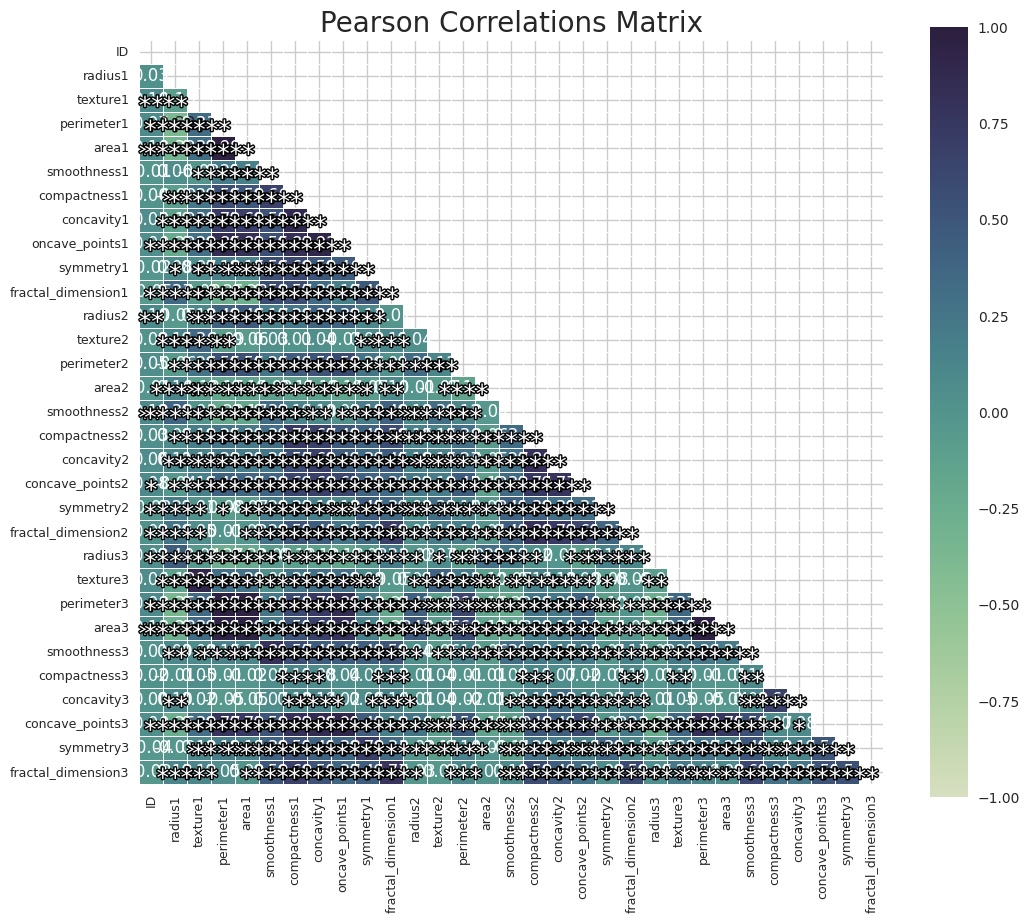

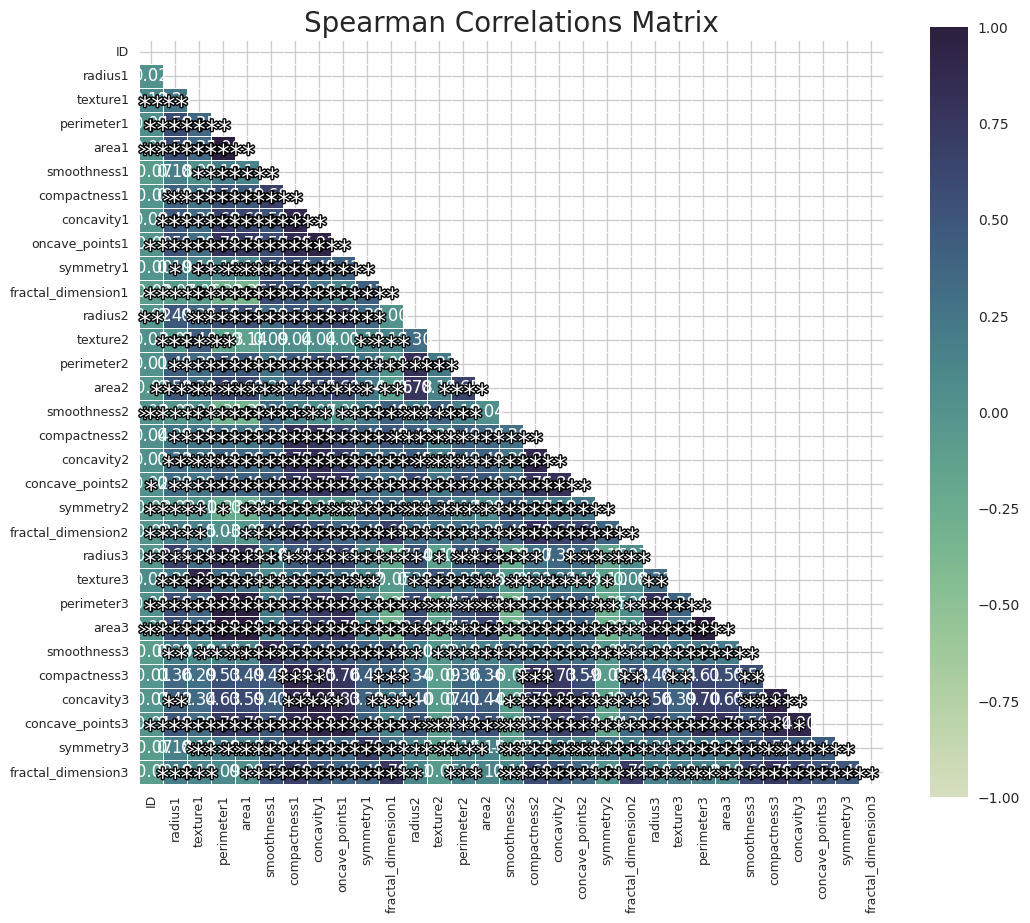

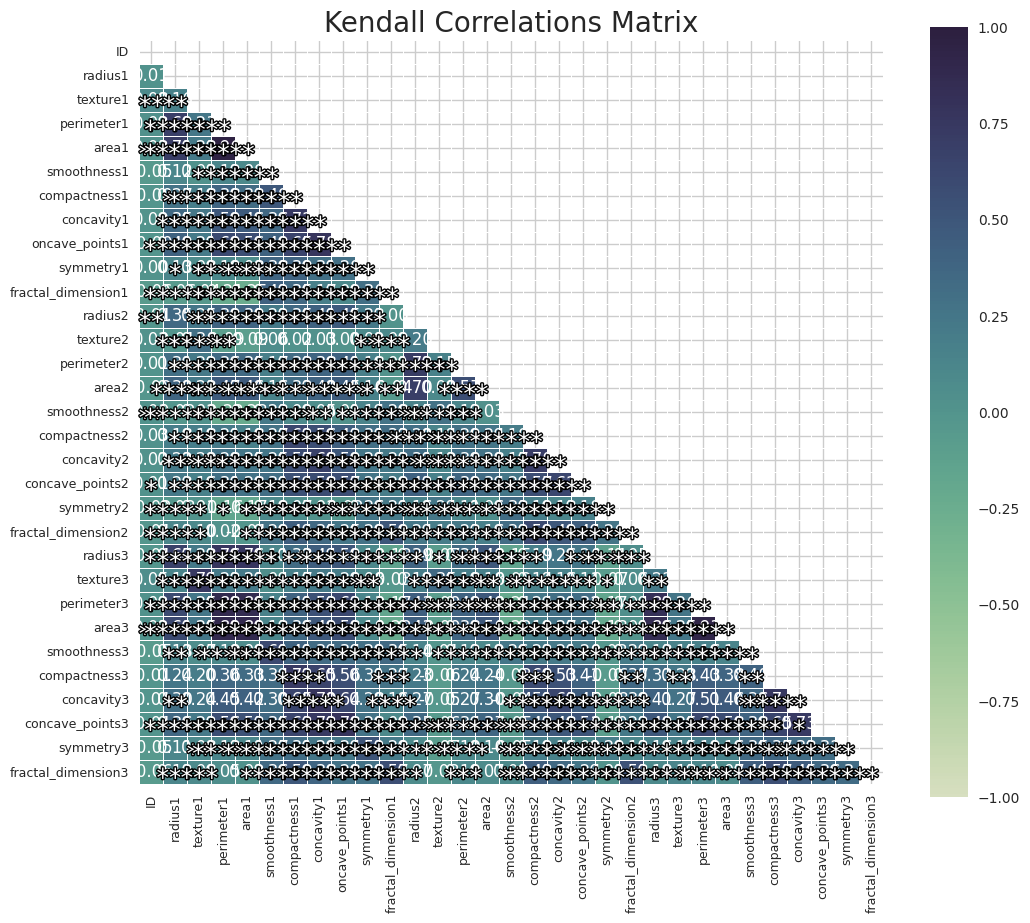

In [ ]:
correlation_methods = ['pearson','spearman','kendall']
plot_correlations(df[numerical_features],correlation_methods)

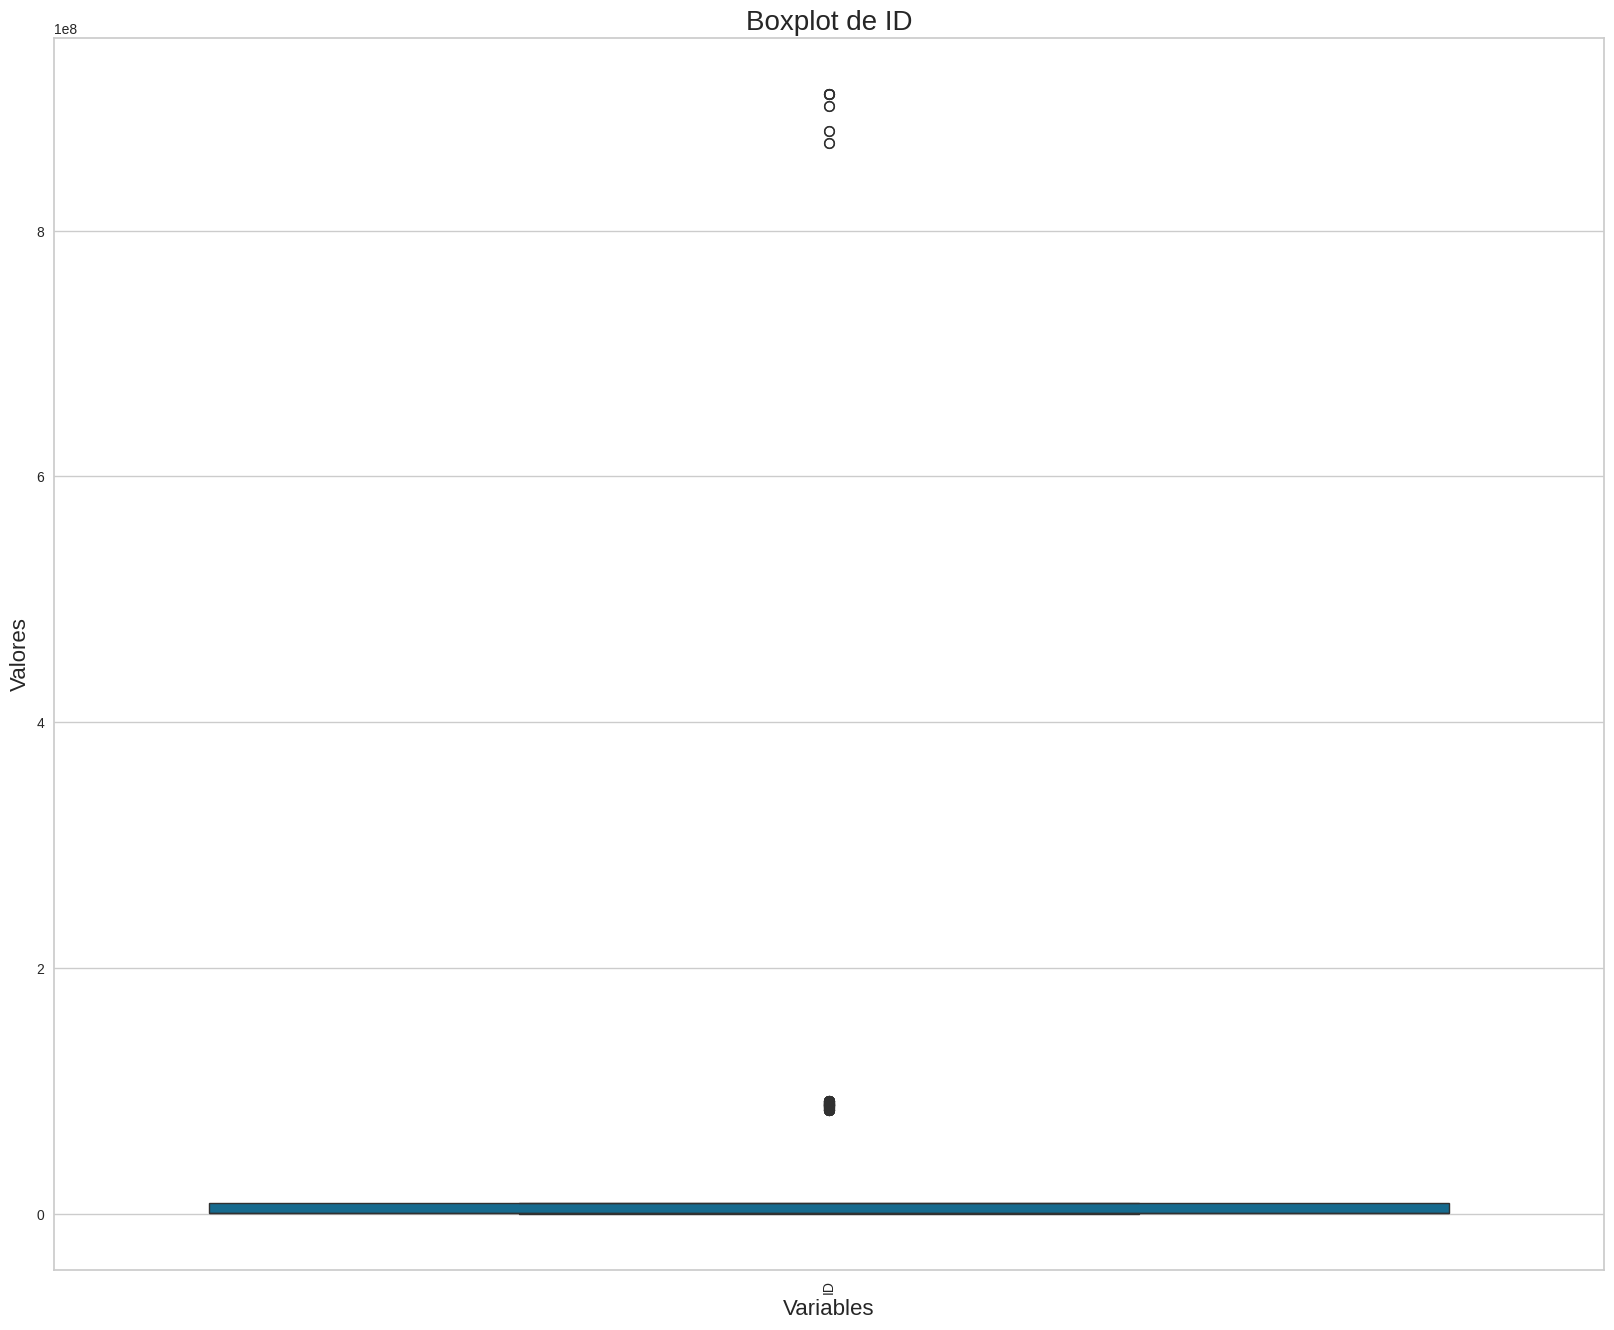

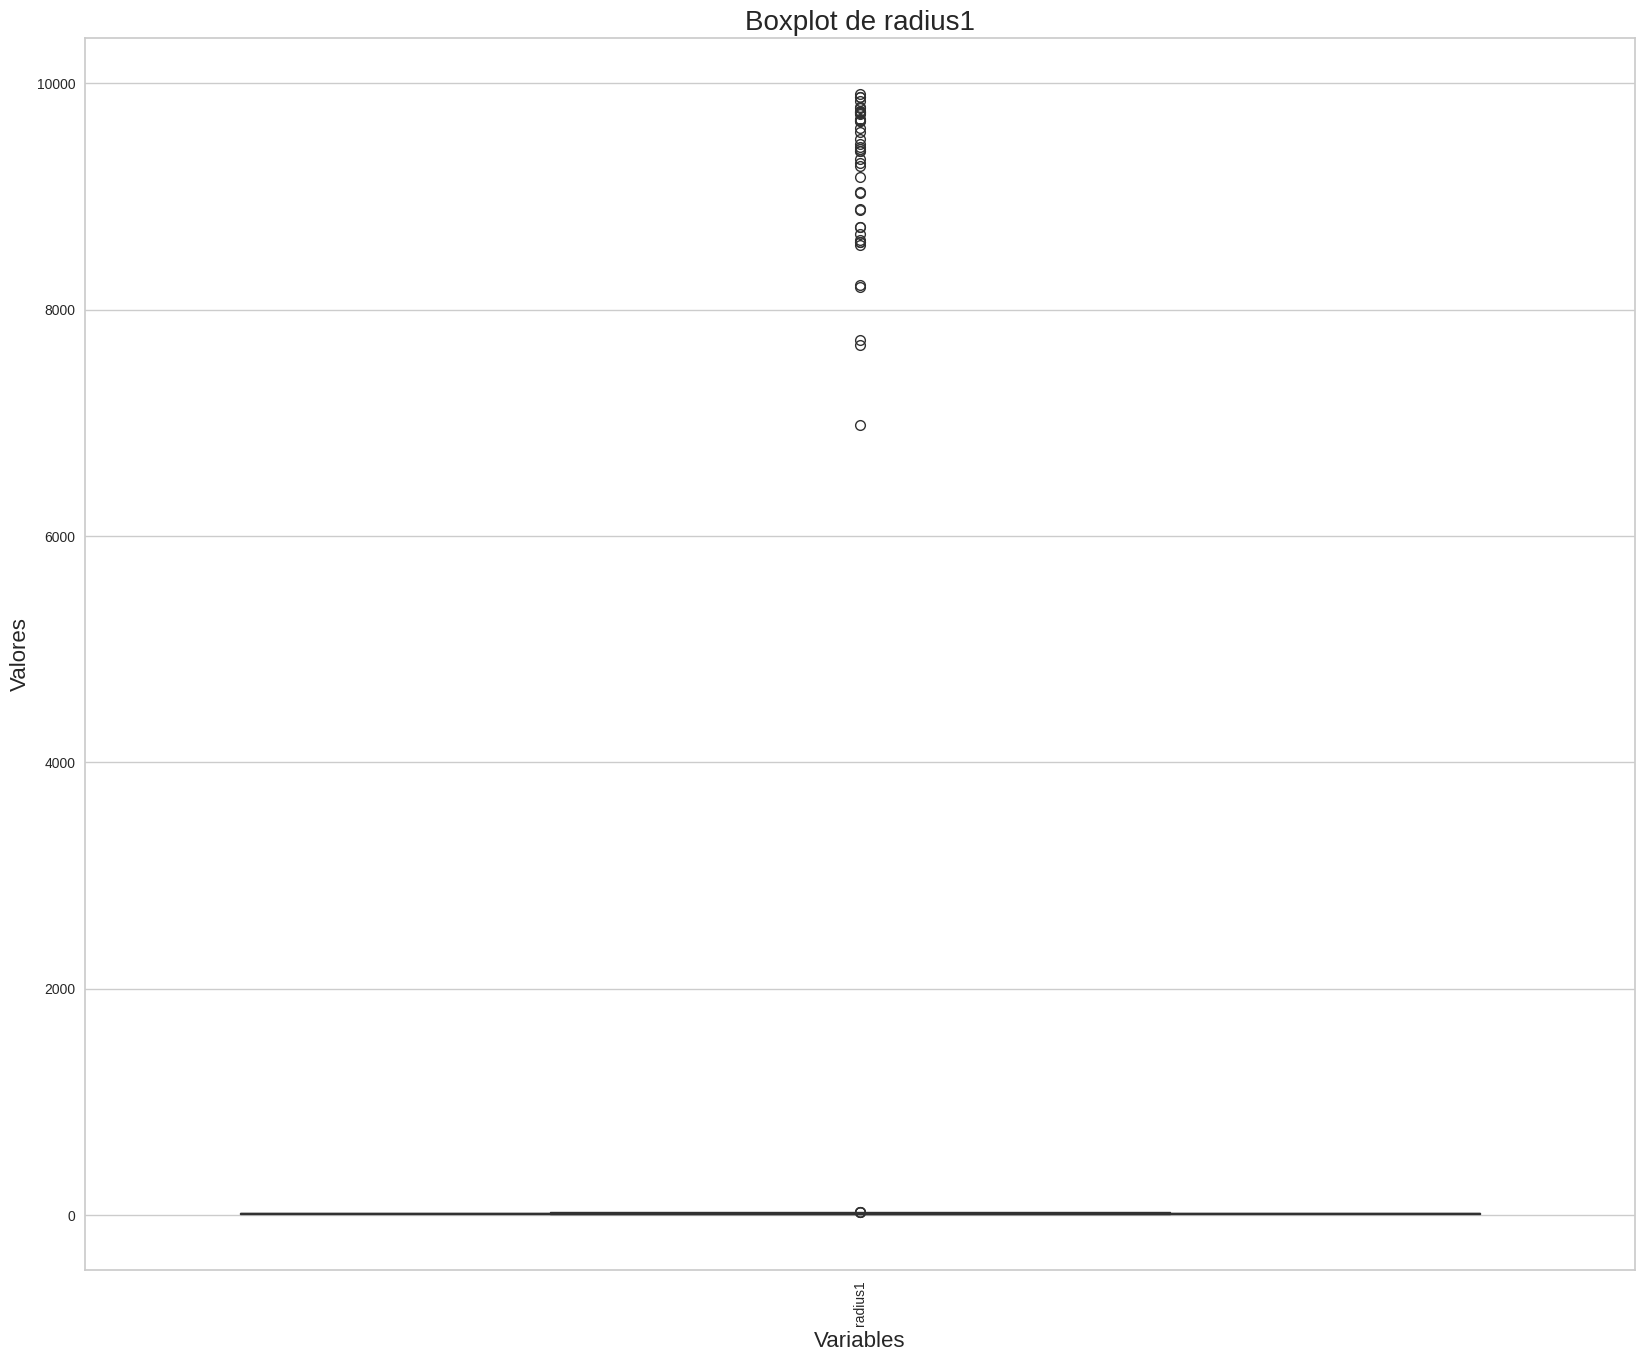

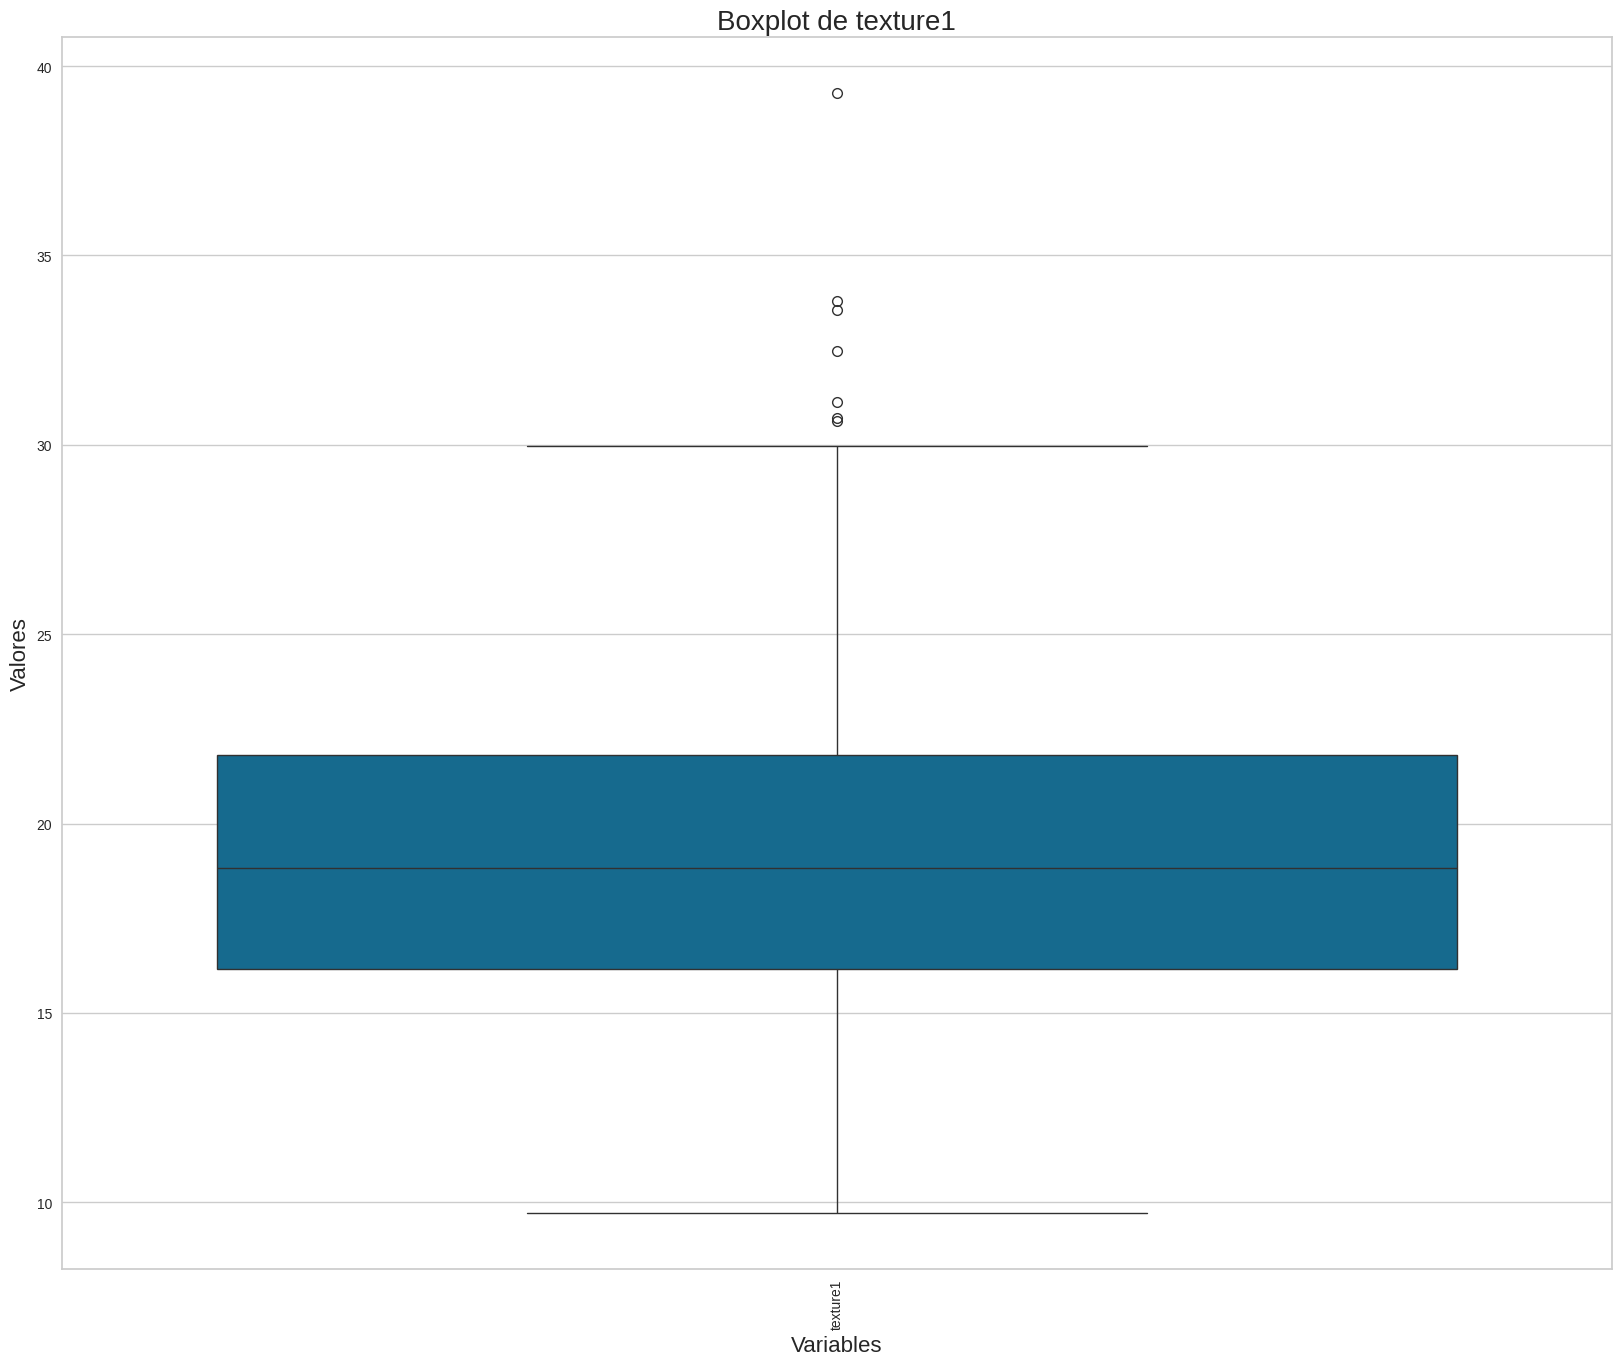

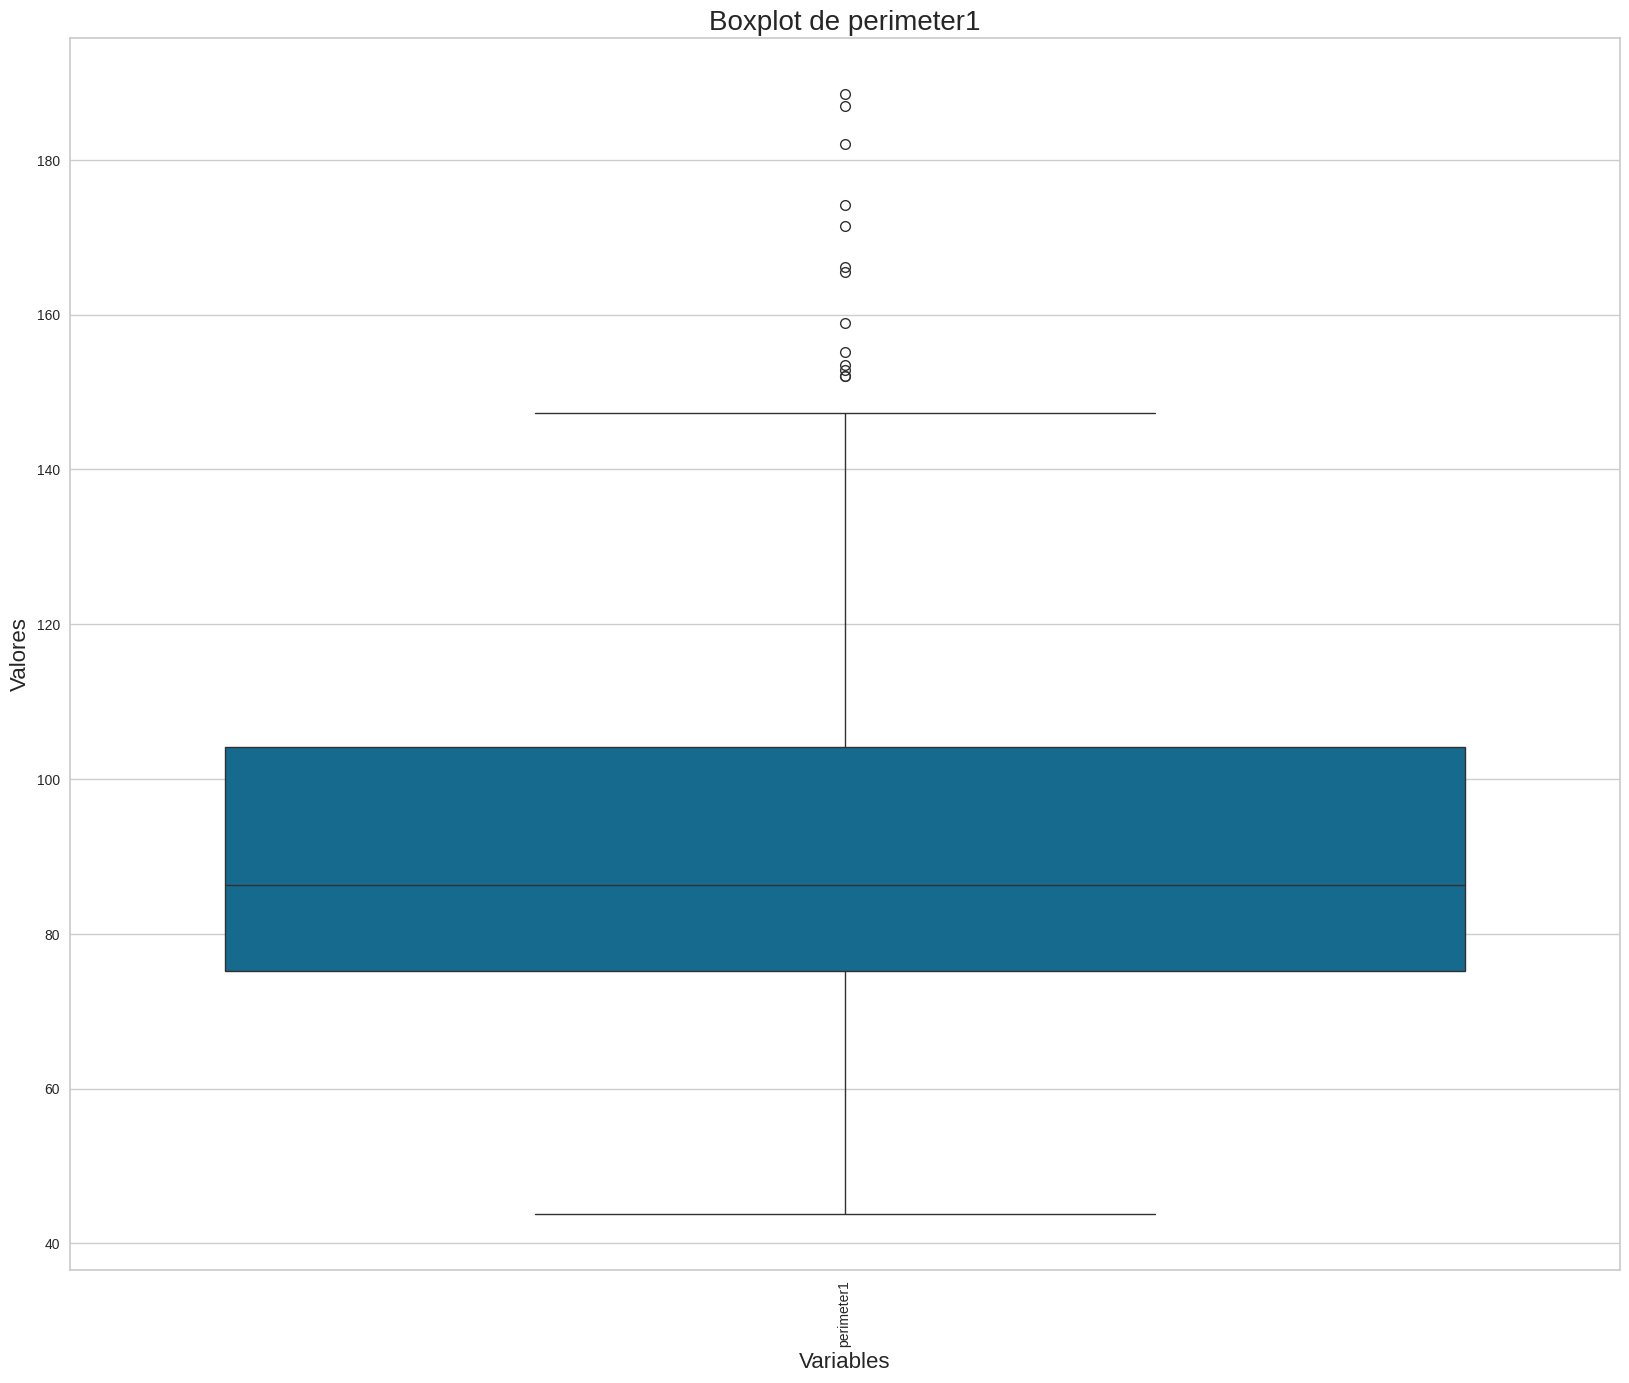

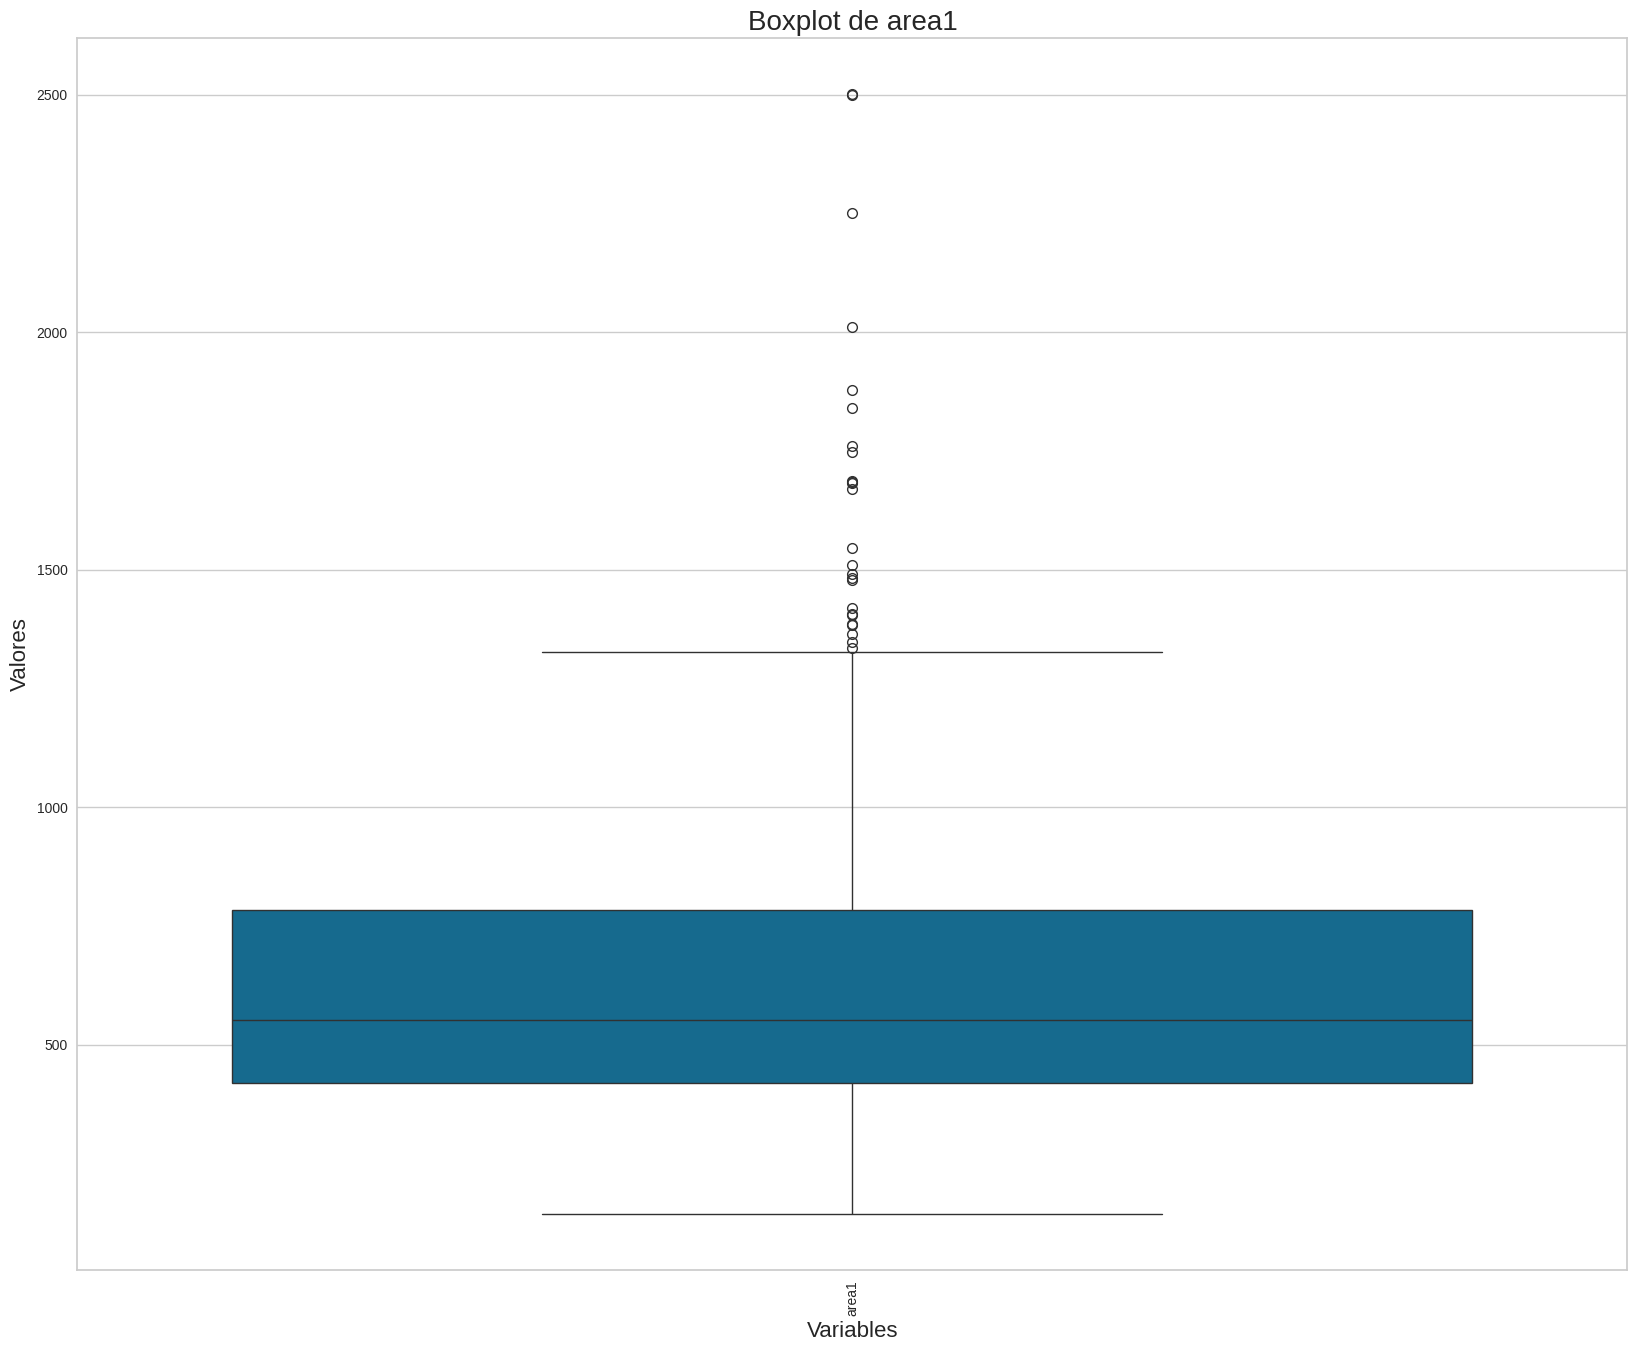

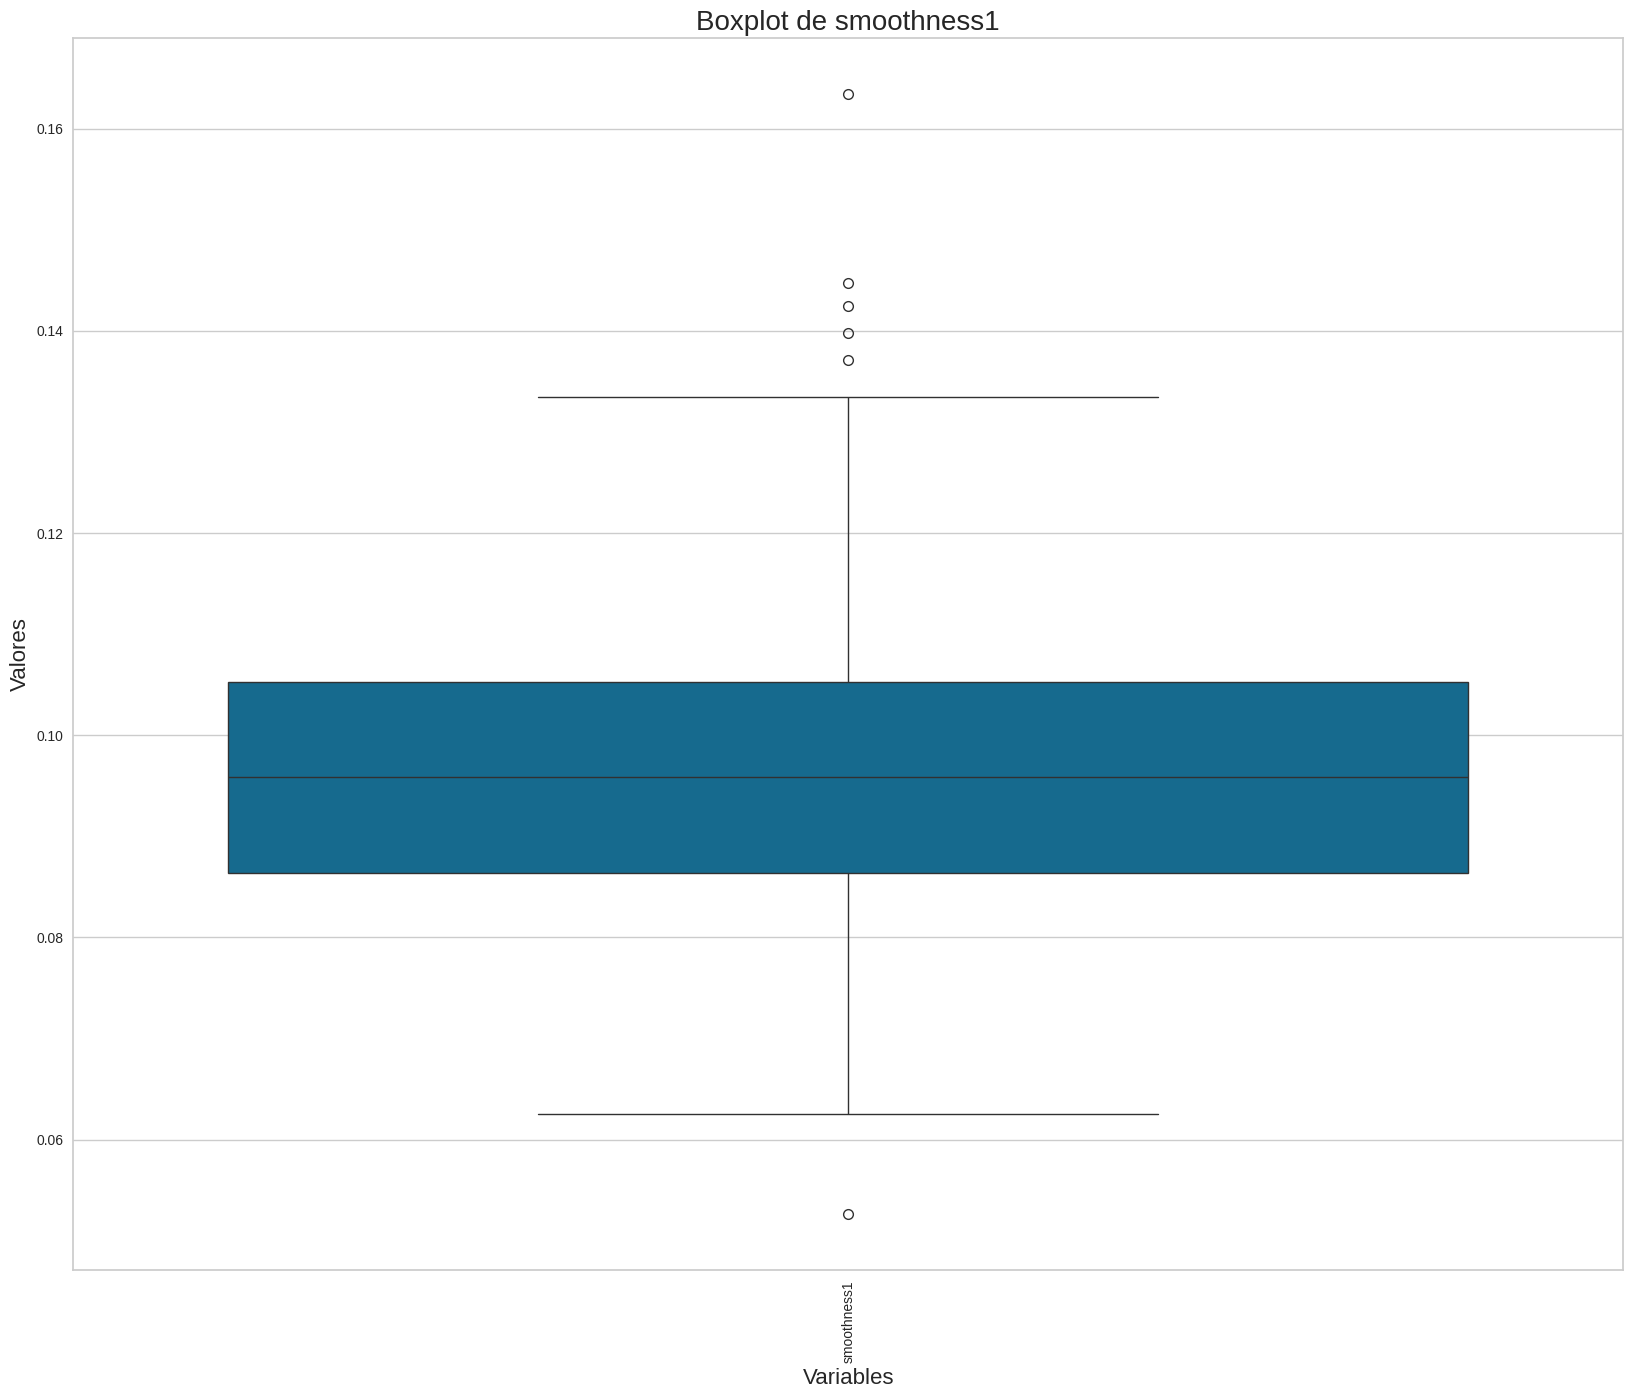

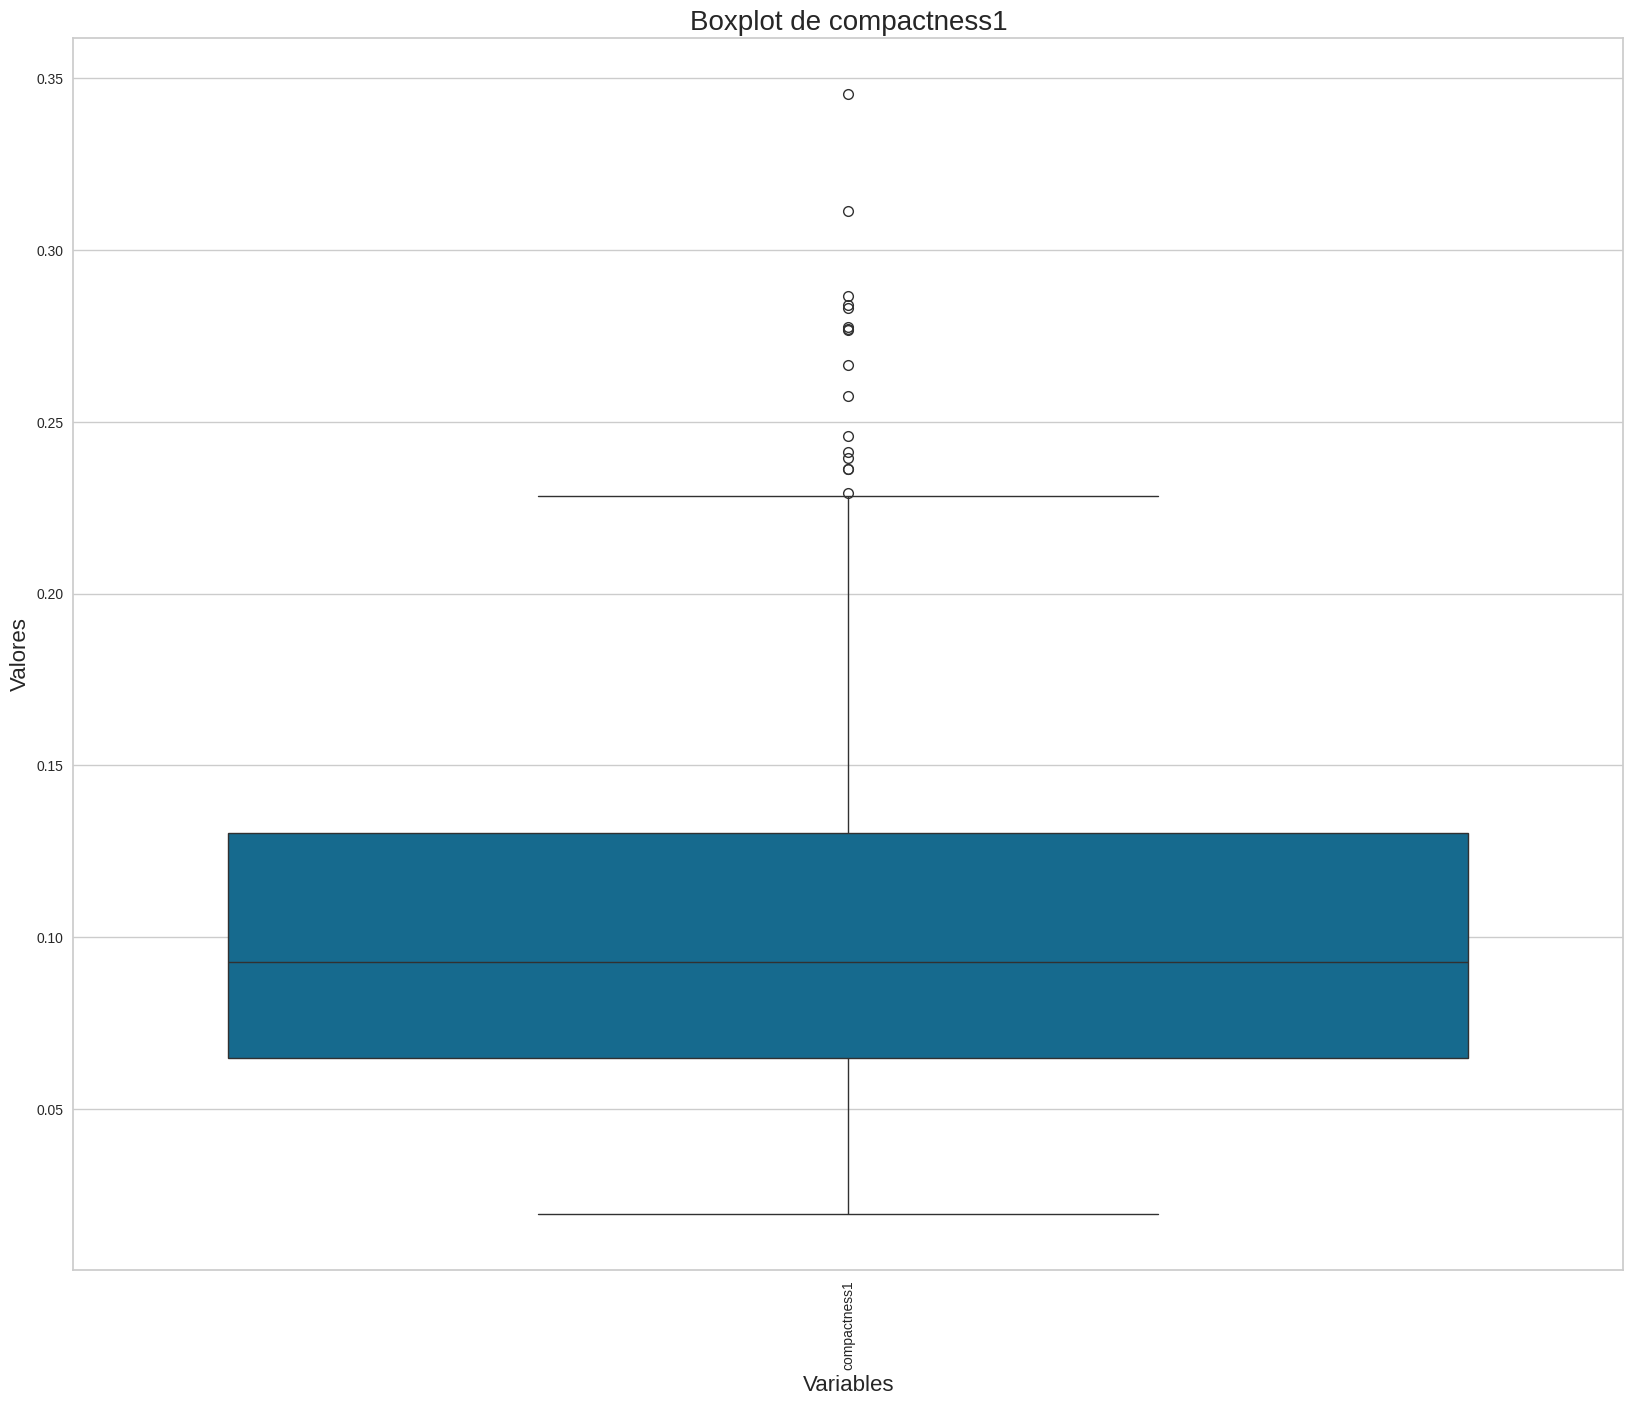

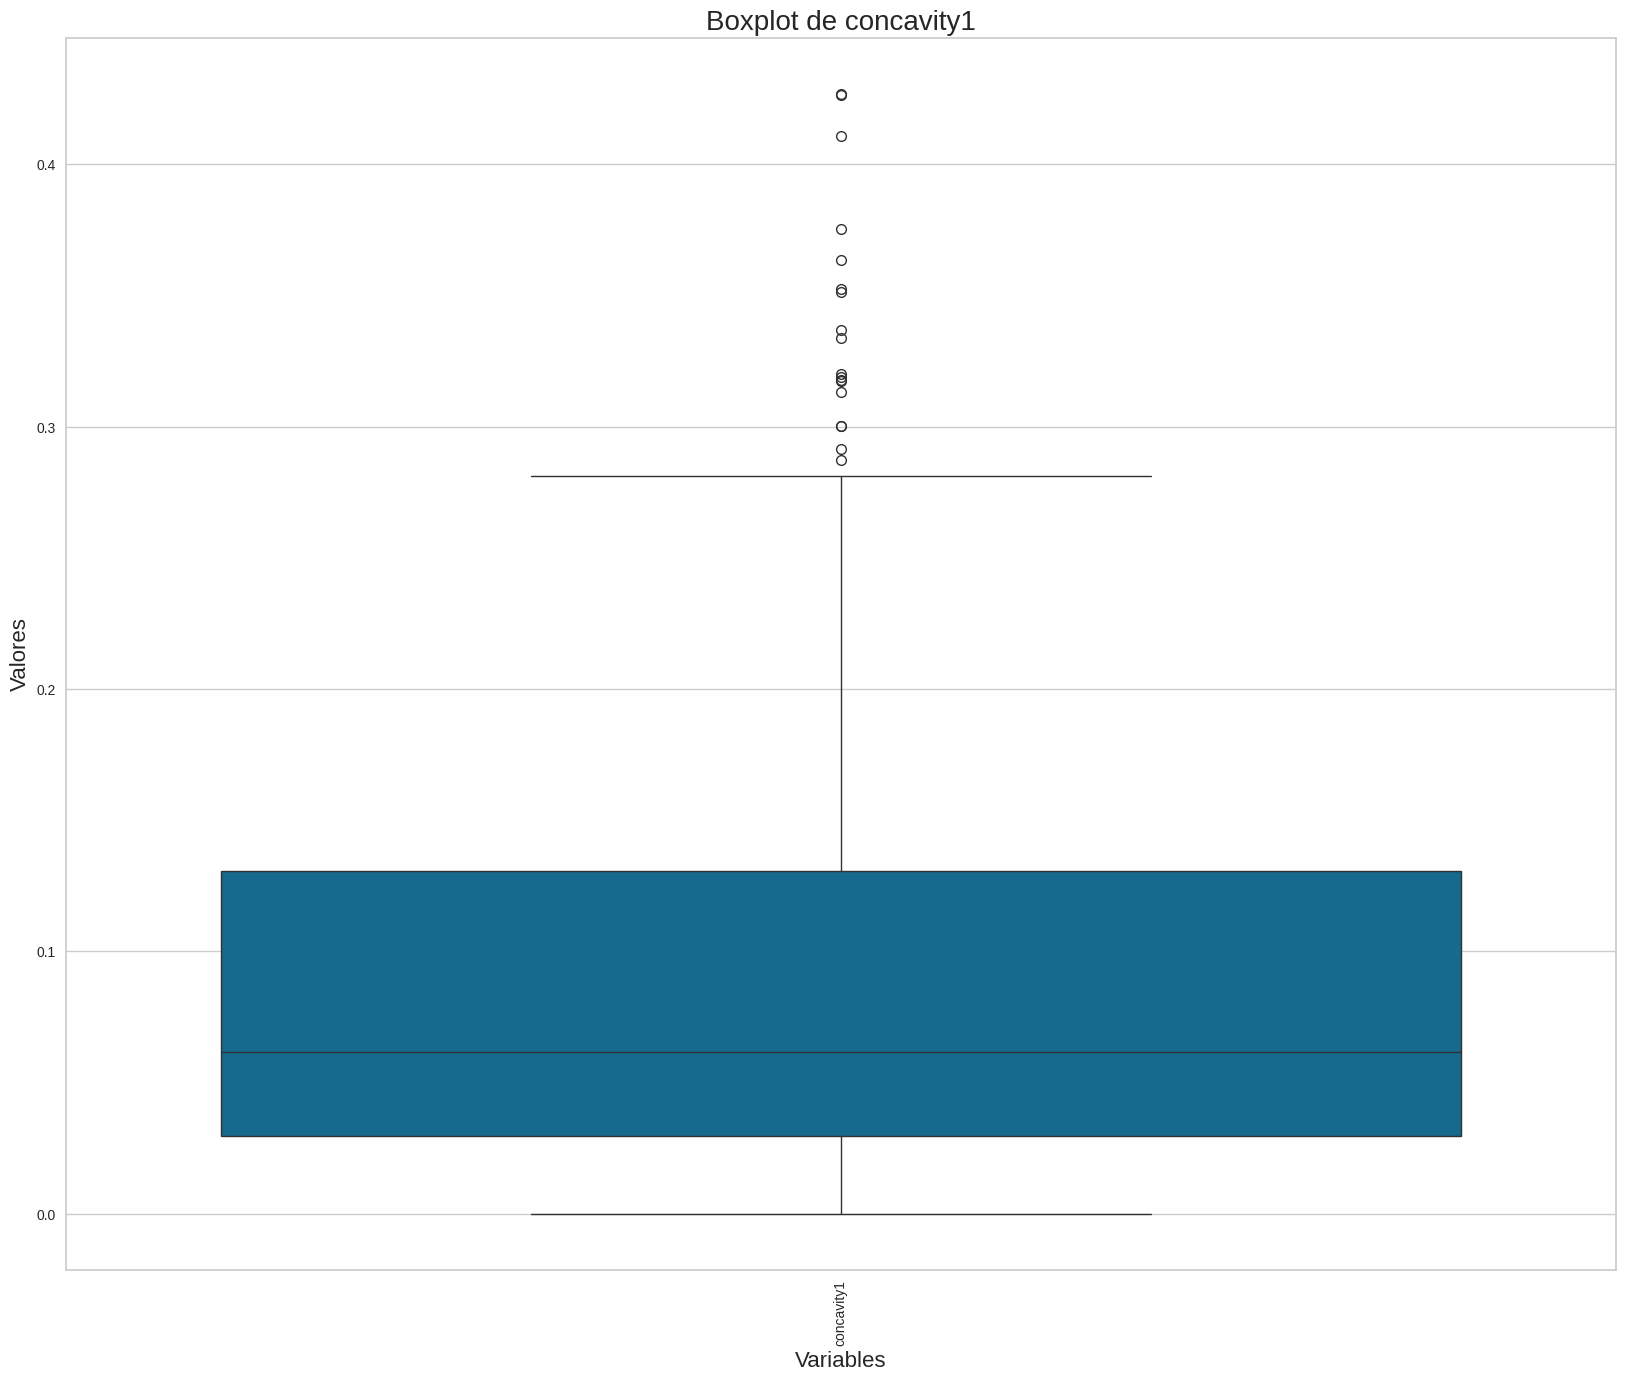

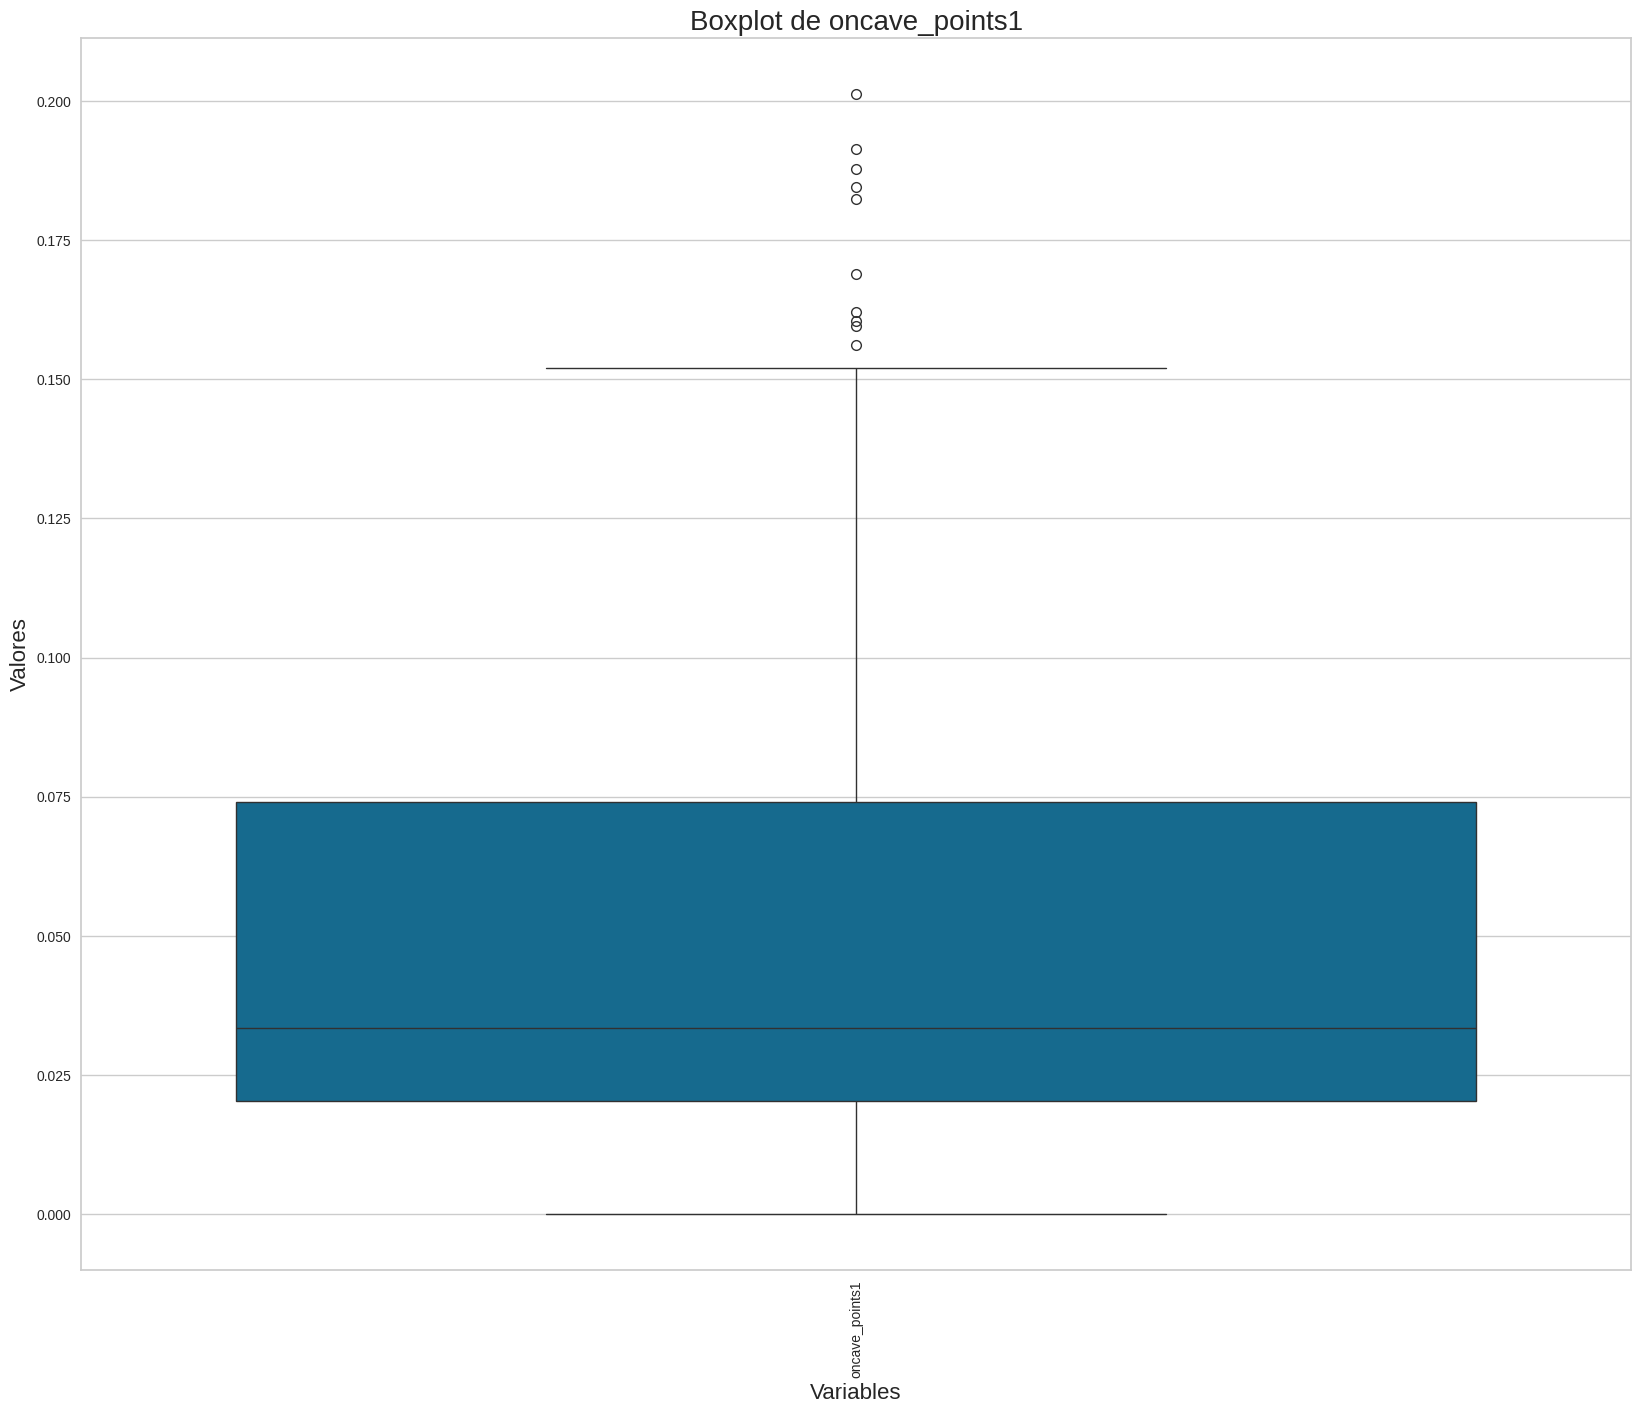

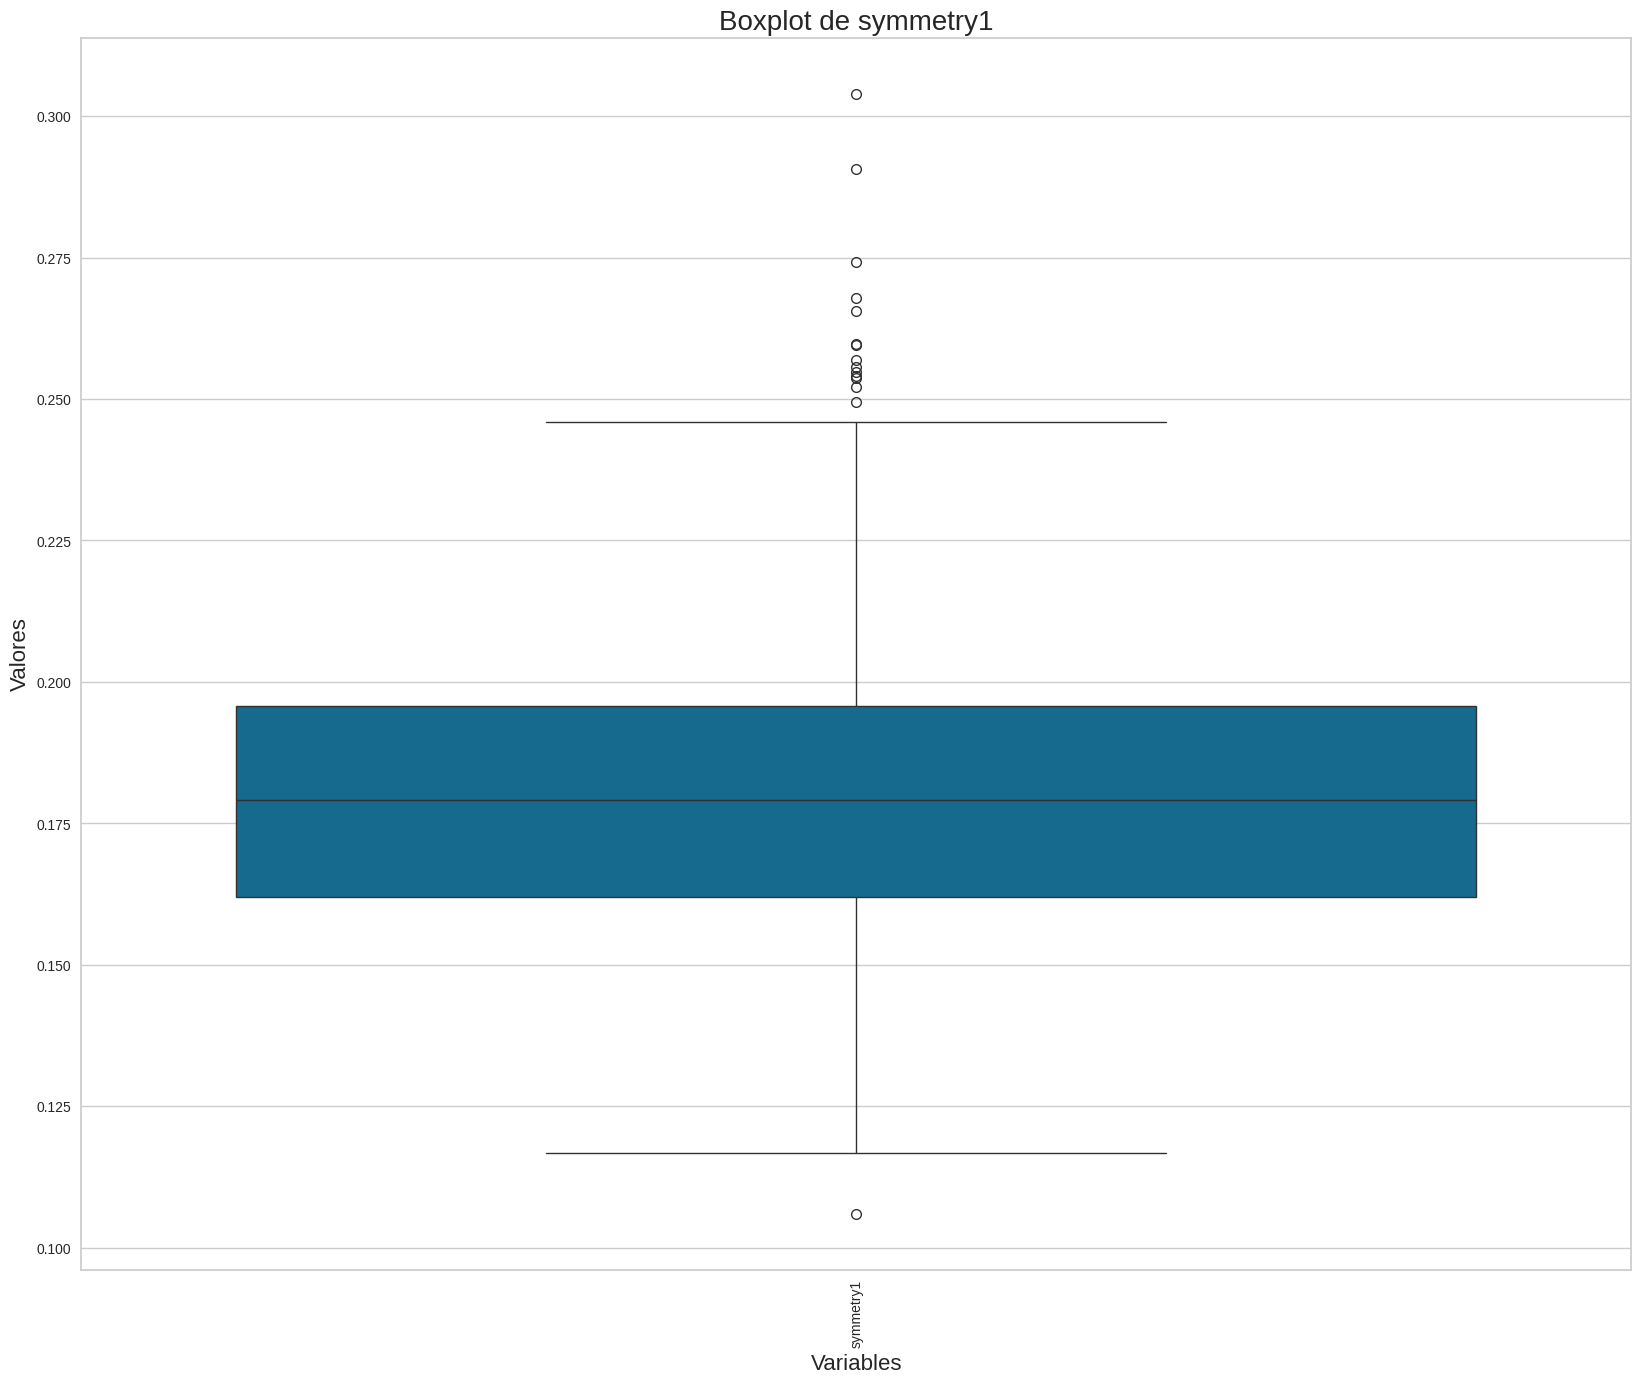

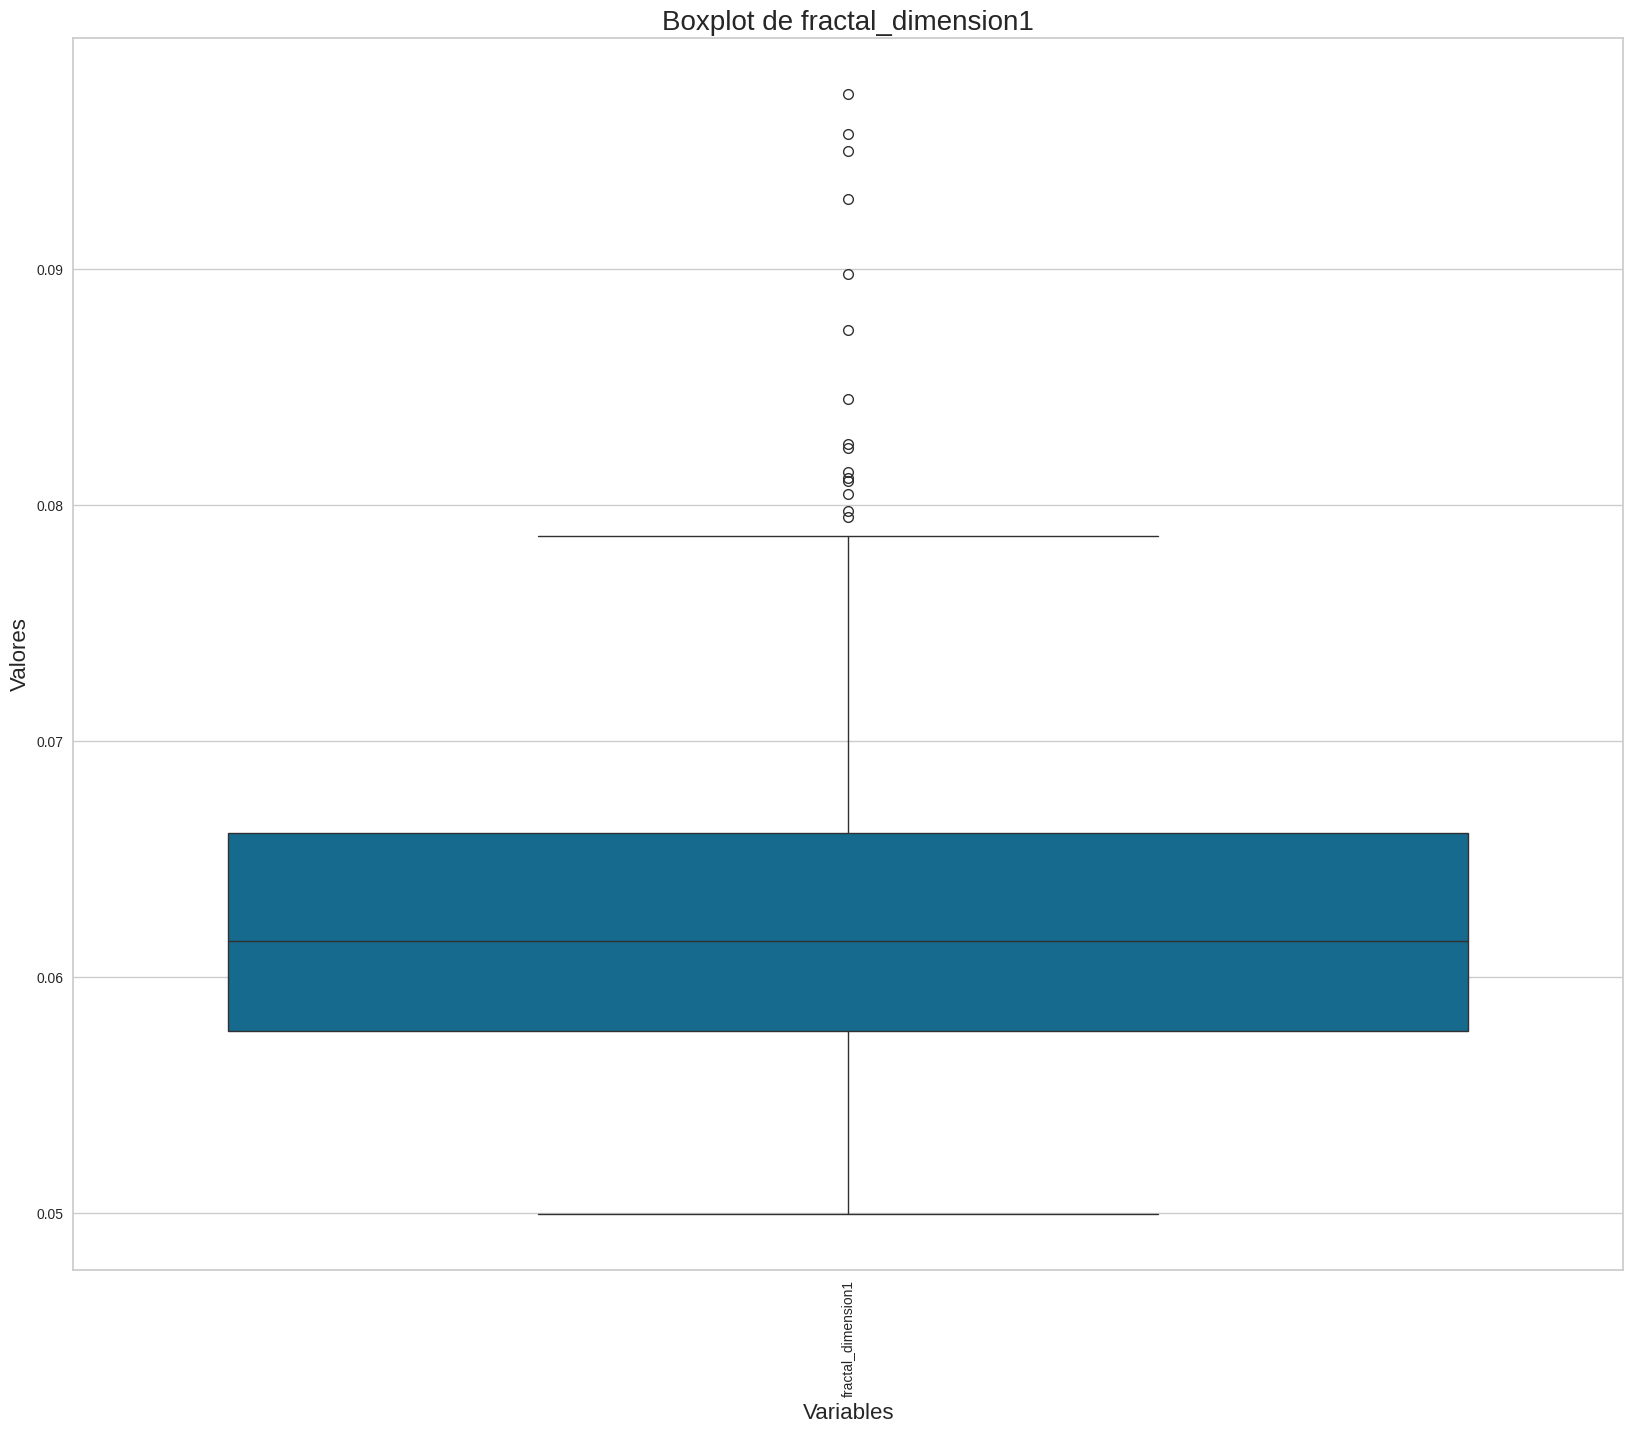

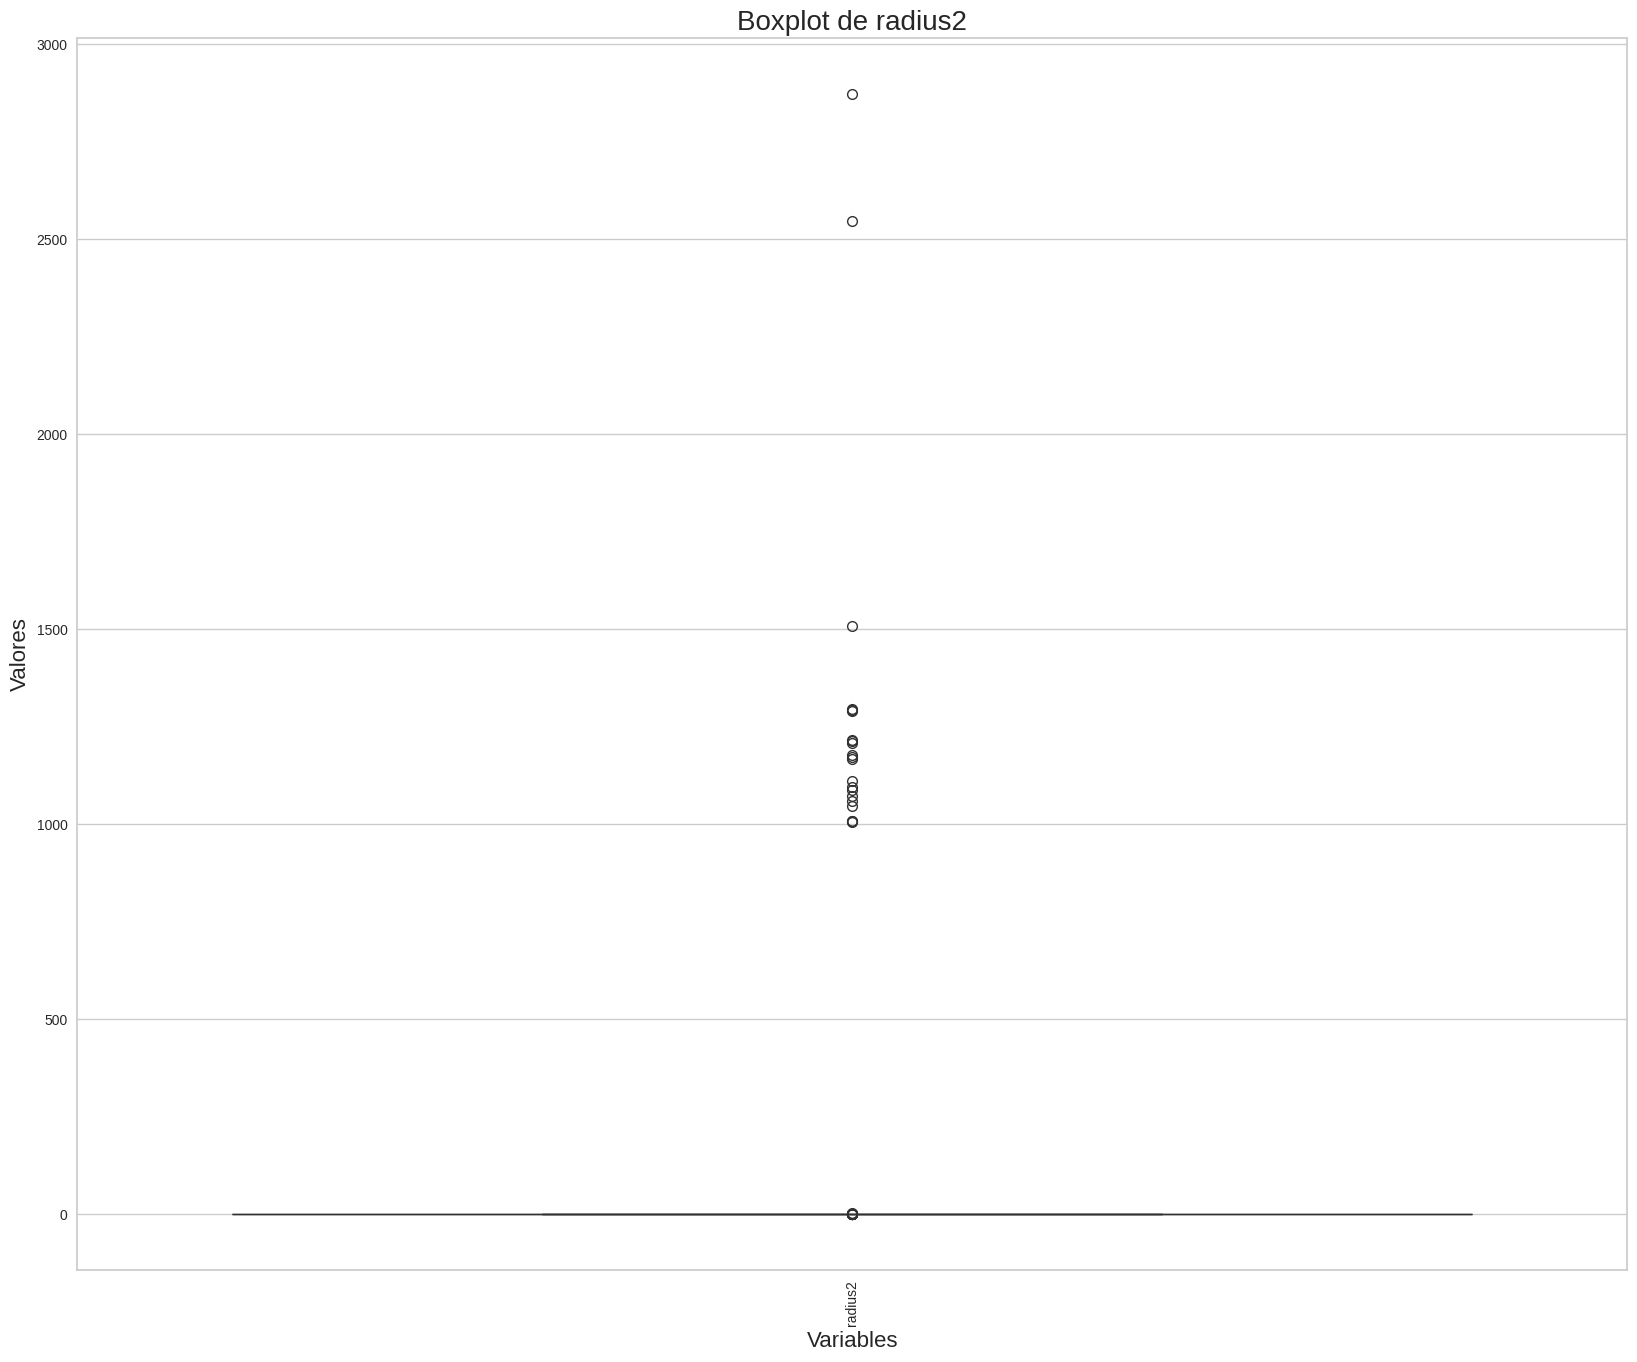

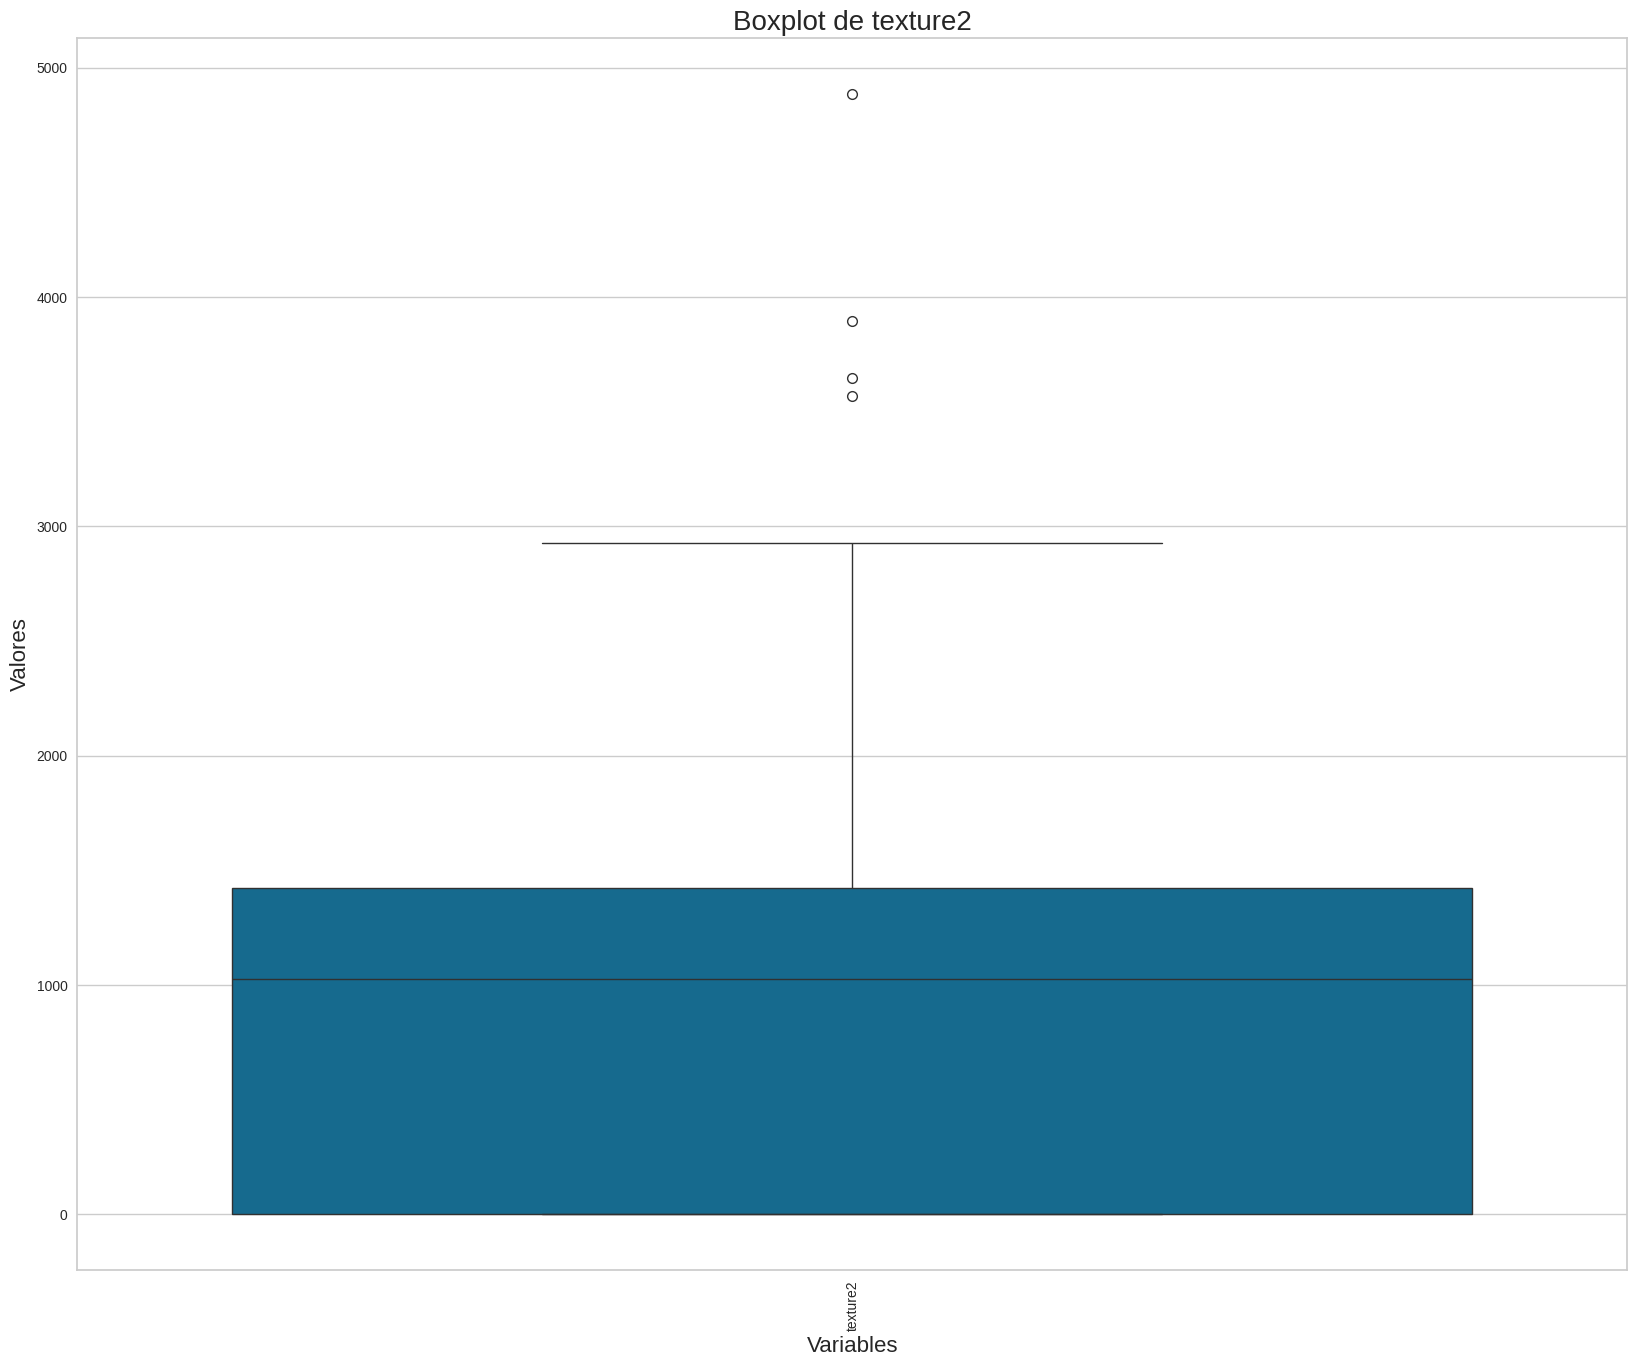

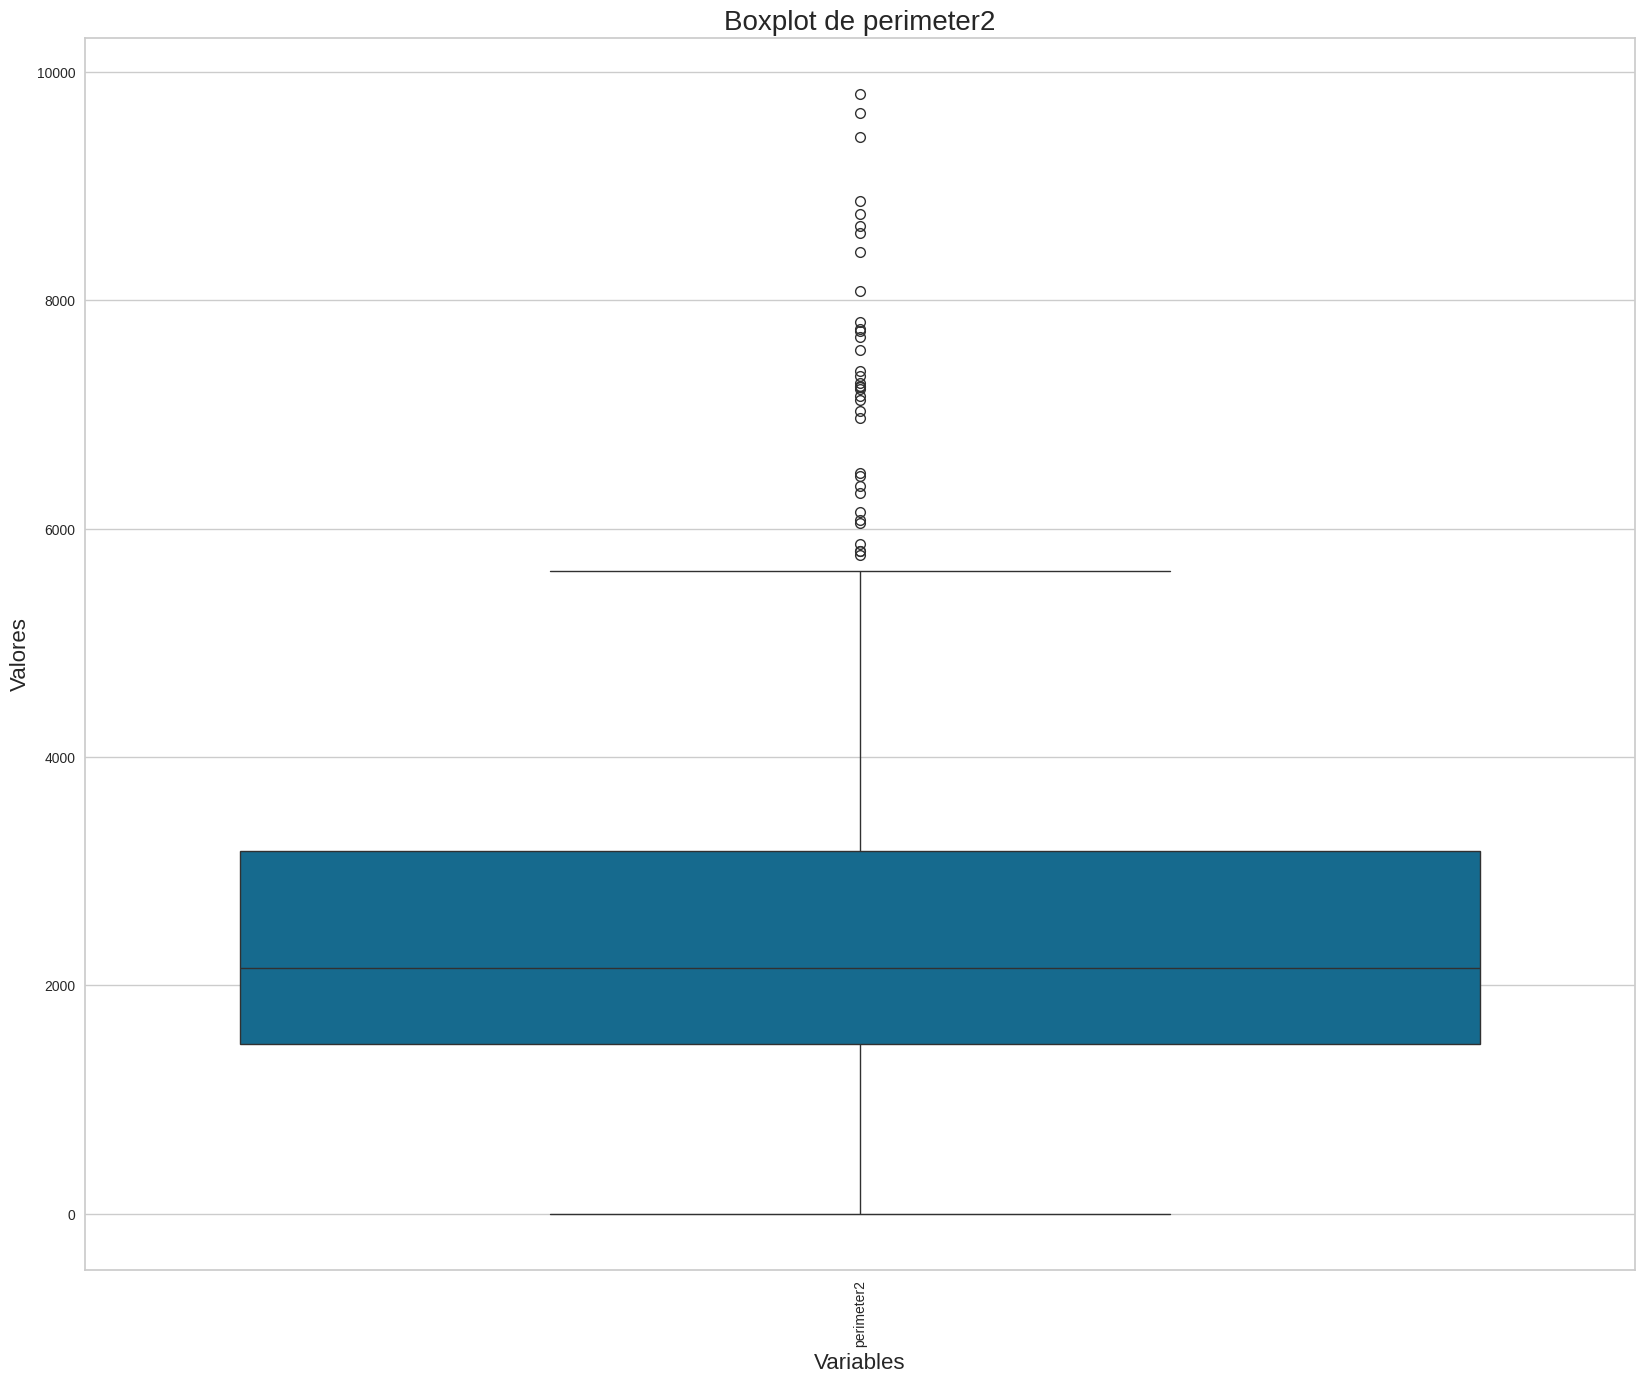

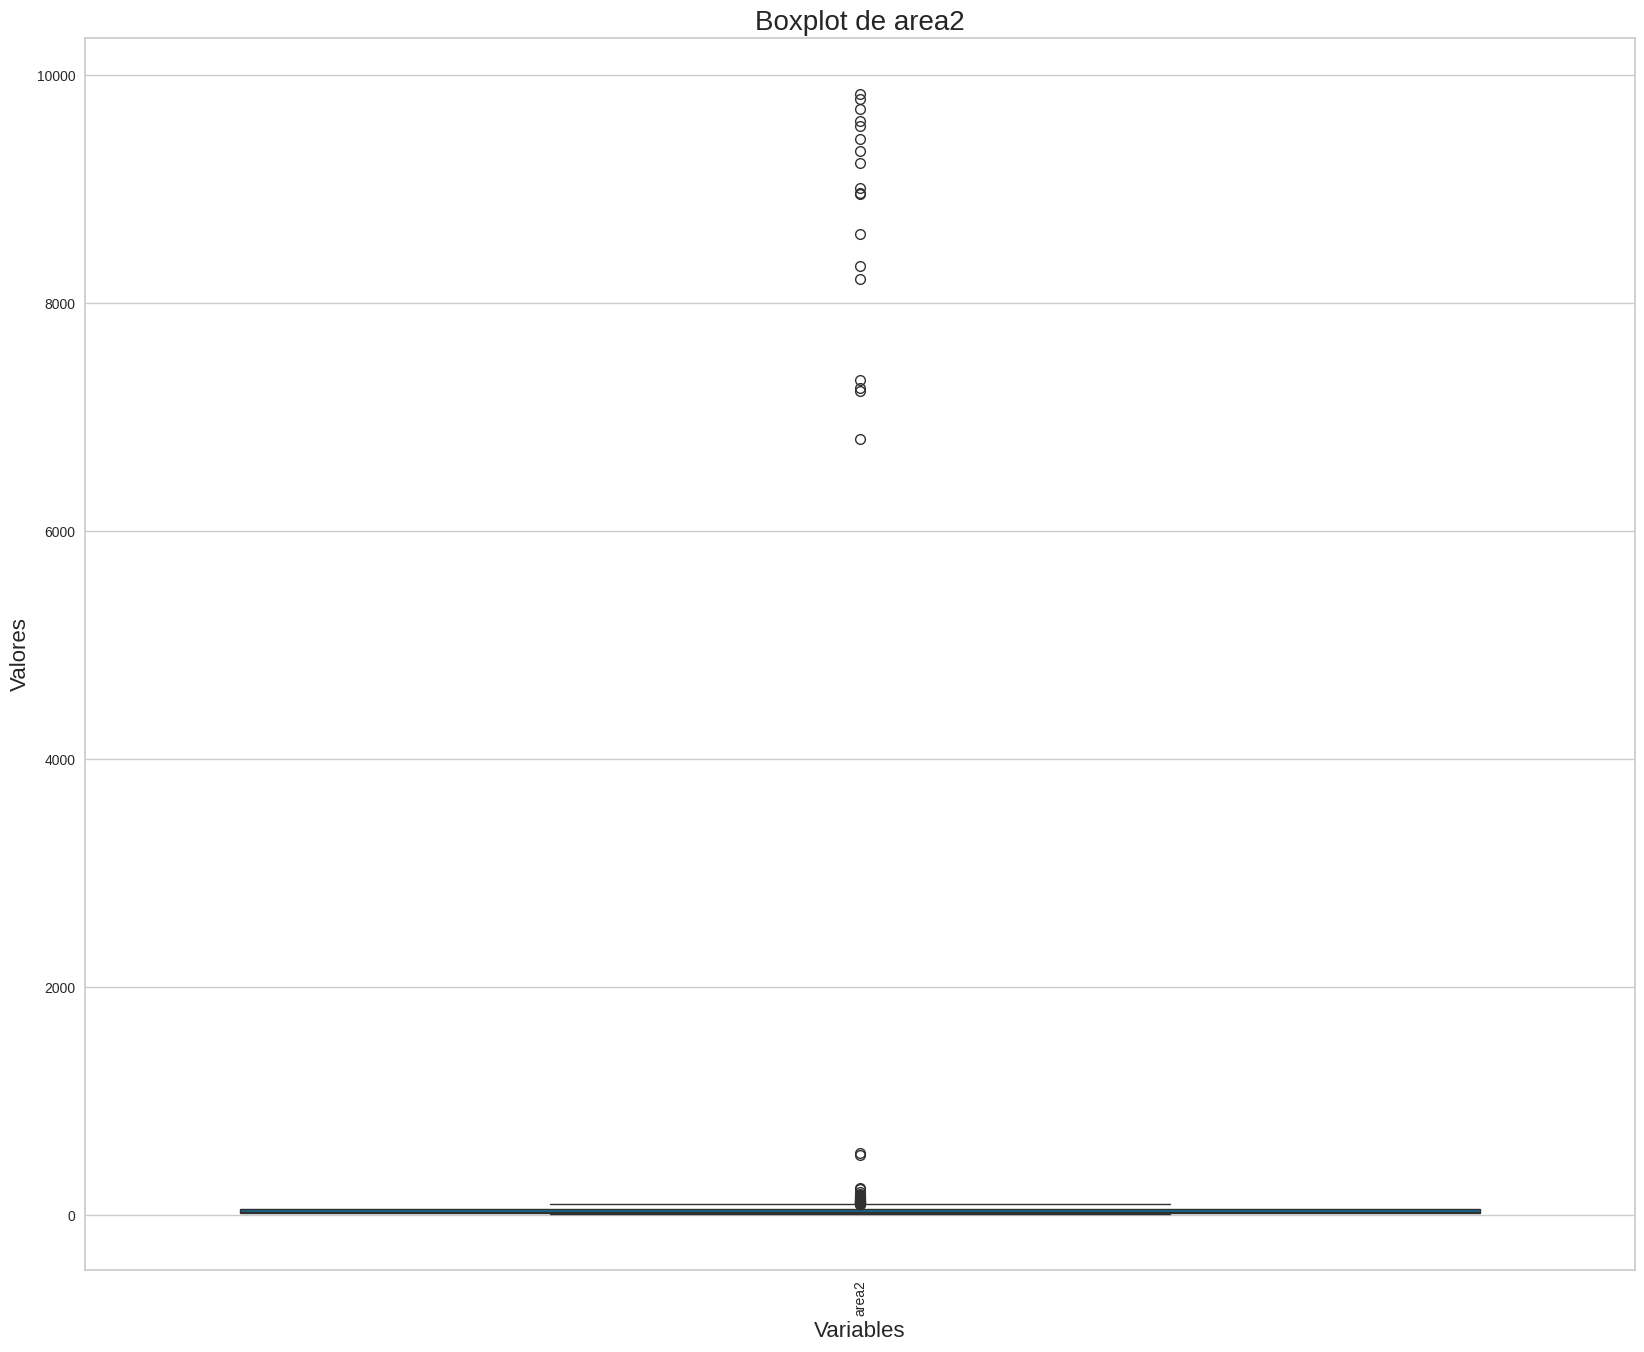

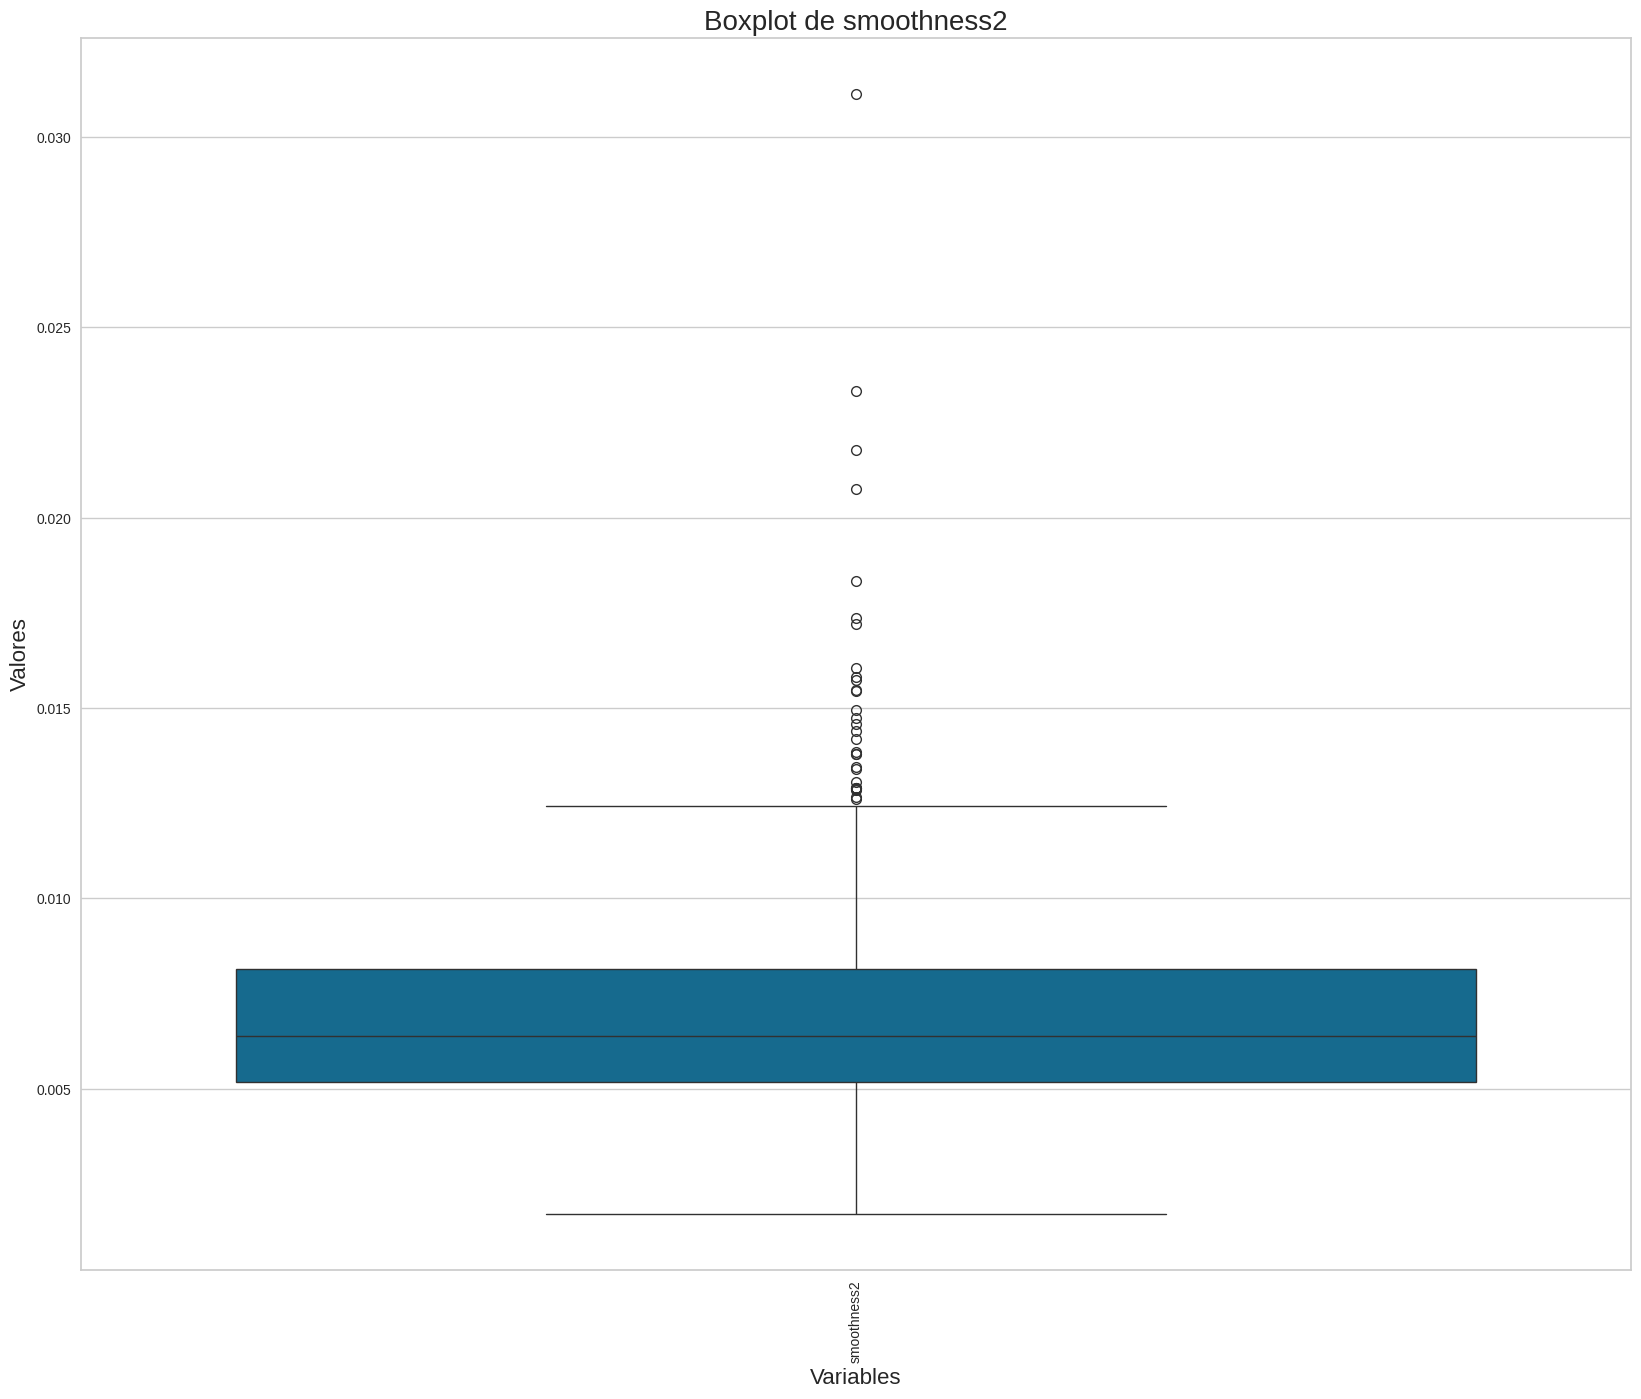

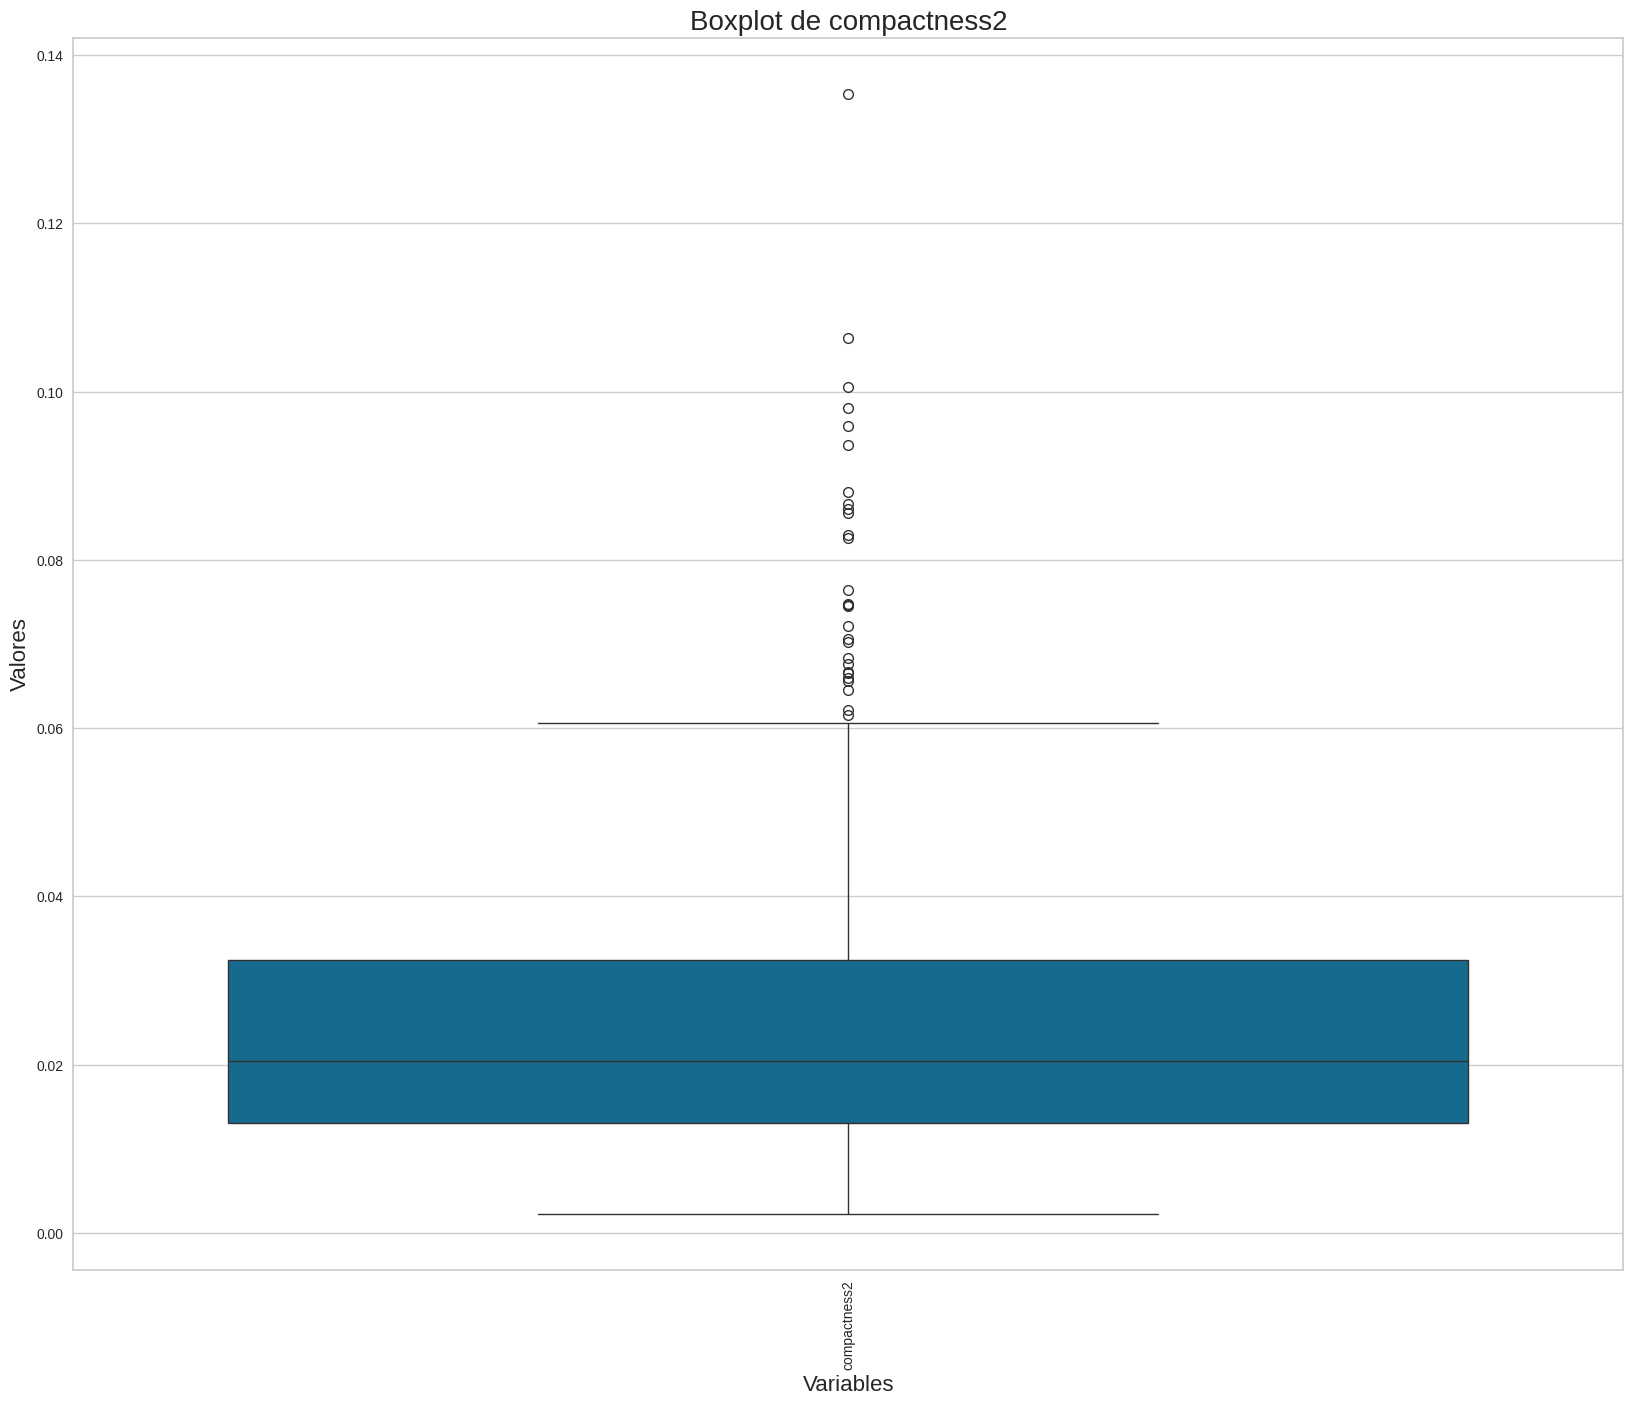

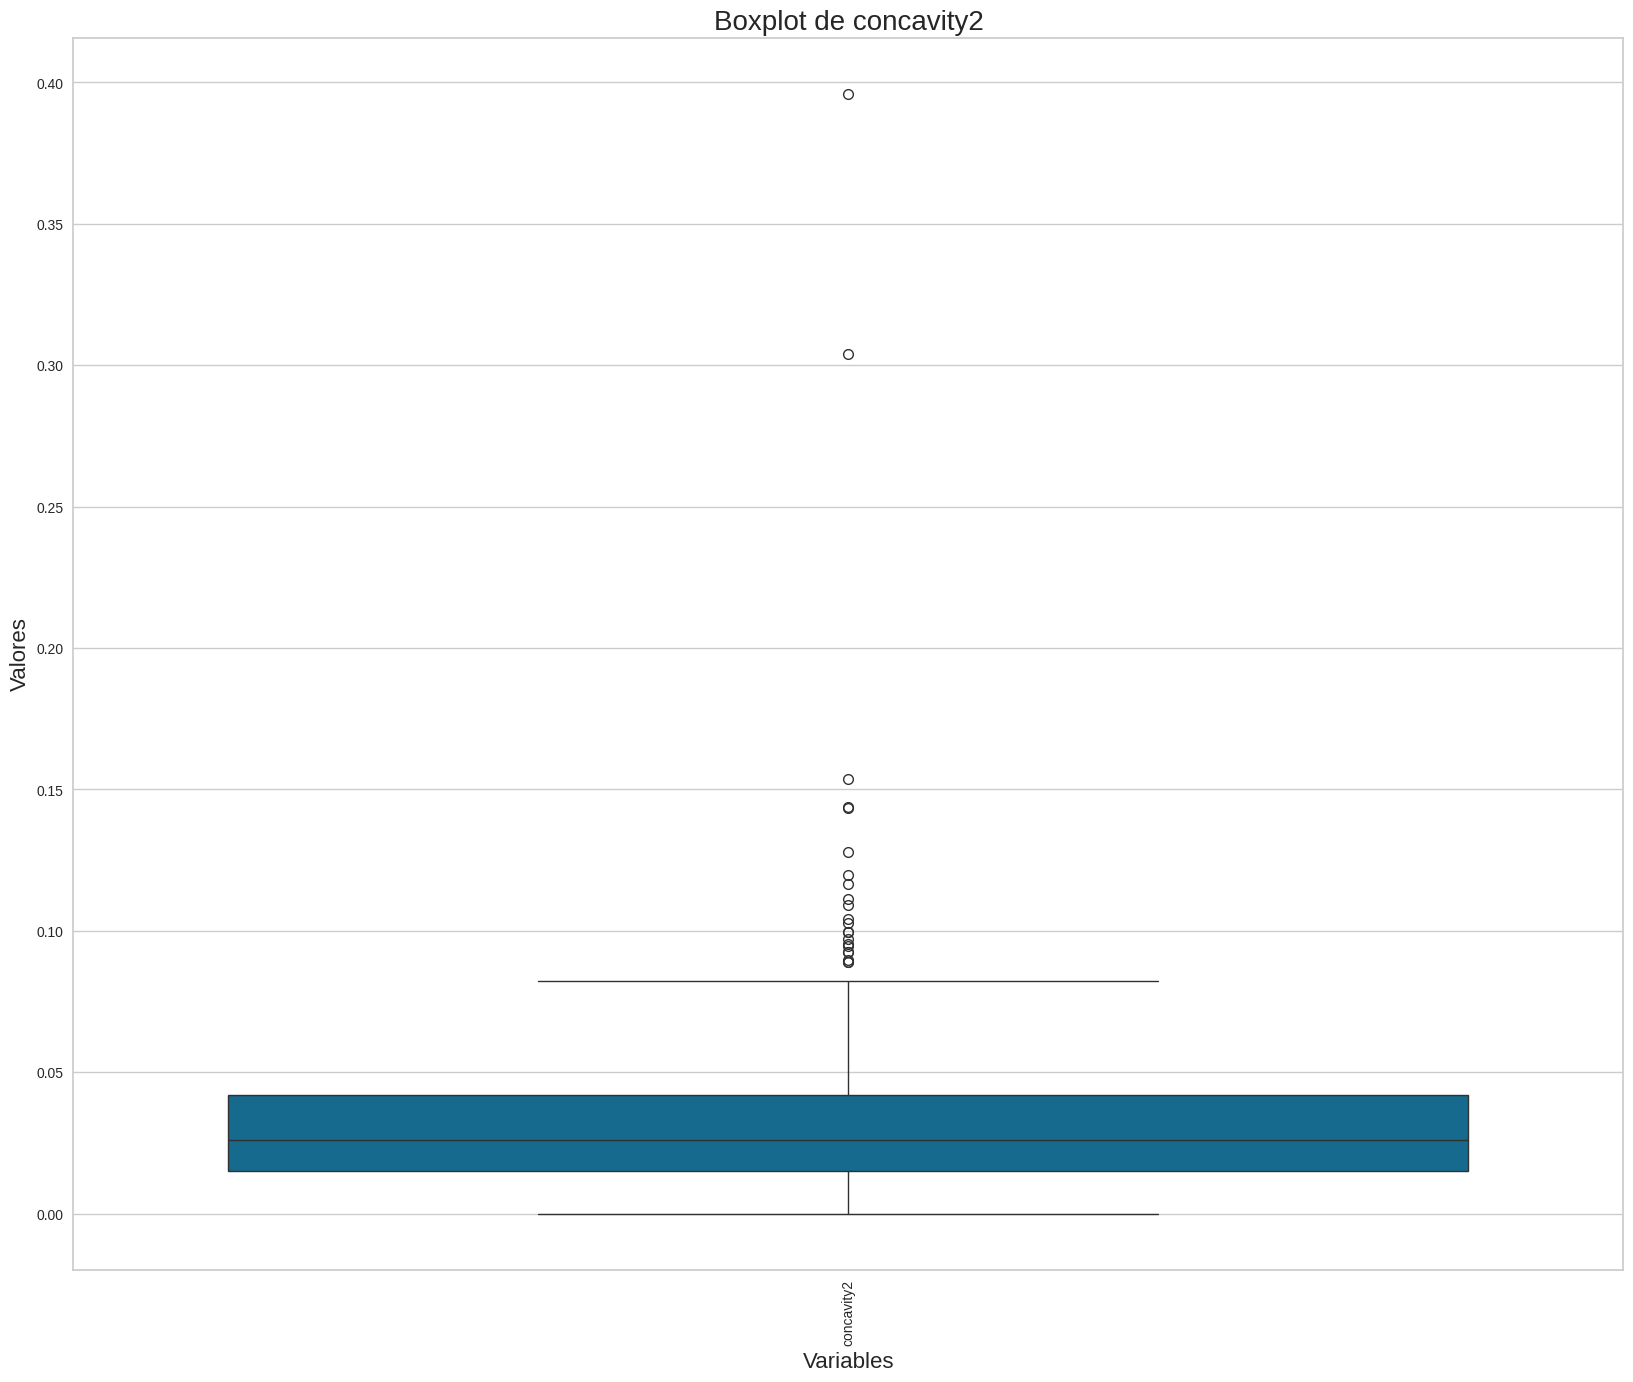

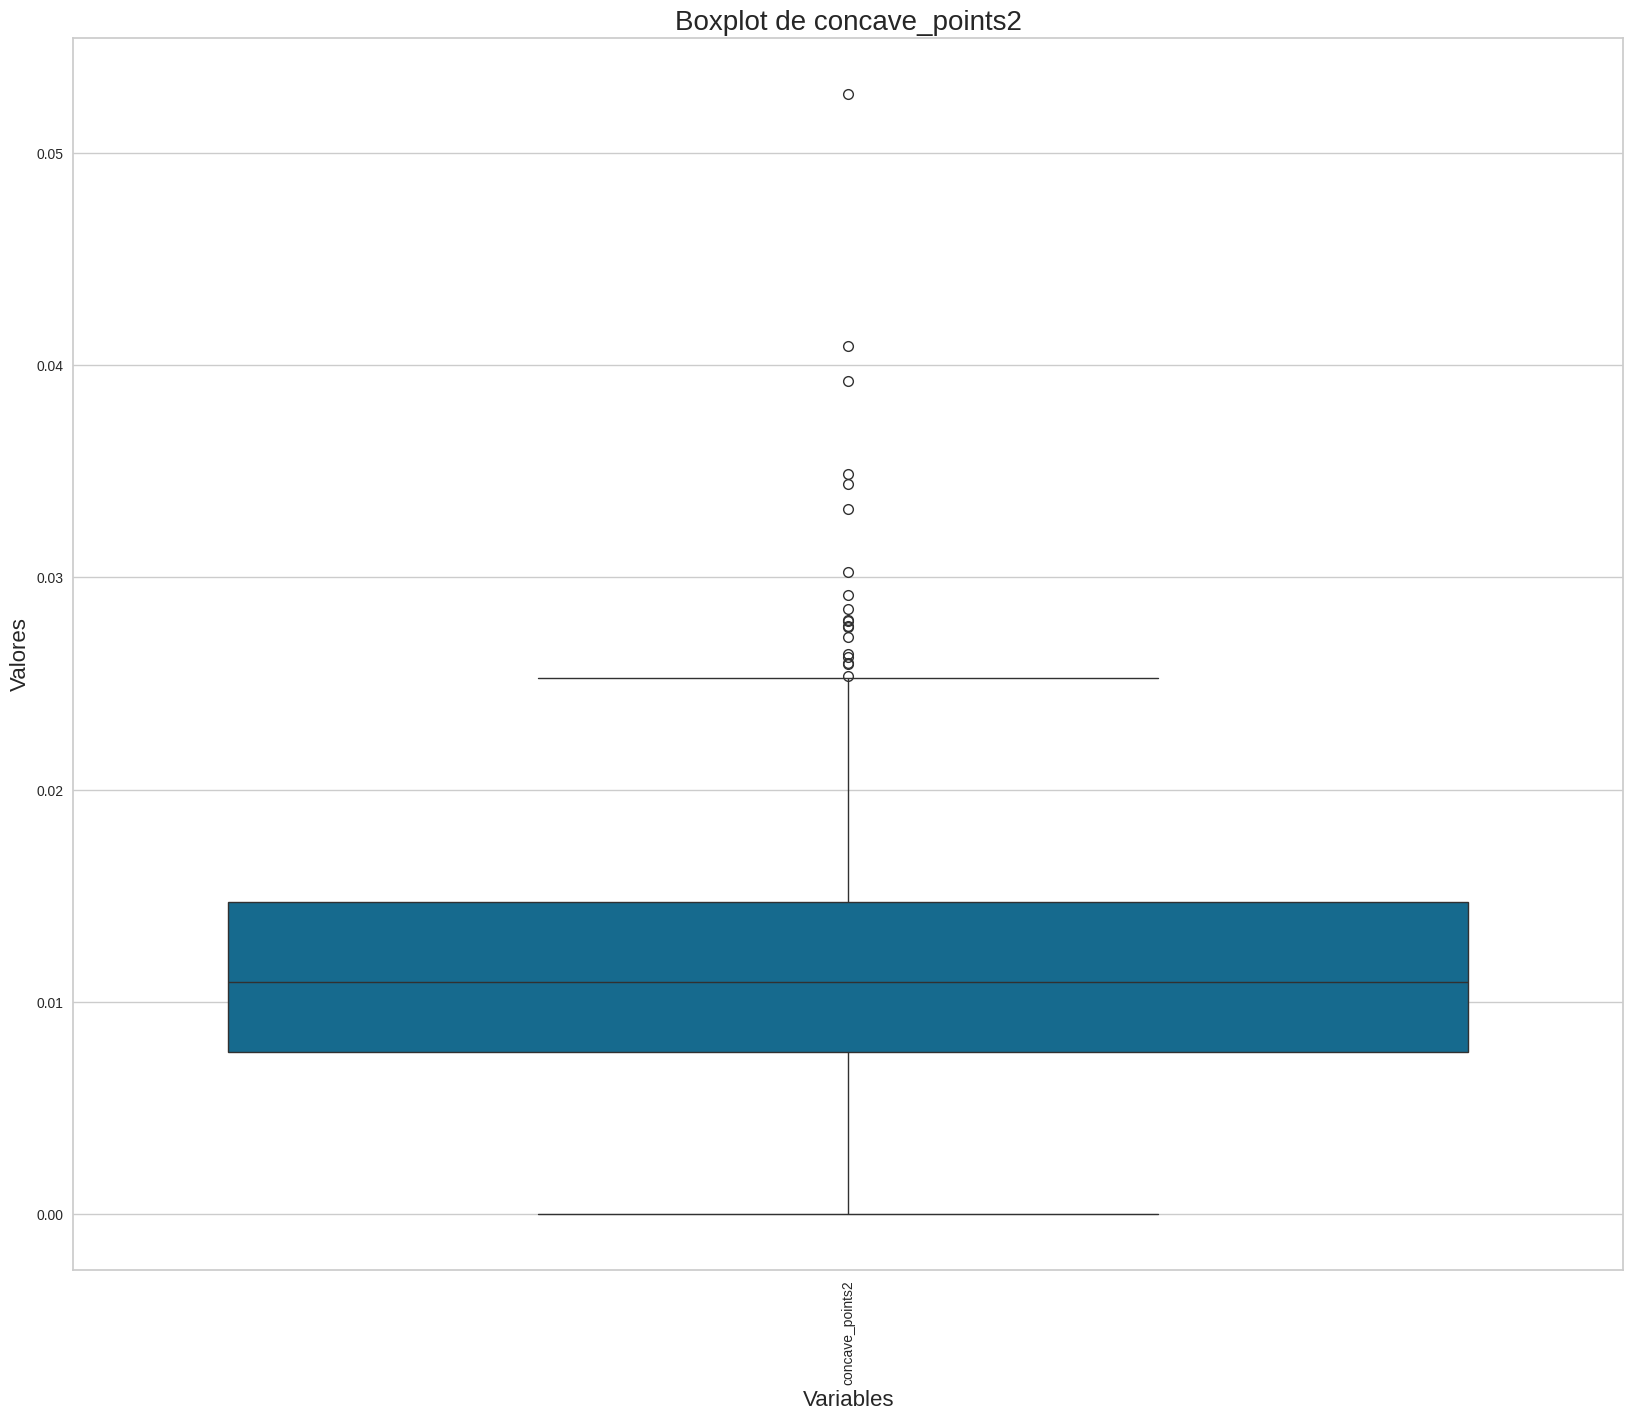

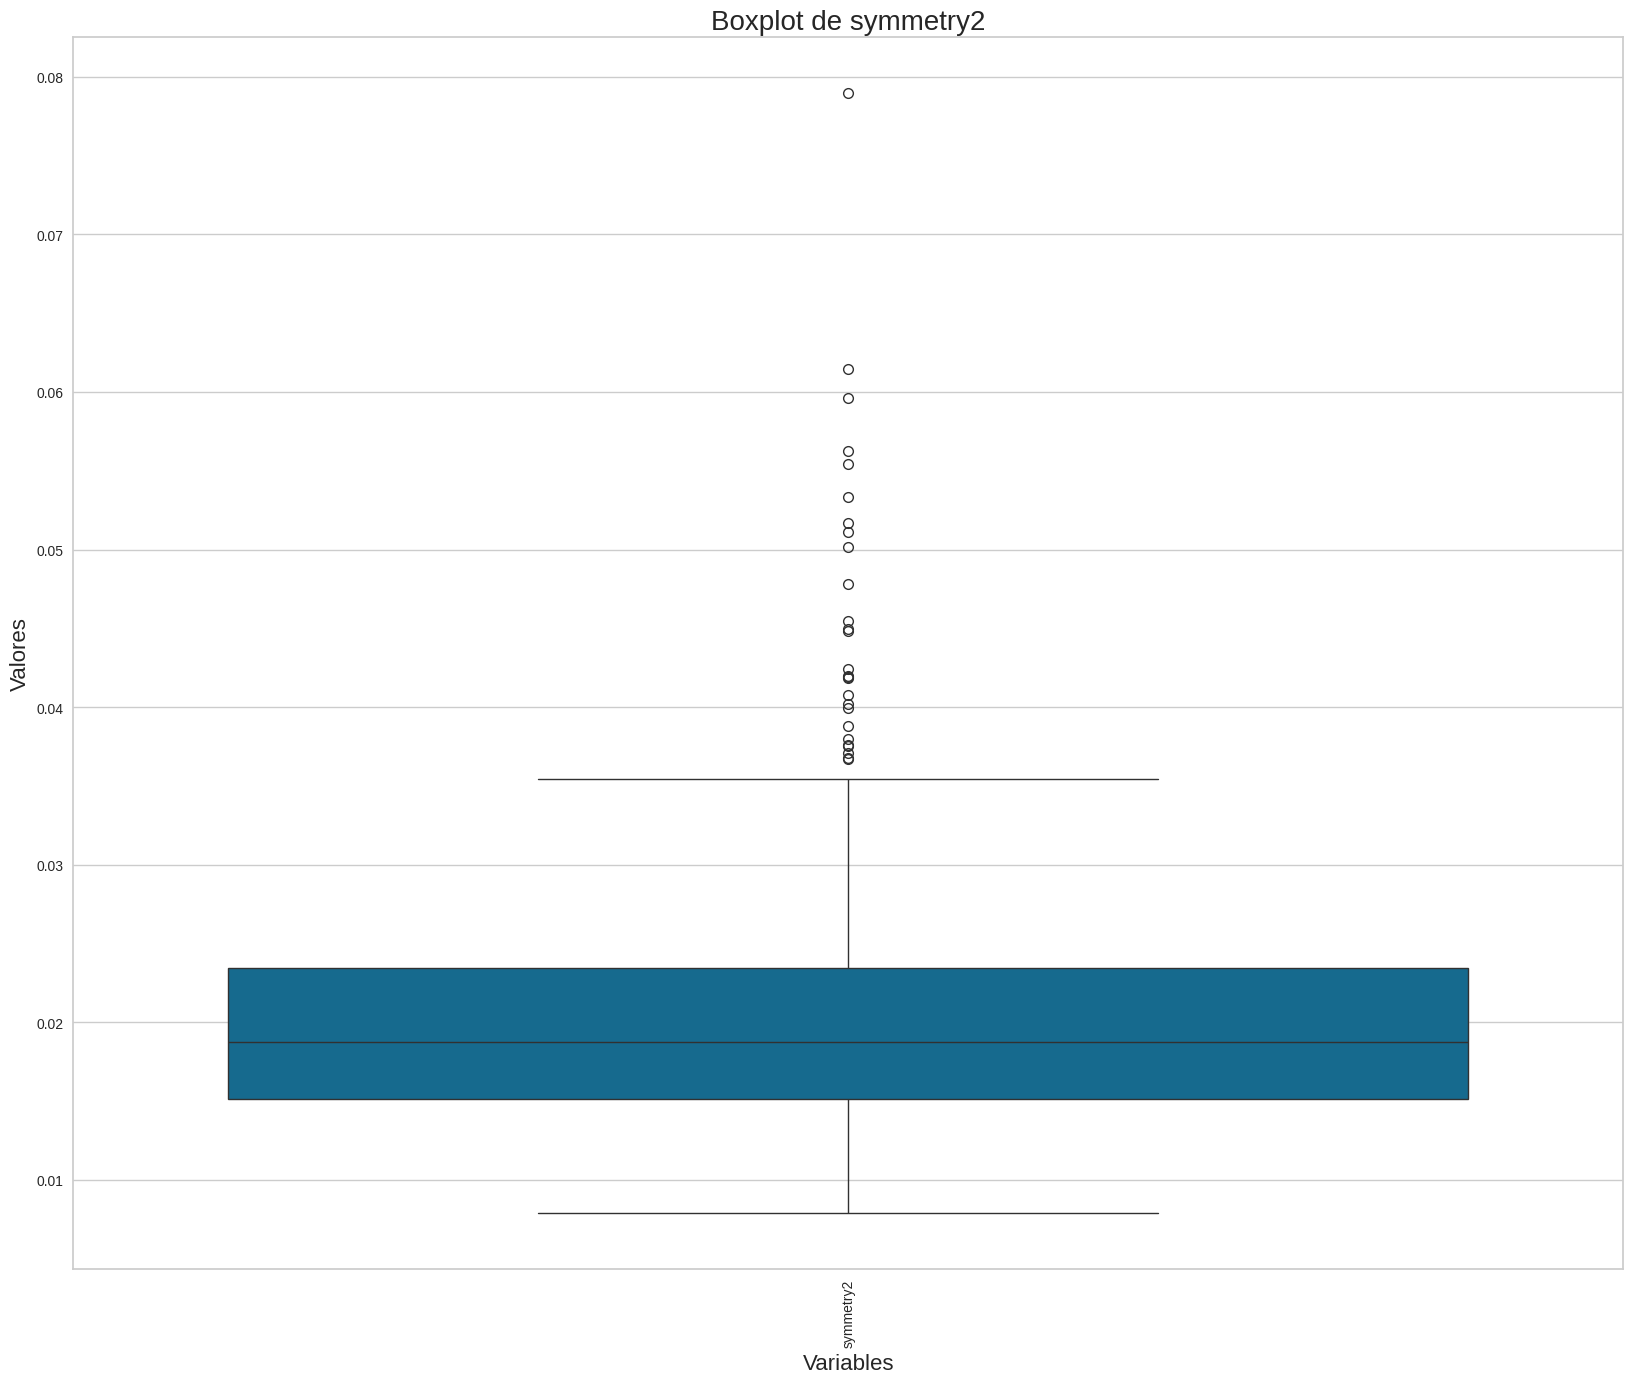

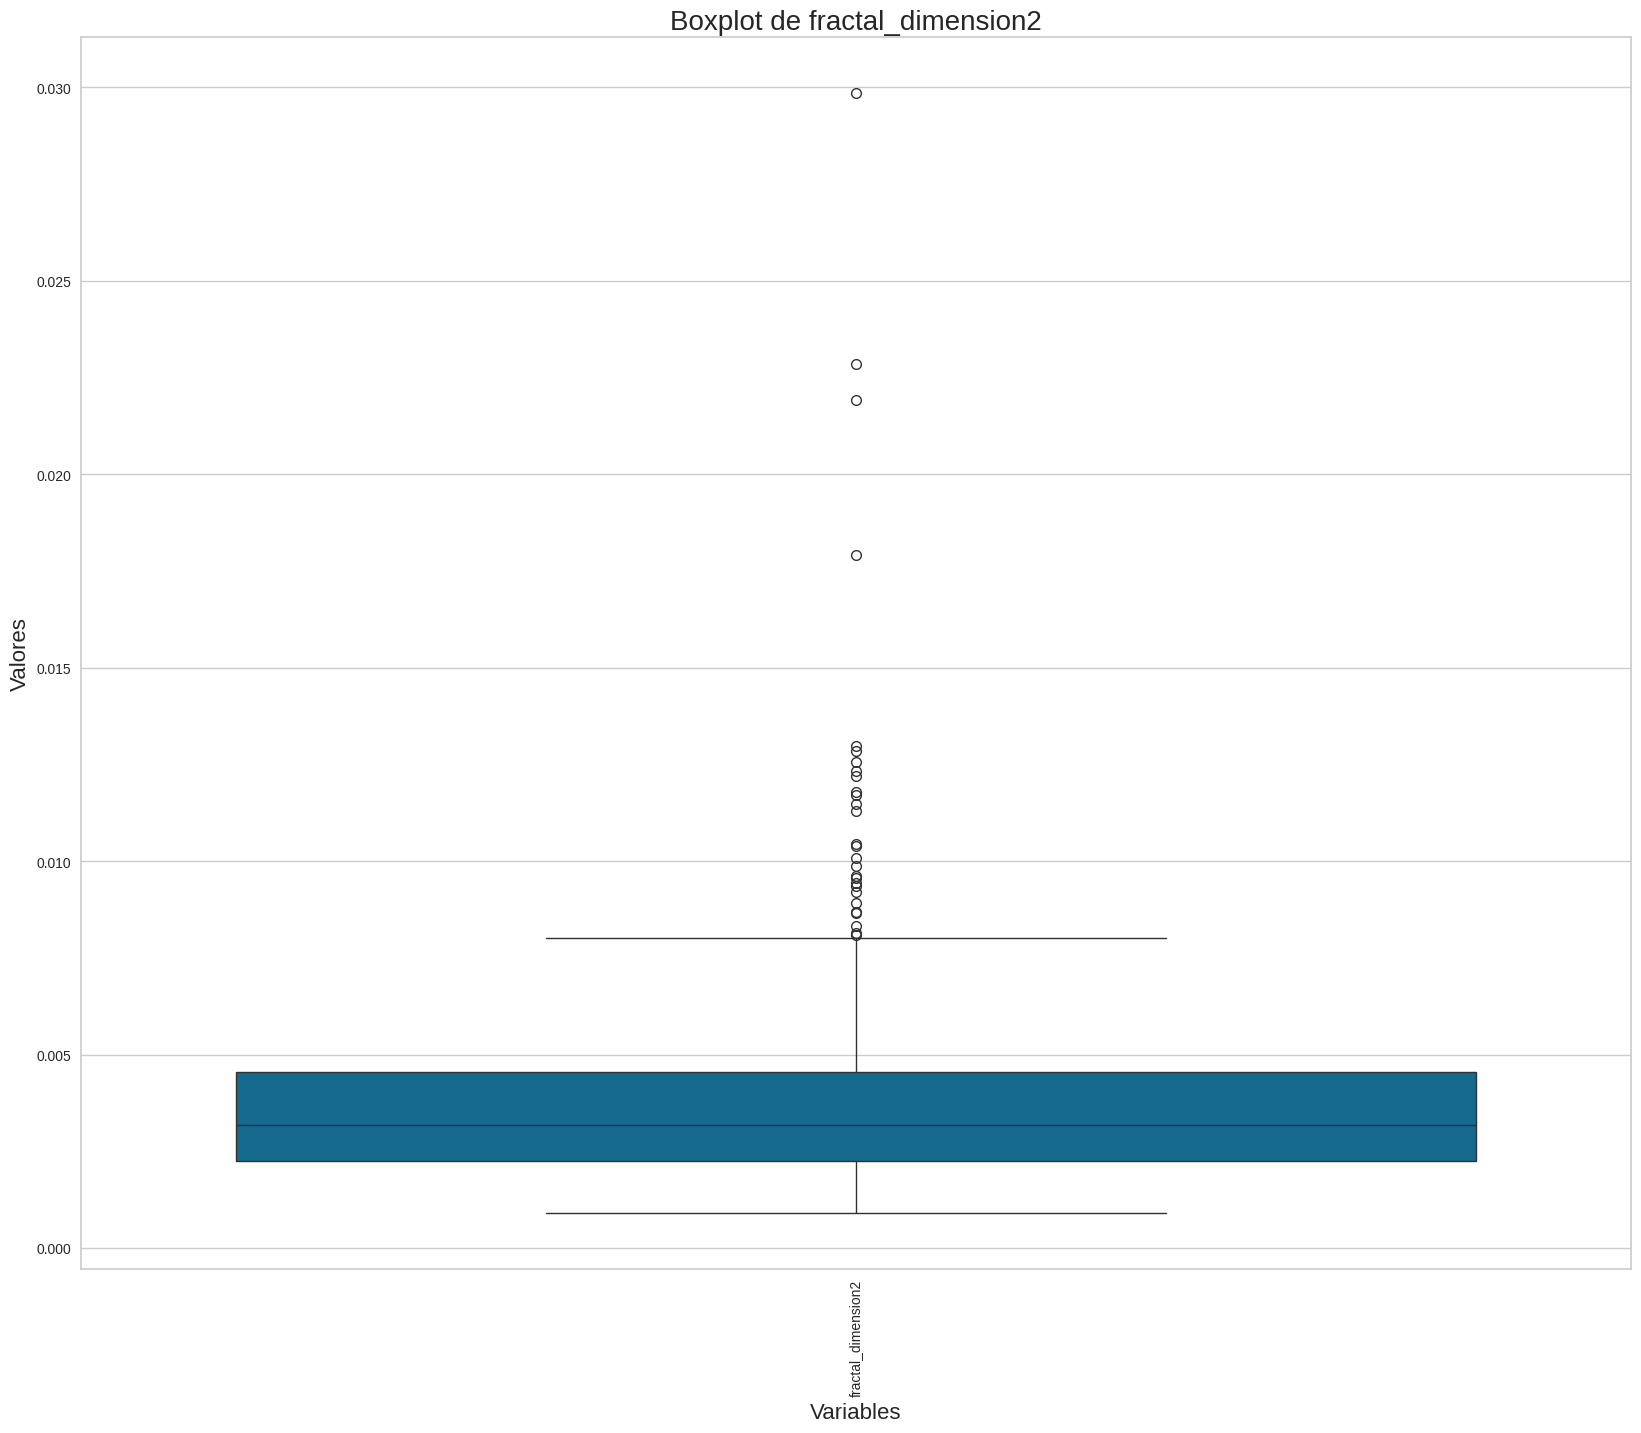

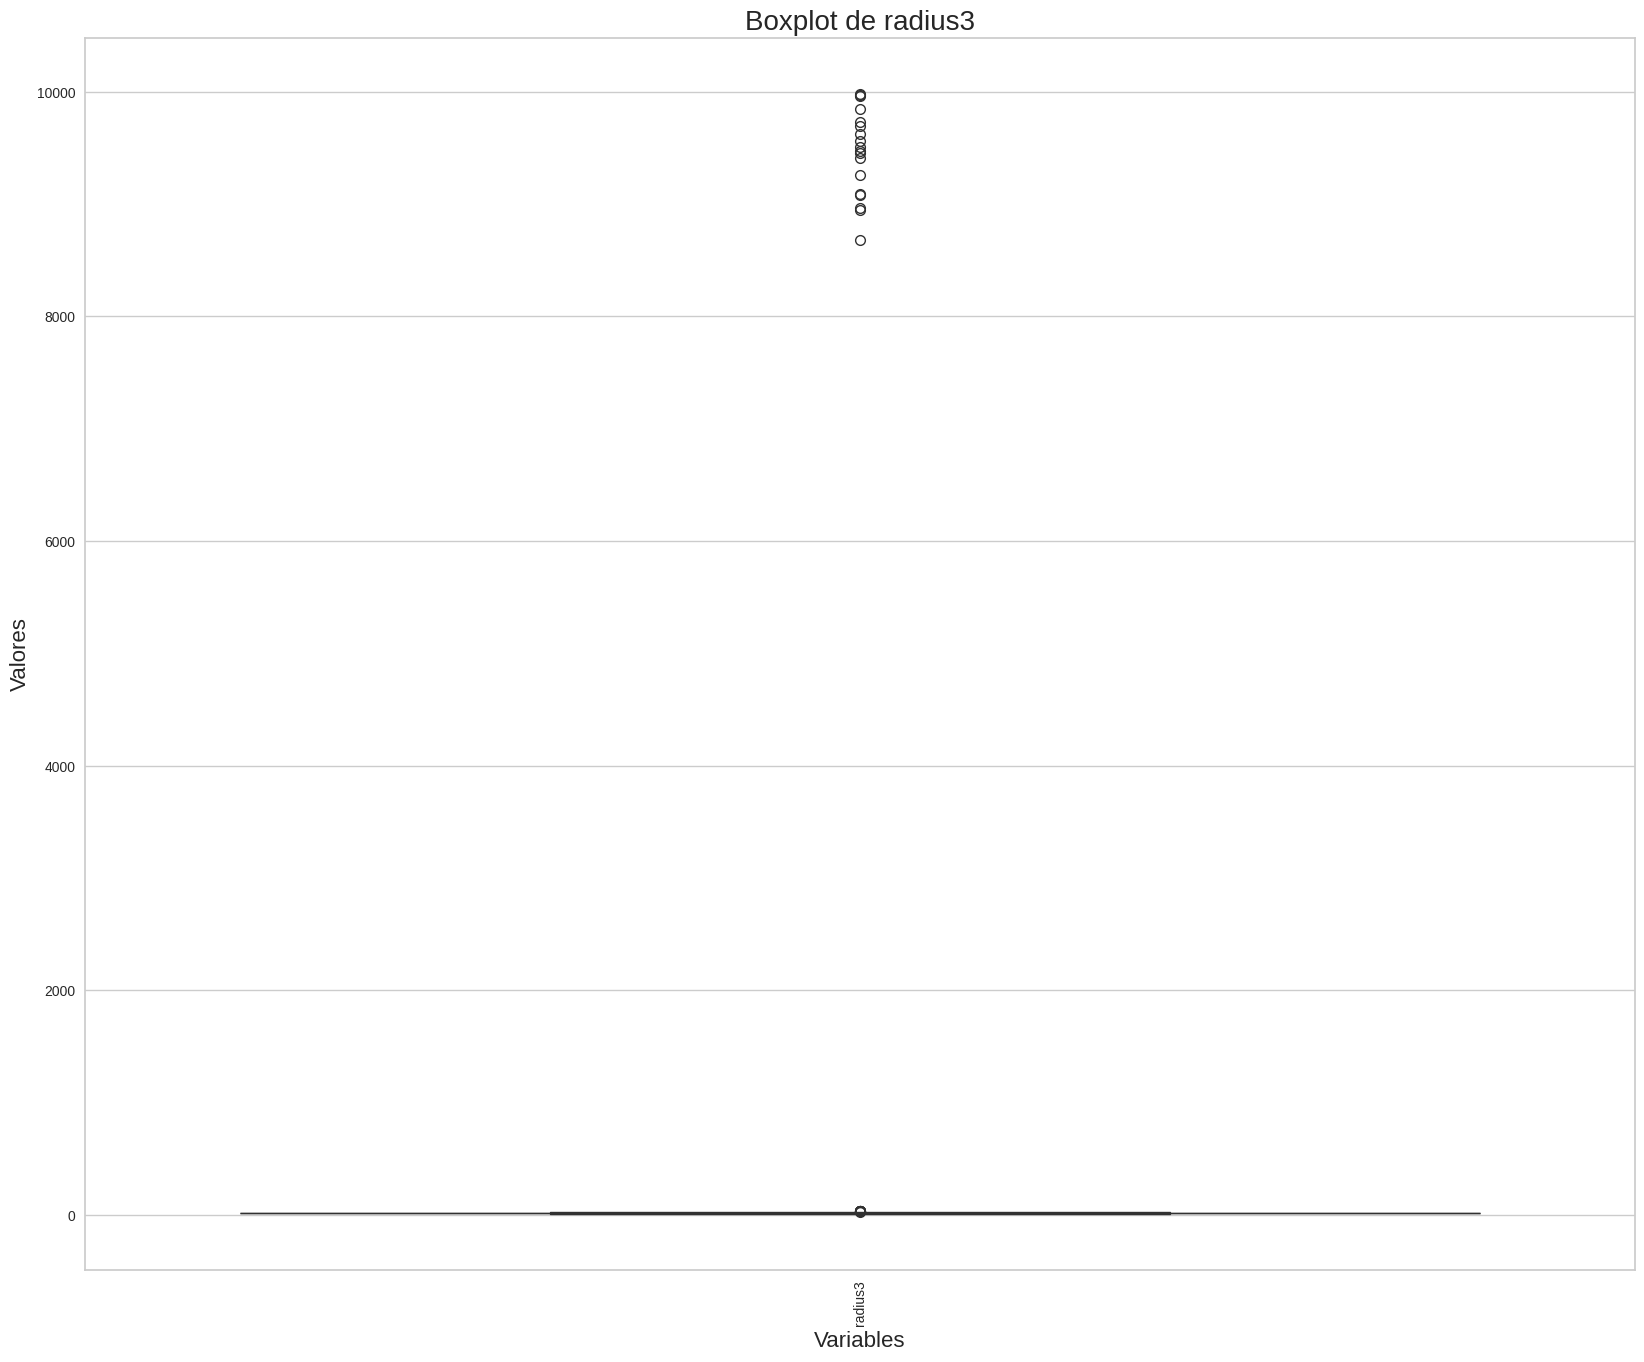

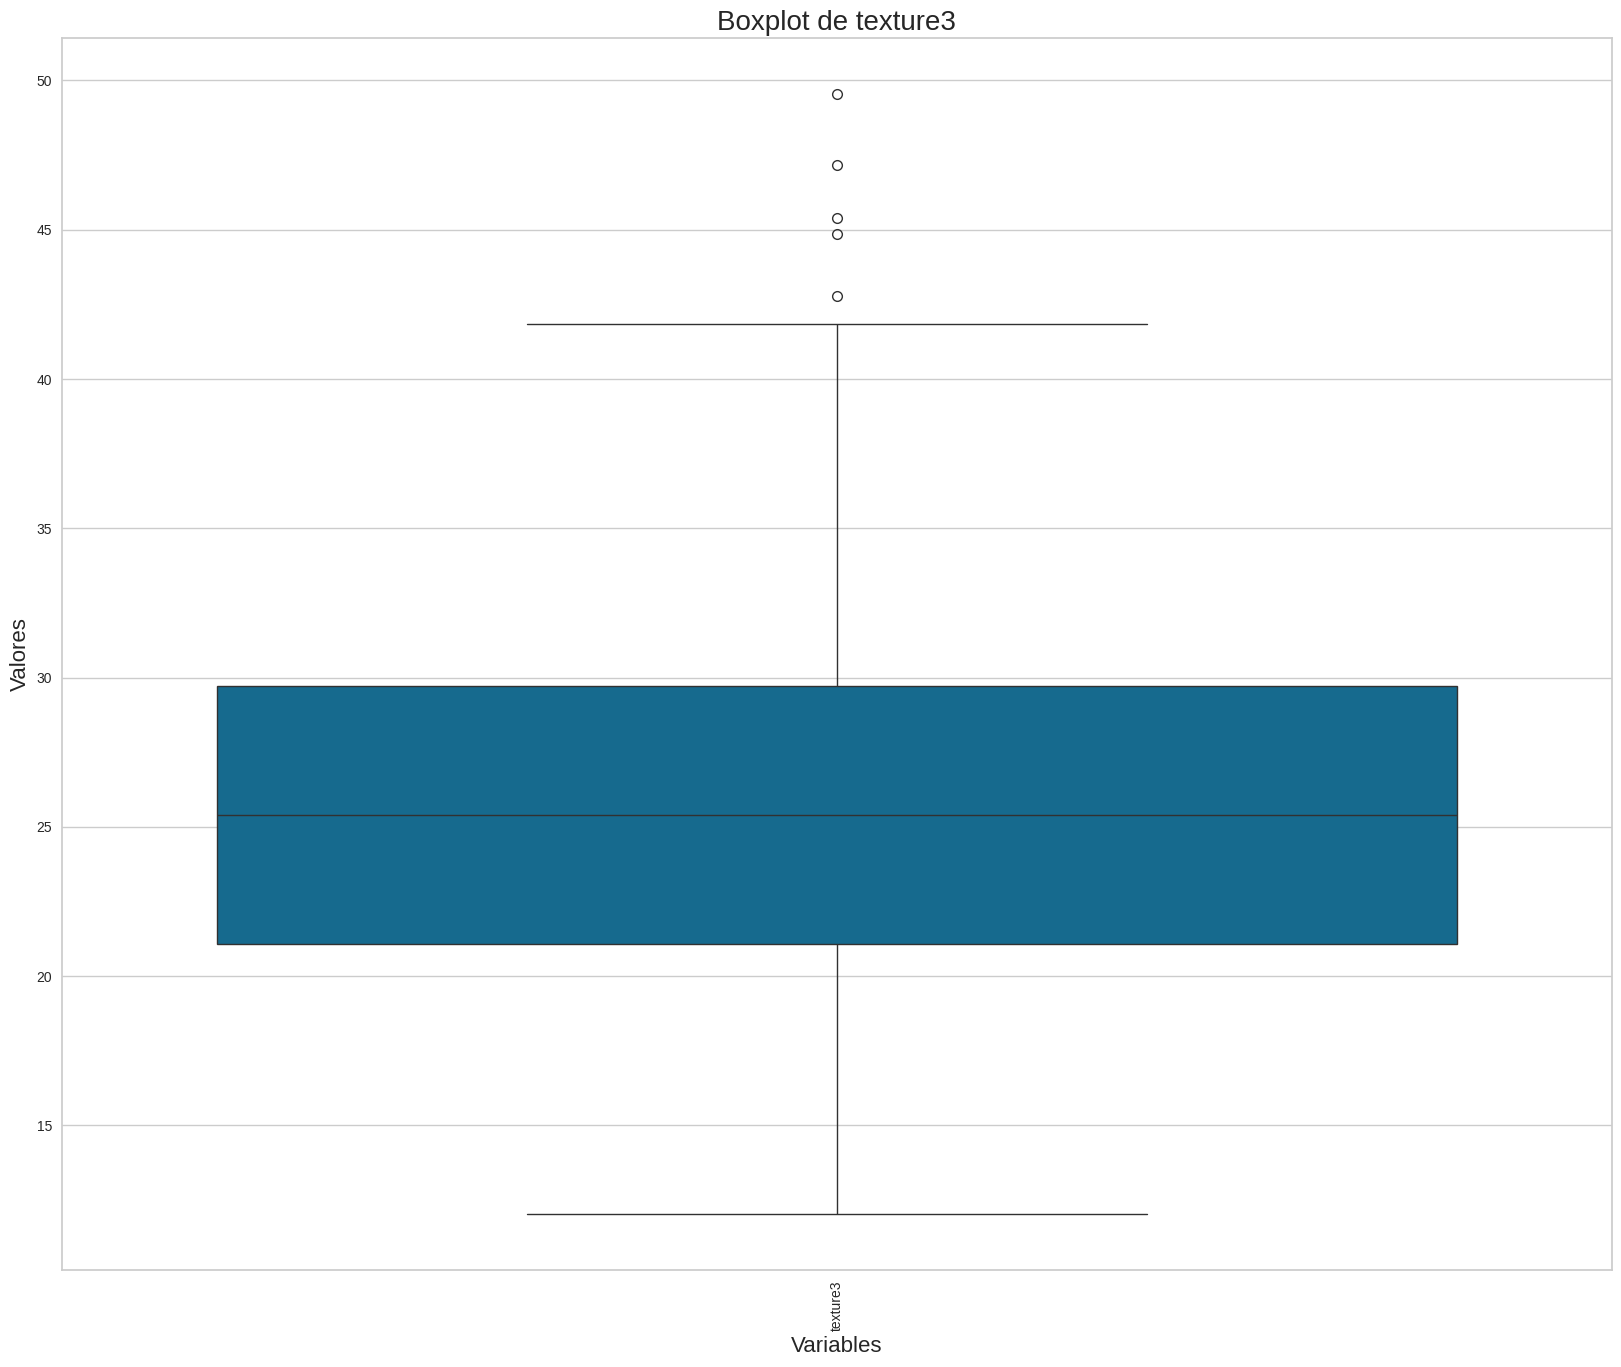

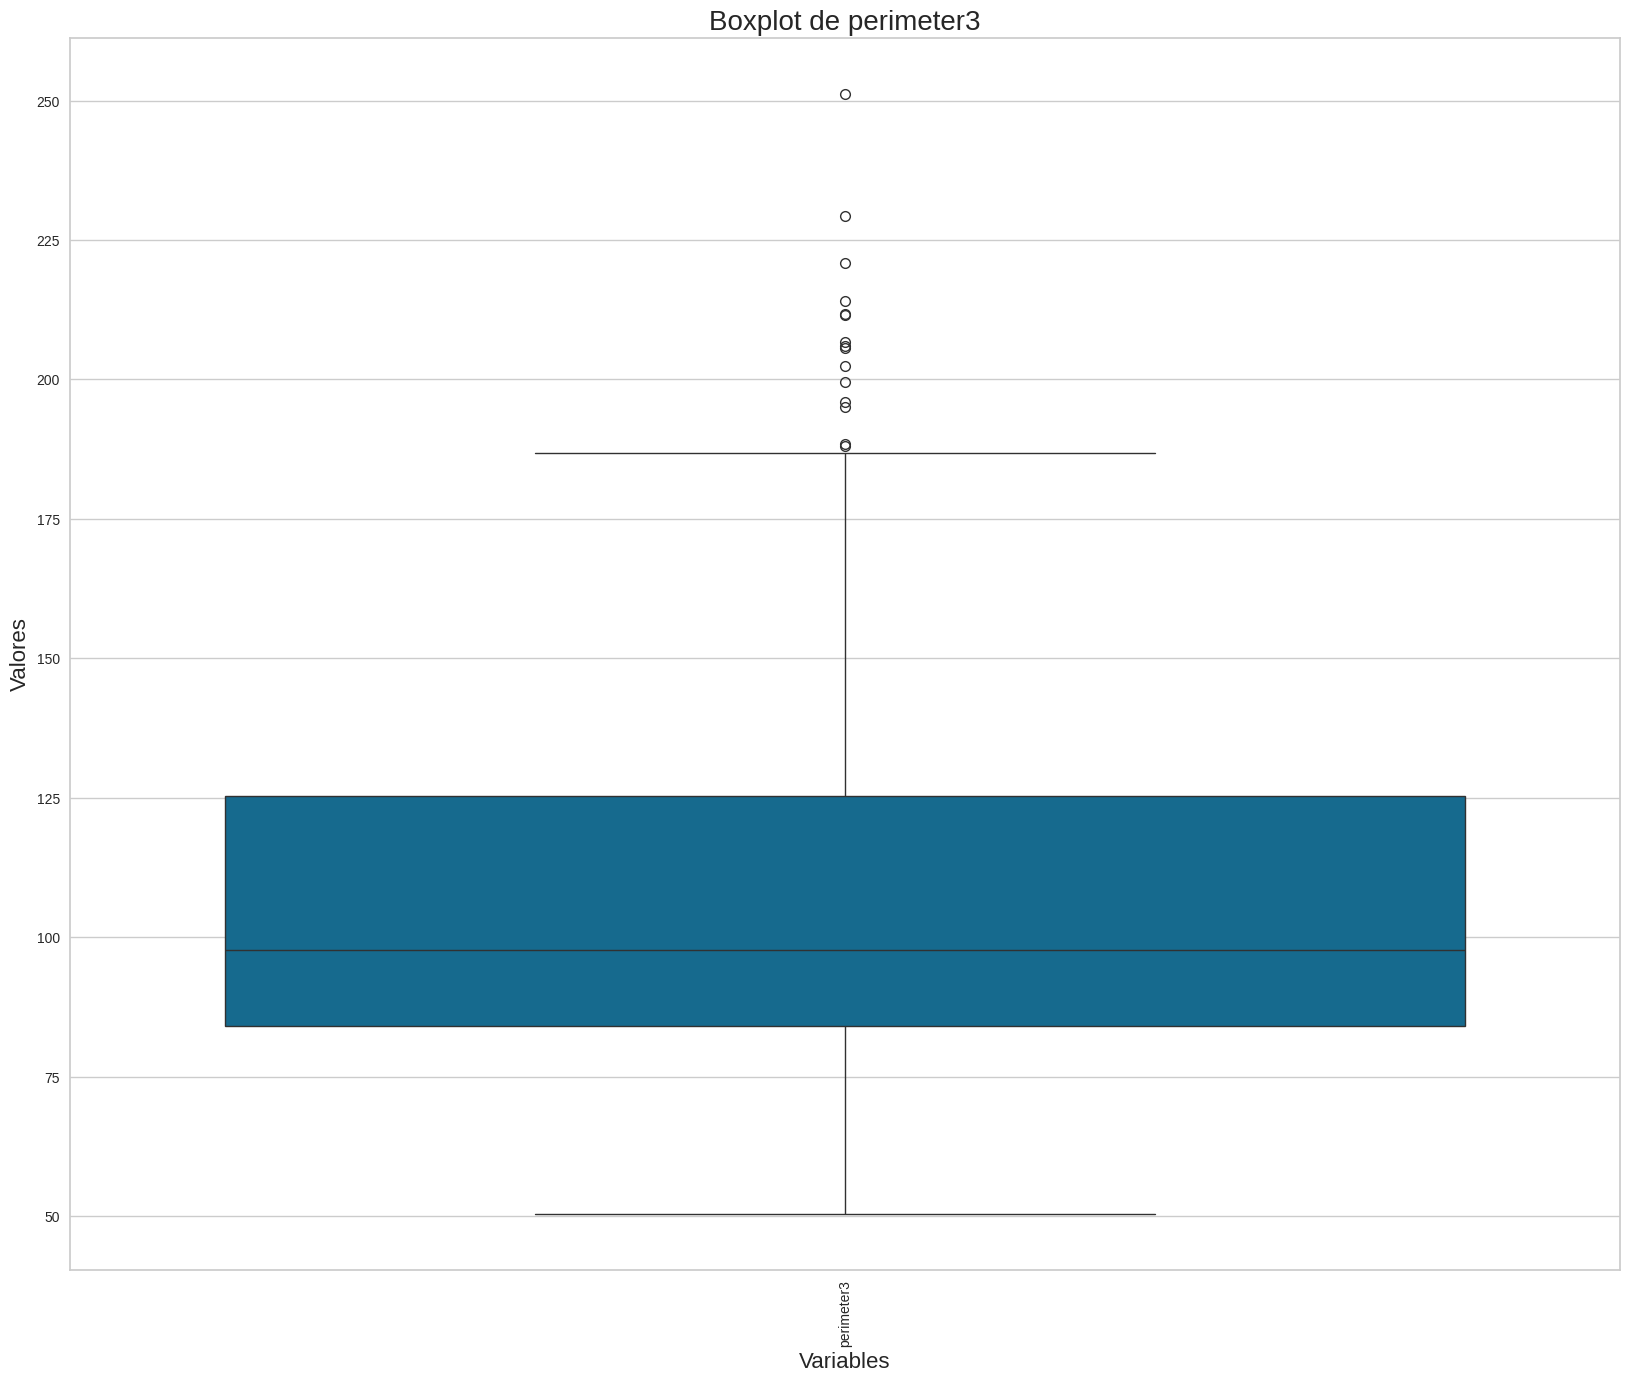

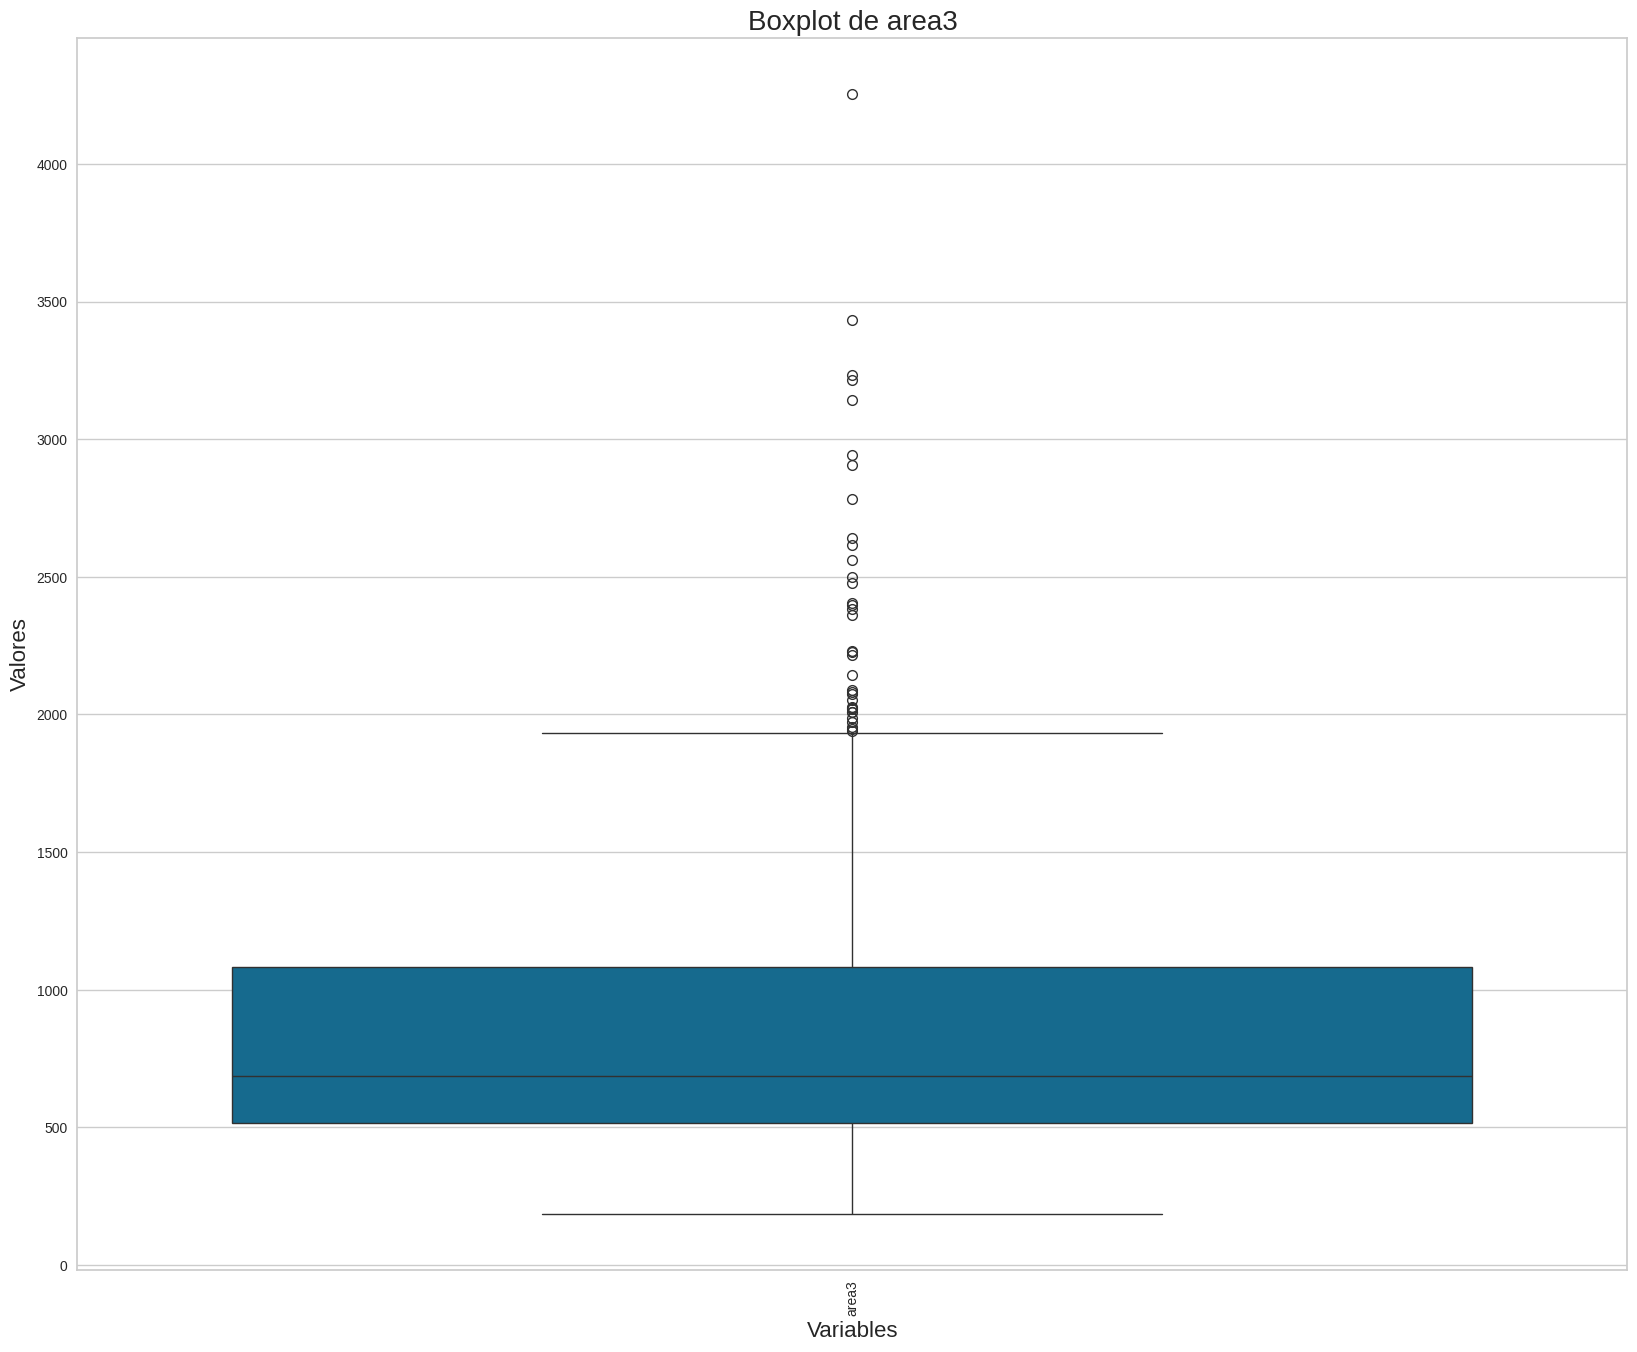

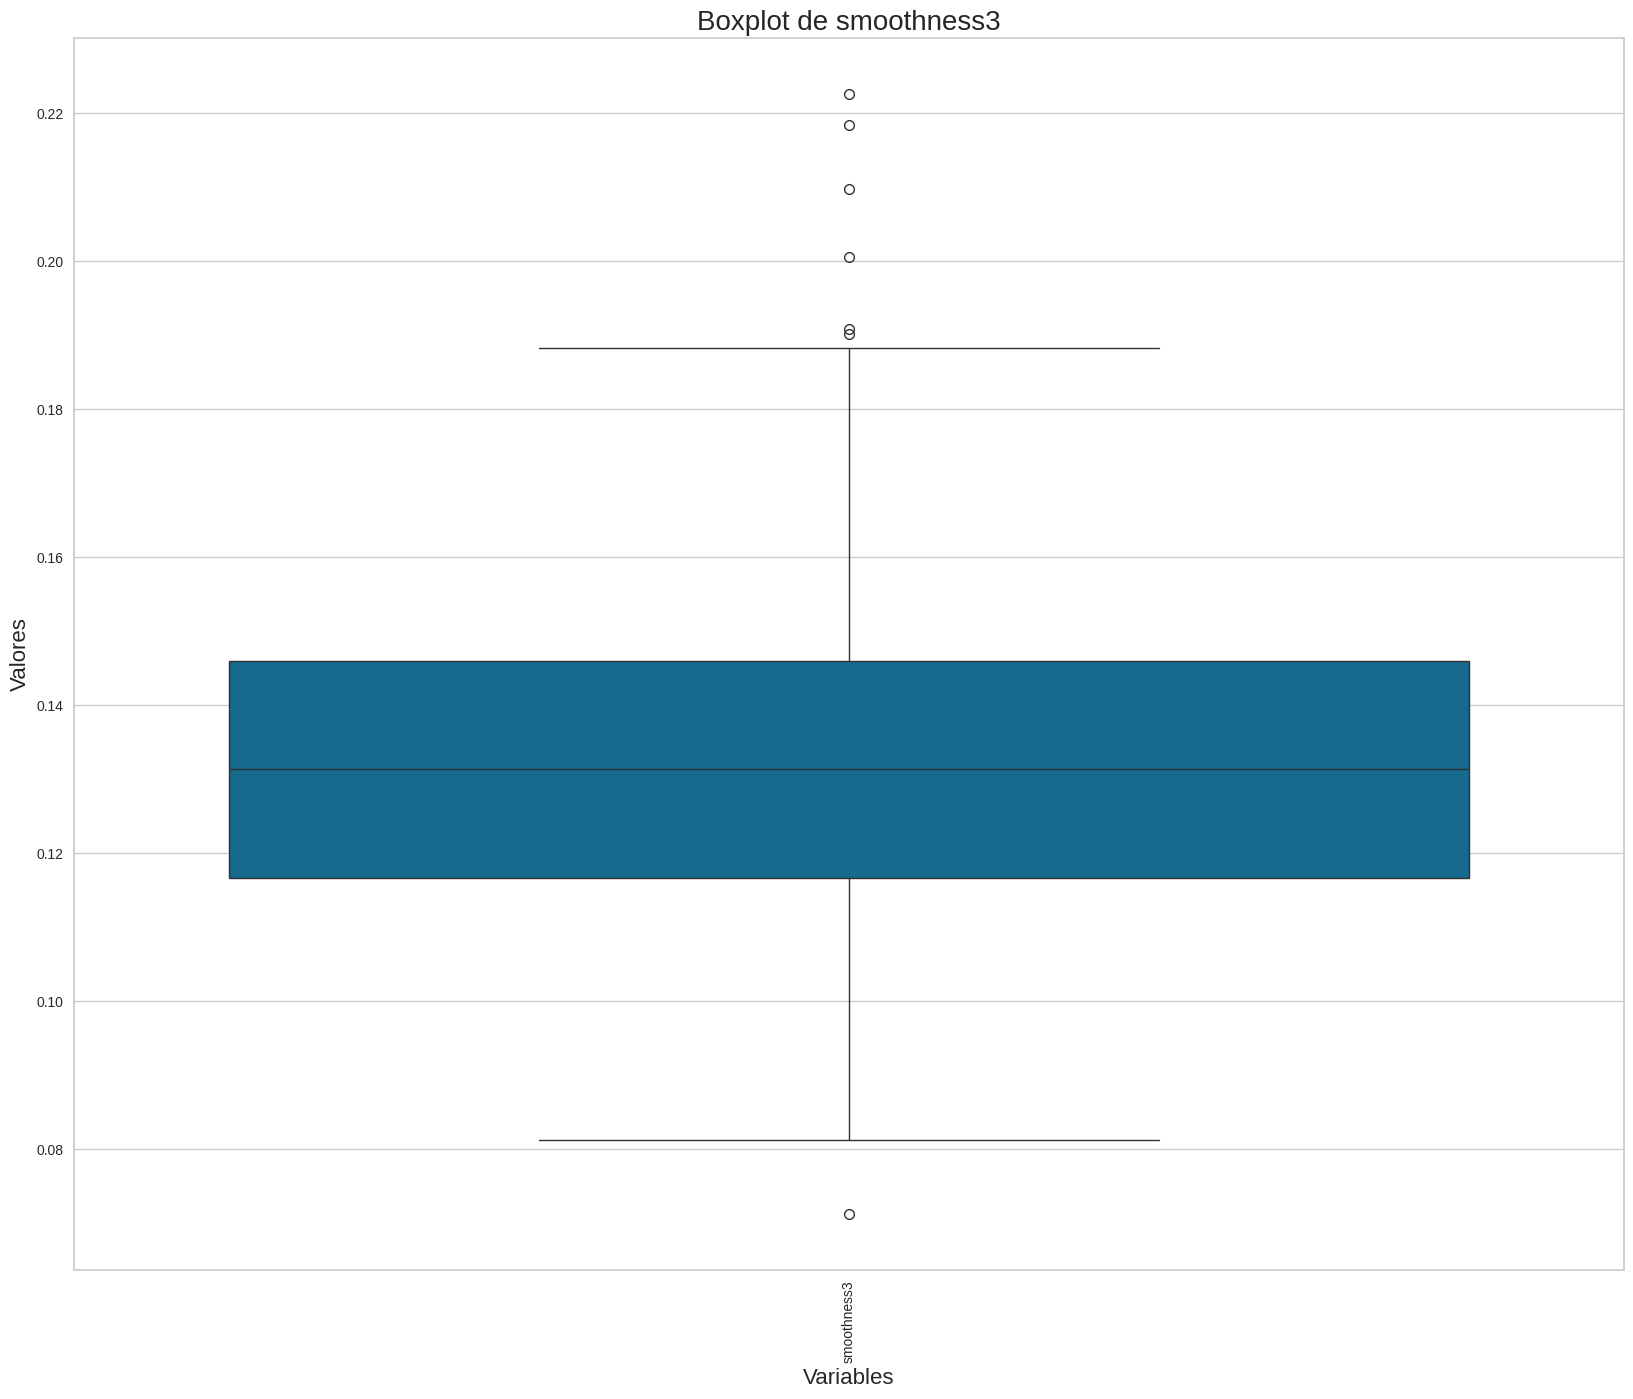

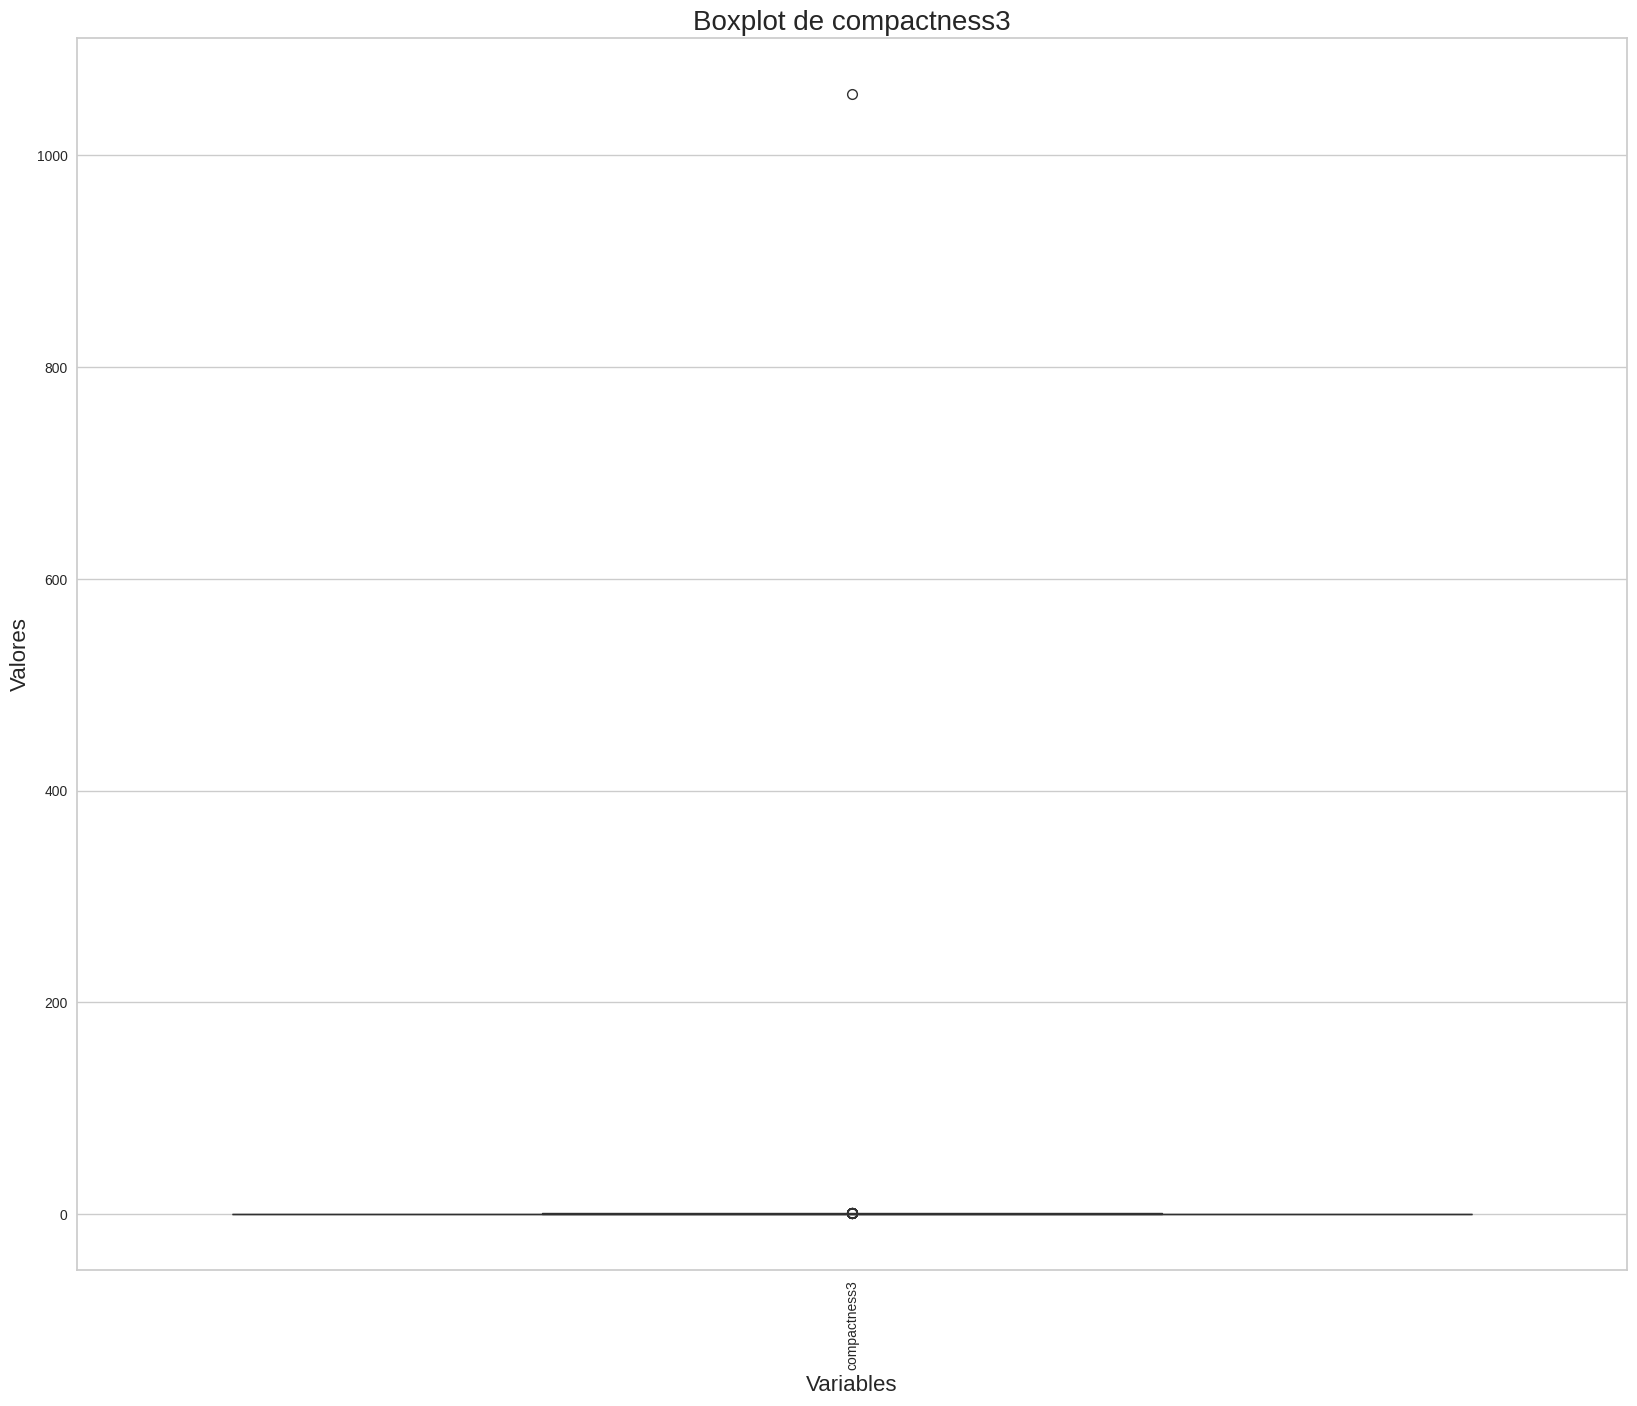

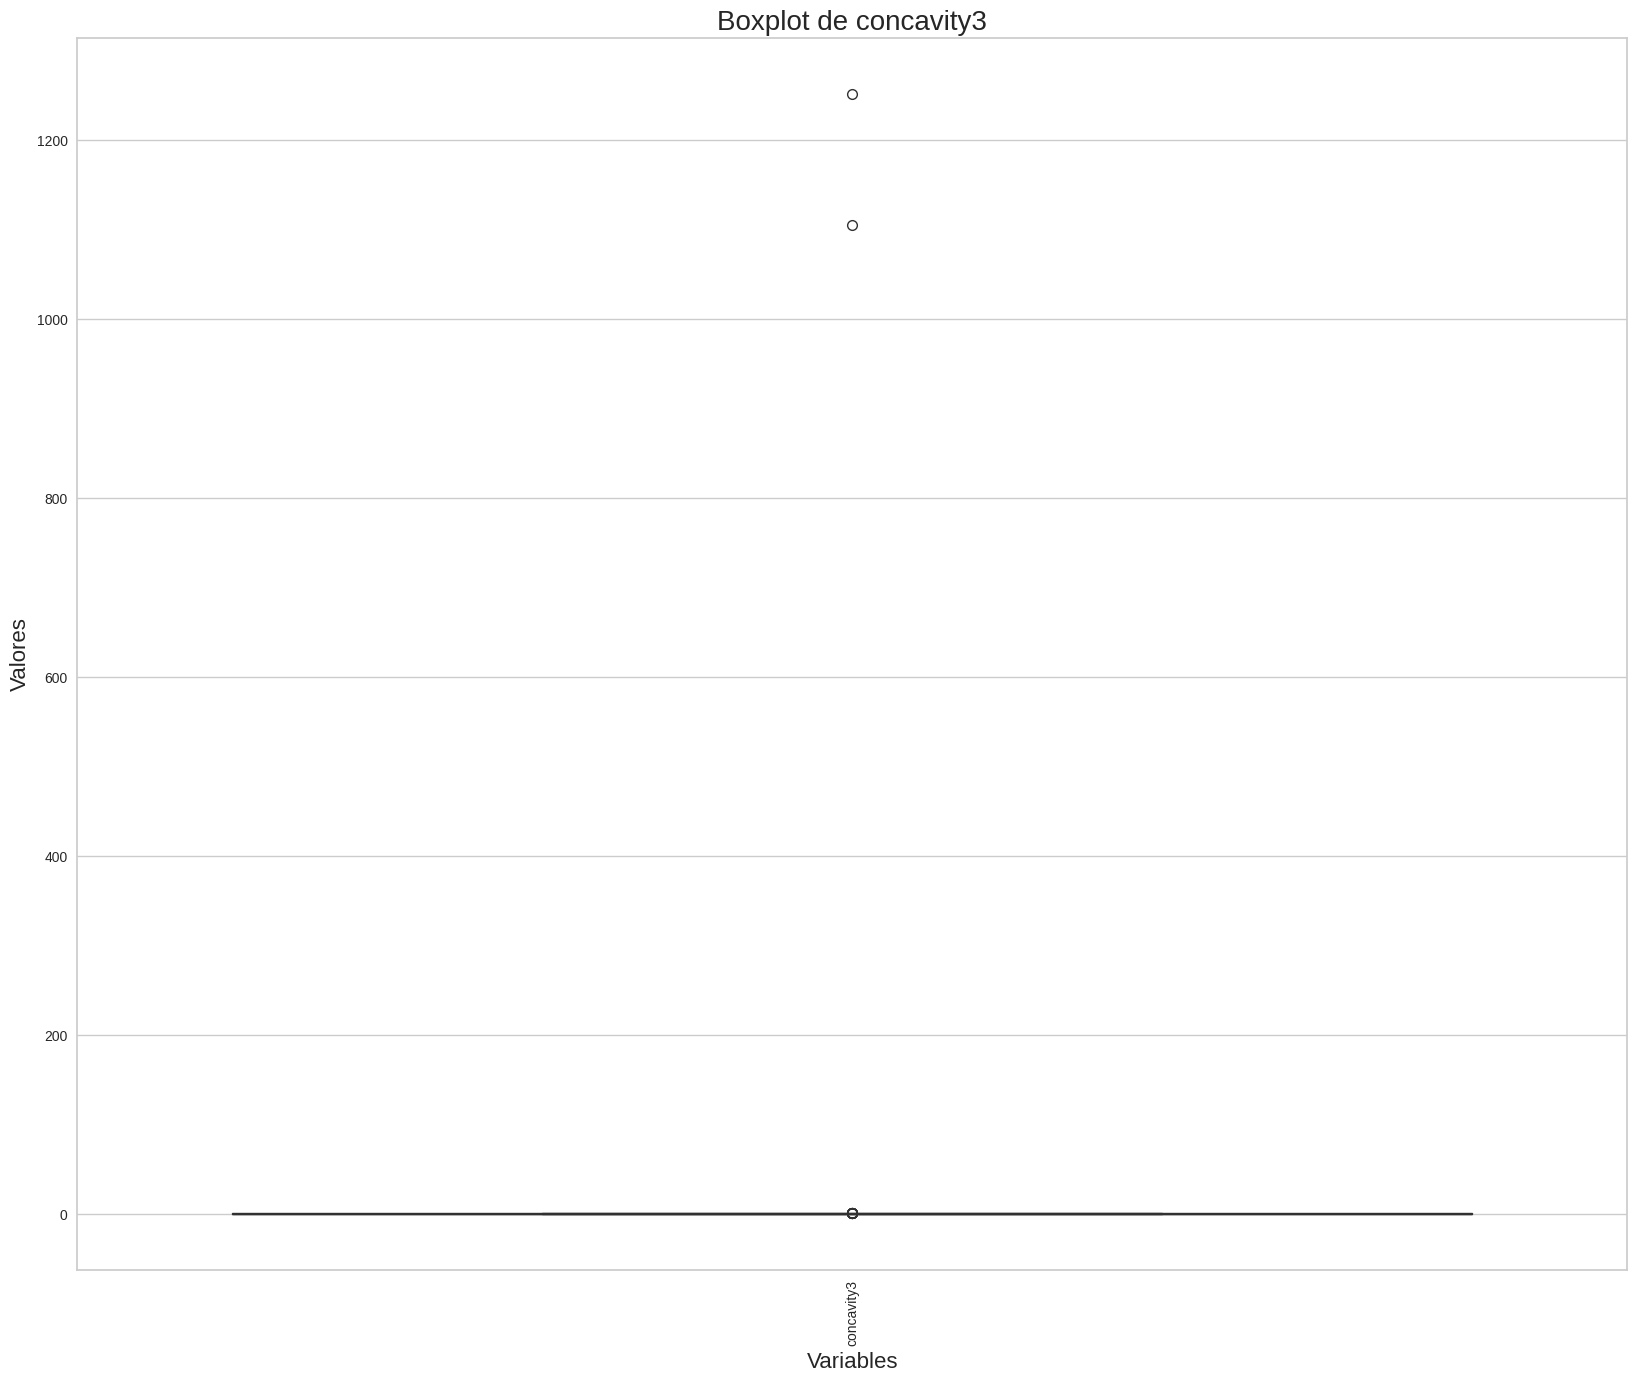

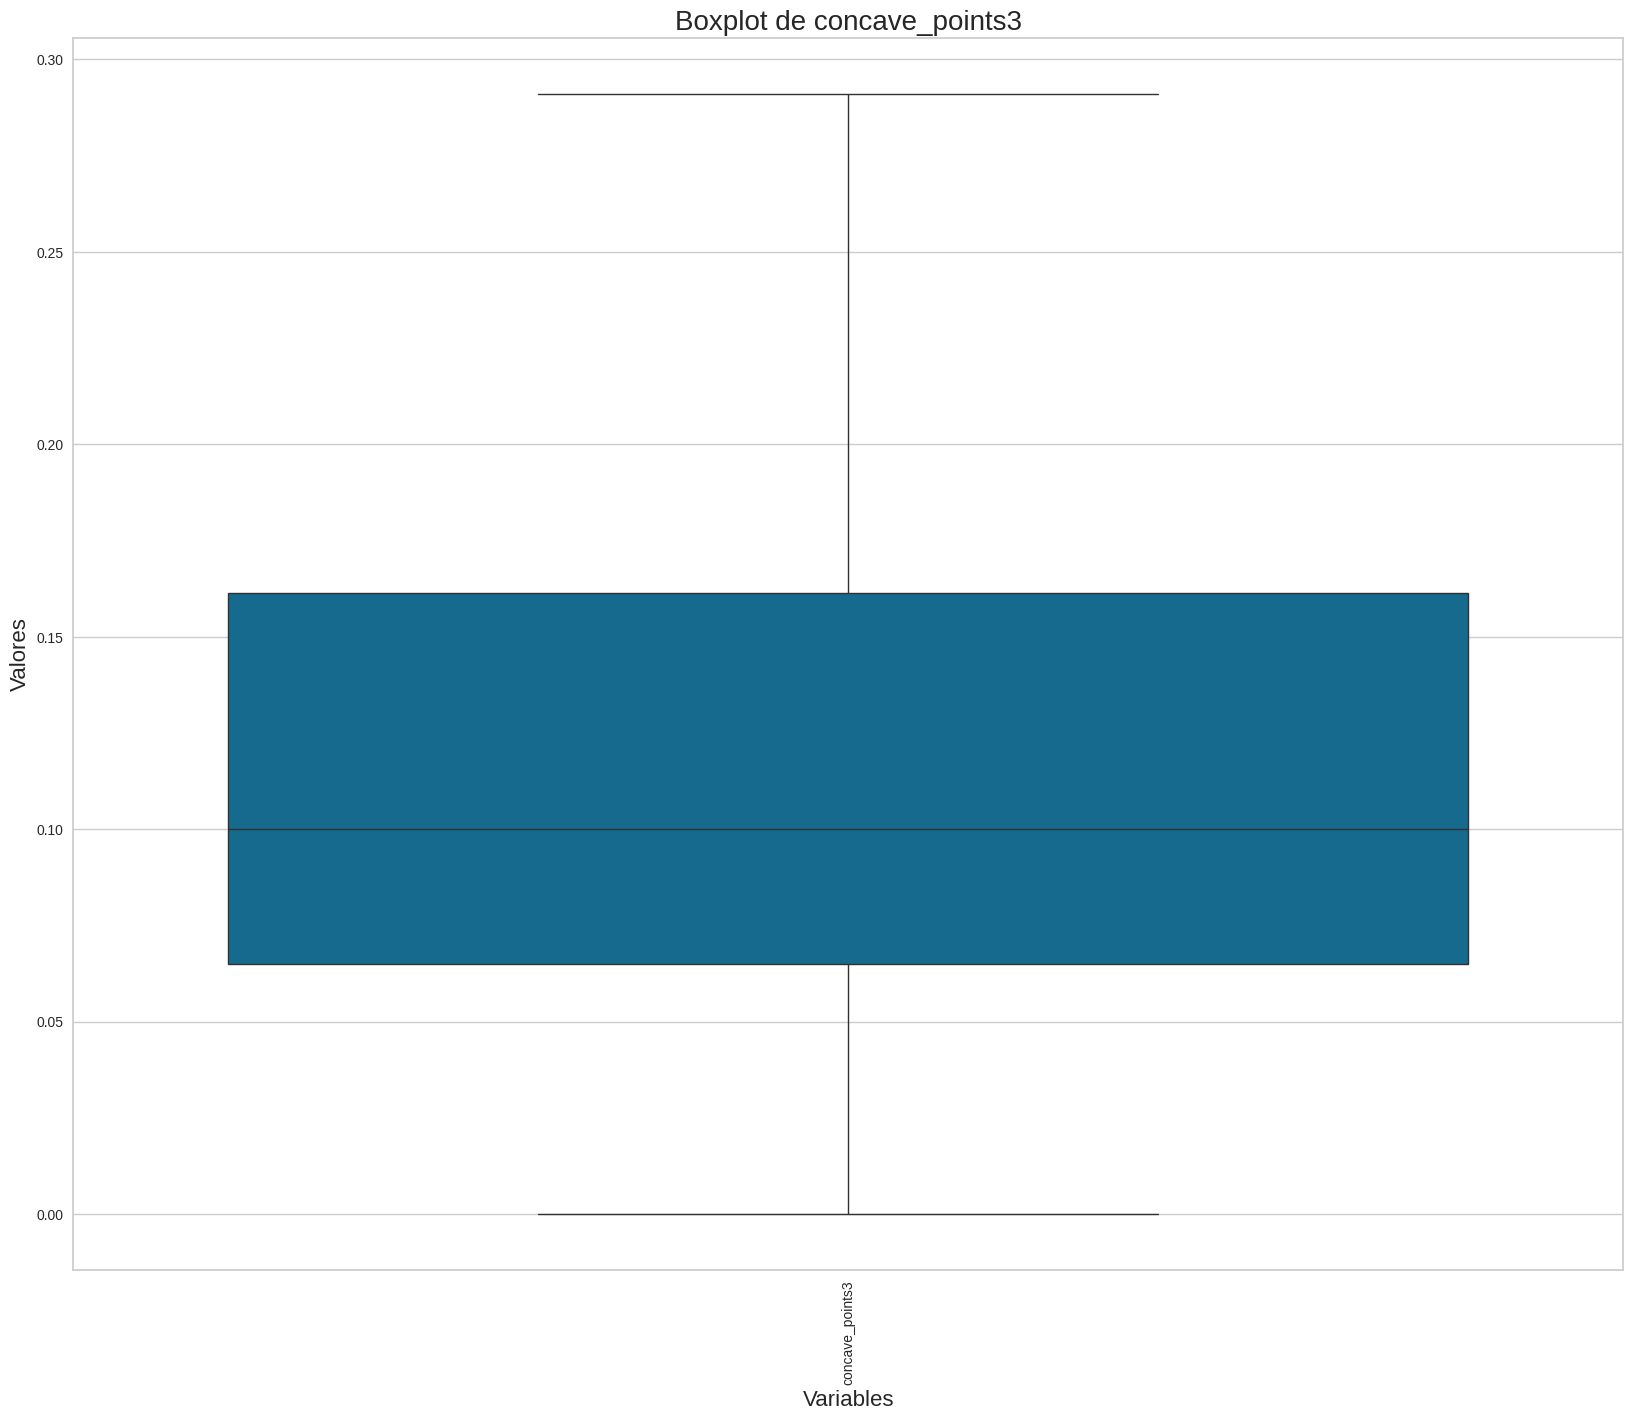

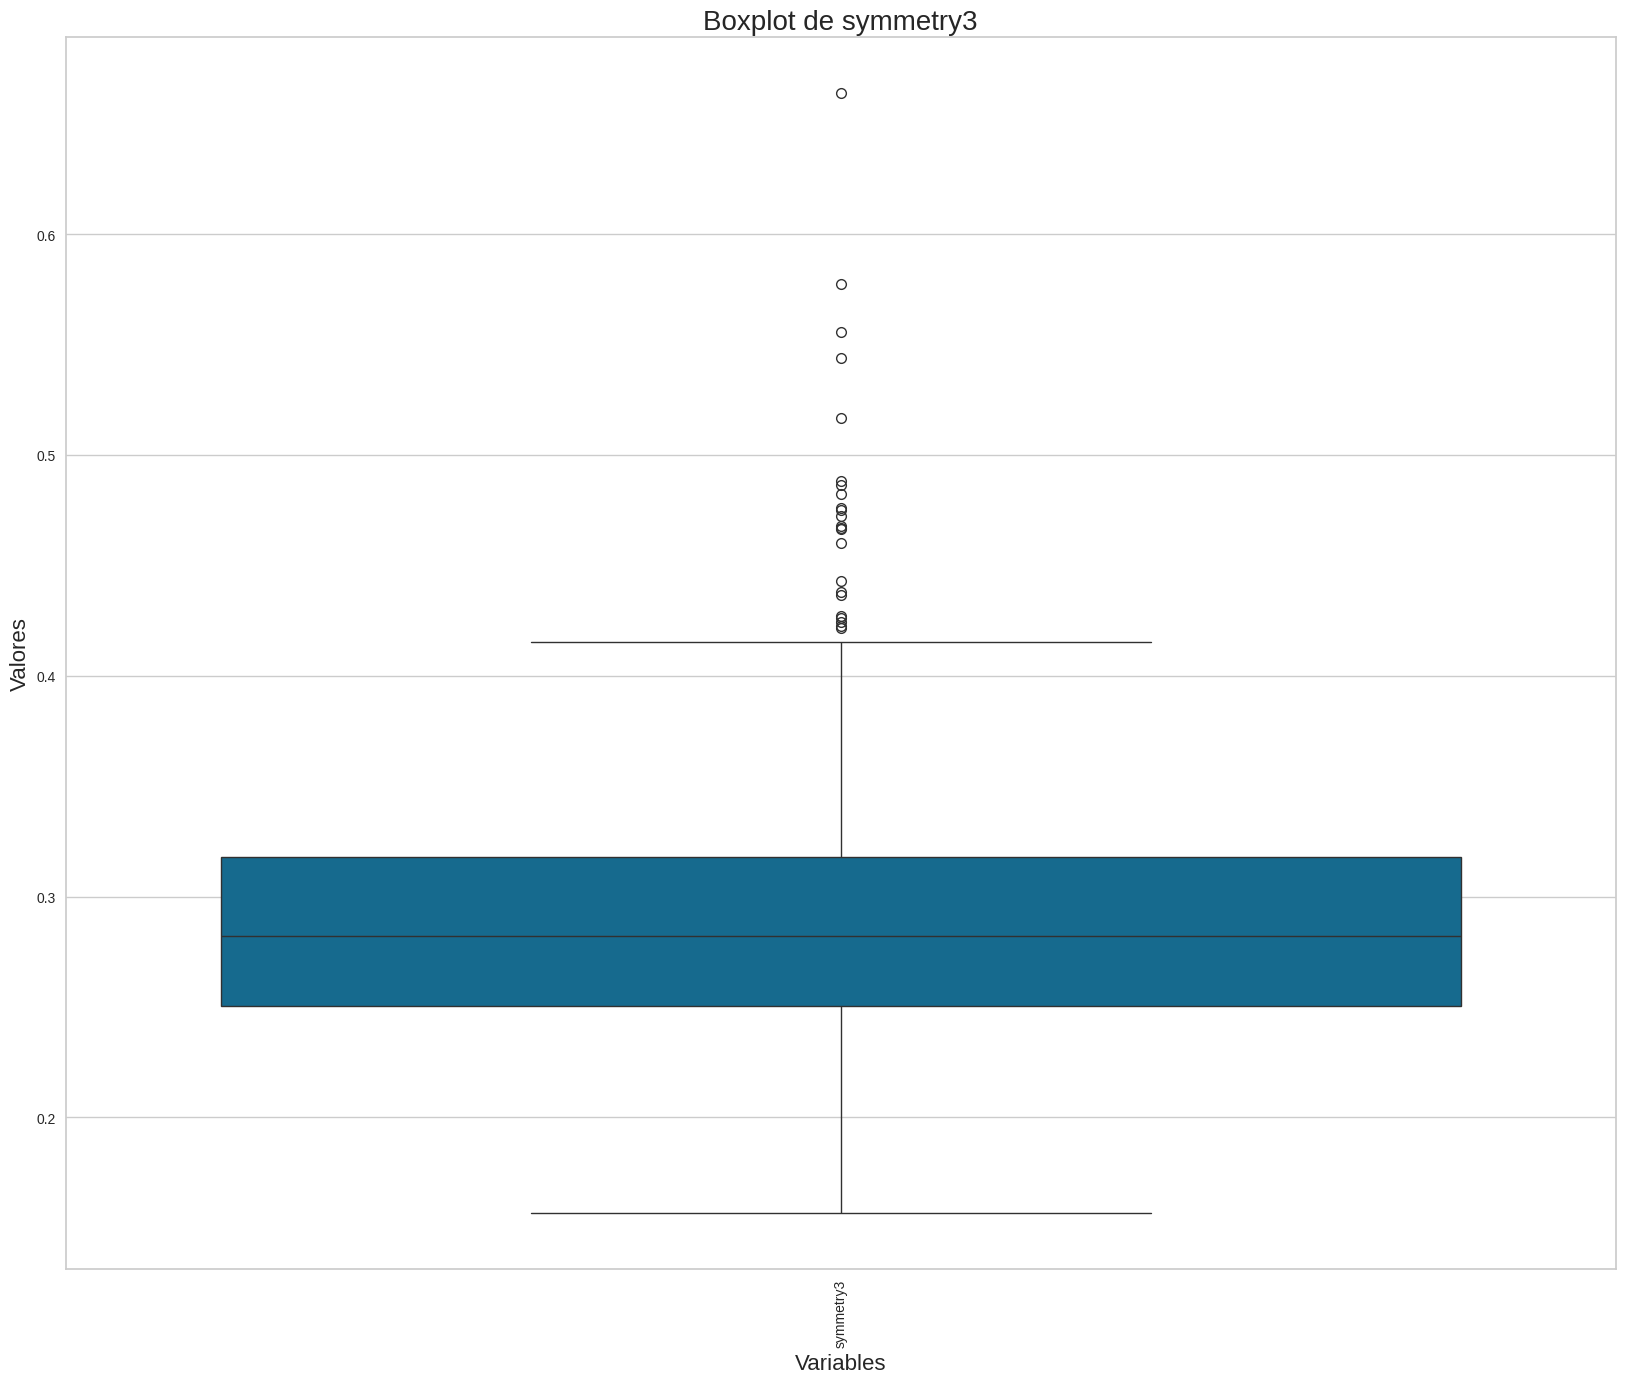

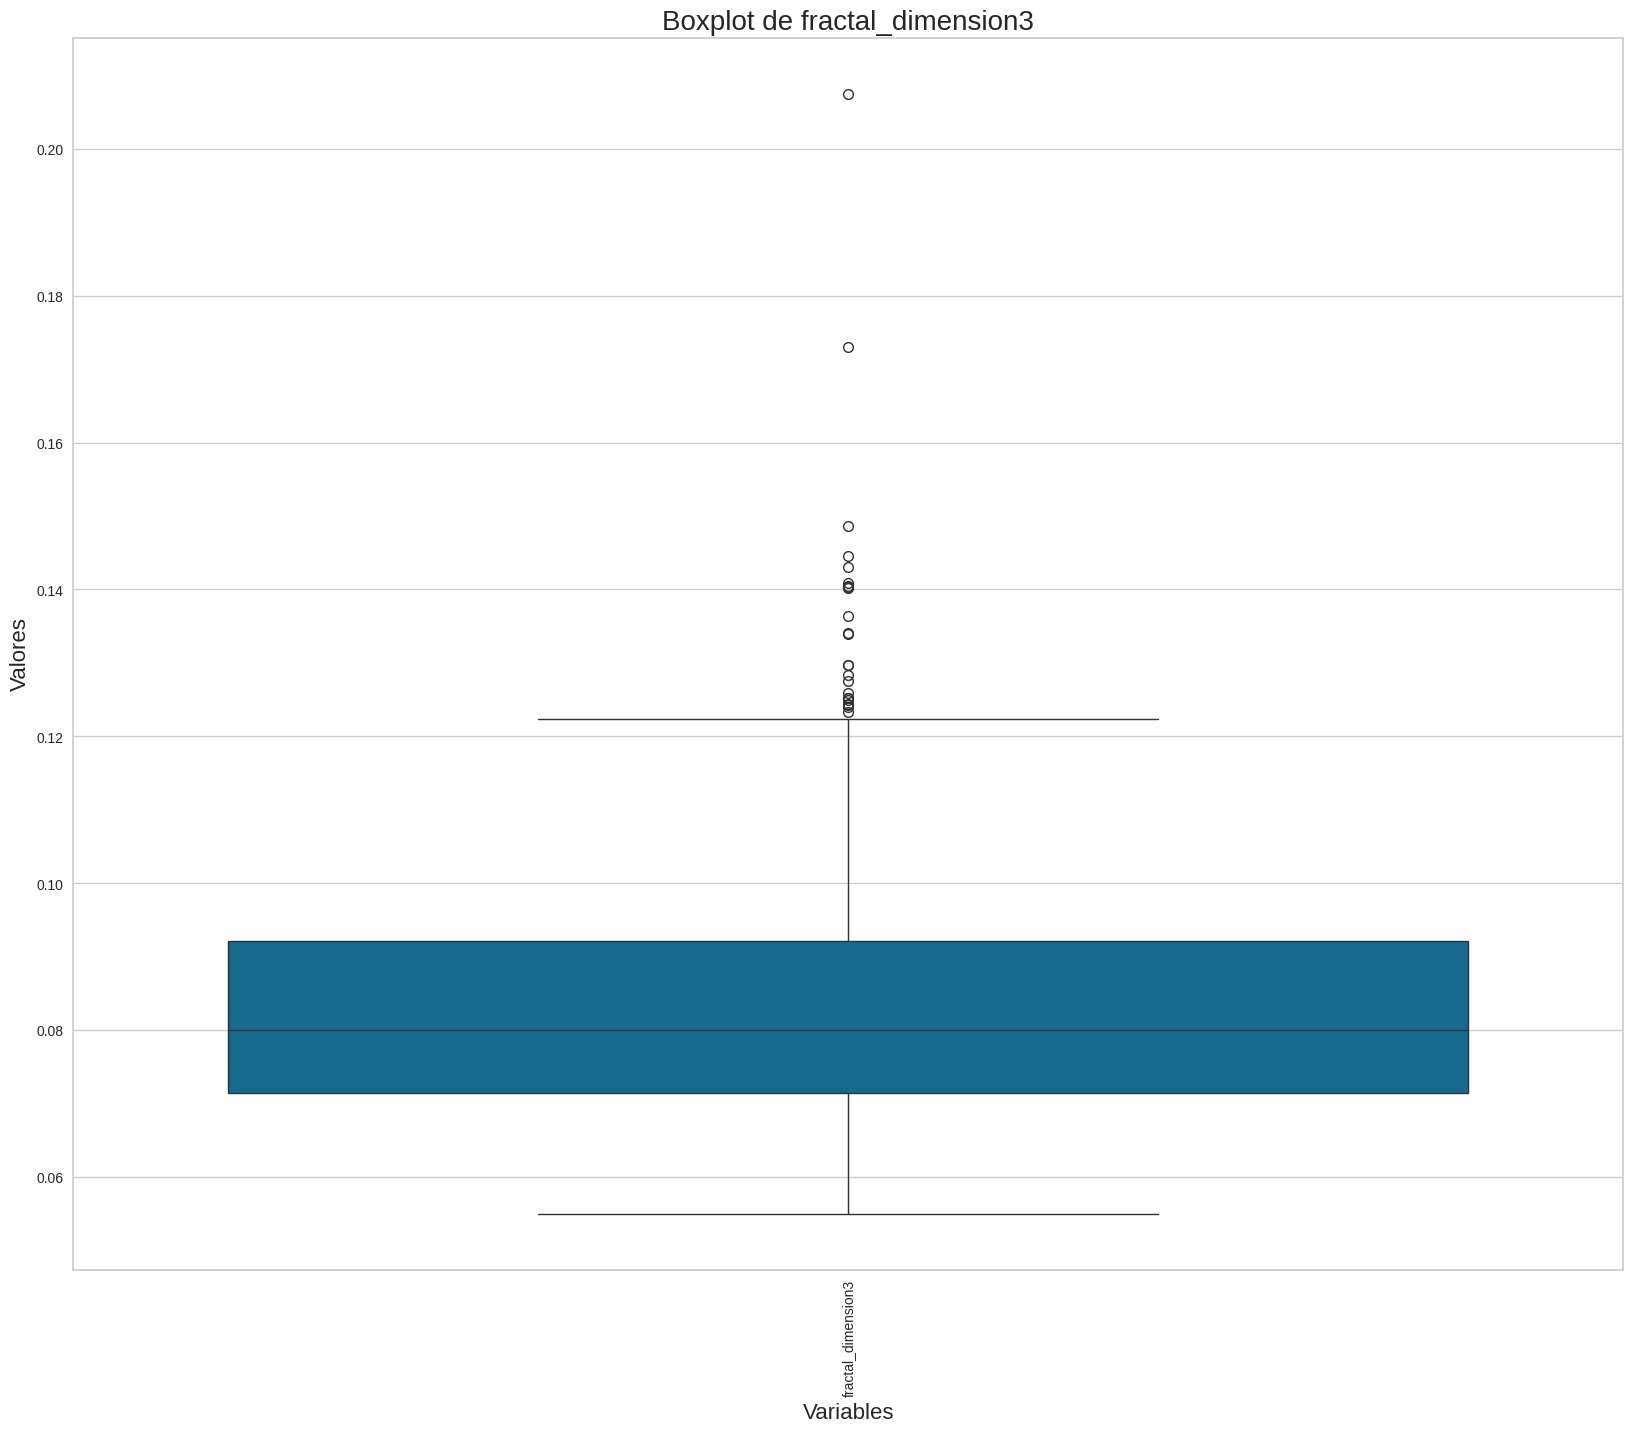

In [ ]:
for column in numerical_features:
    plt.figure(figsize=(20, 16))  # Crear una nueva figura para cada plot
    sns.boxplot(data=df[[column]])  # Realizar un boxplot para la columna actual
    plt.title(f'Boxplot de {column}', fontsize=20)  # Personalizar el título con el nombre de la columna
    plt.xlabel('Variables', fontsize=16)
    plt.ylabel('Valores', fontsize=16)
    plt.xticks(rotation=90)  # Es posible que no necesite esta línea, ya que hay solo una variable
    plt.show()  # Mostrar el plot

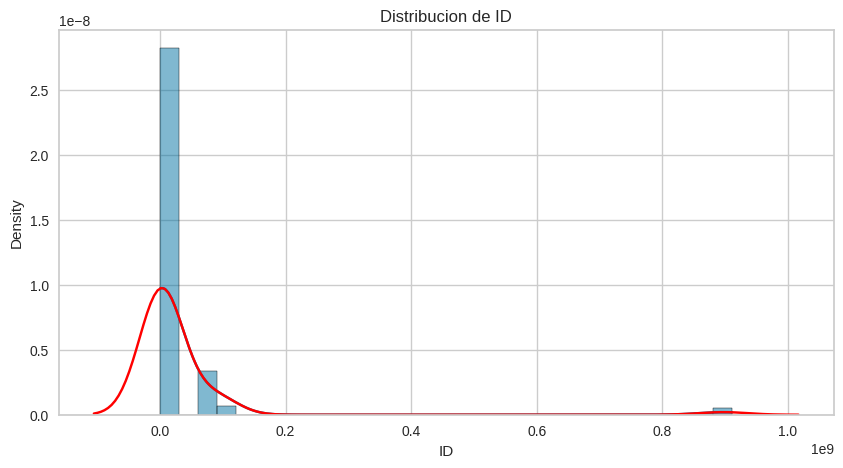

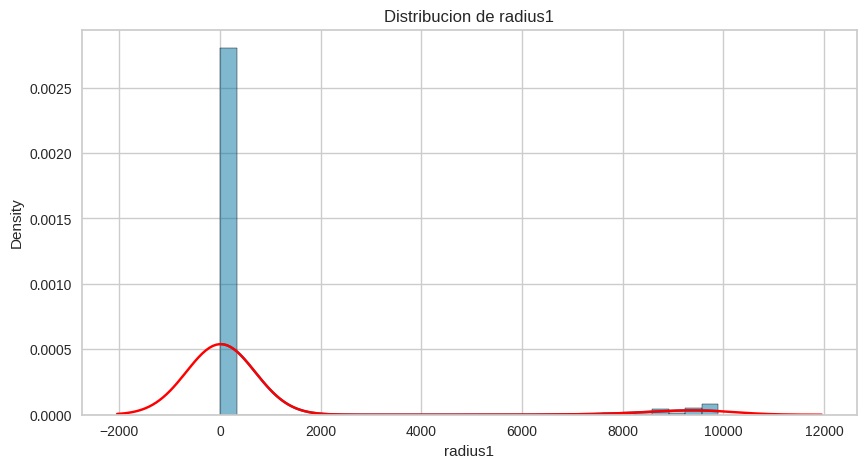

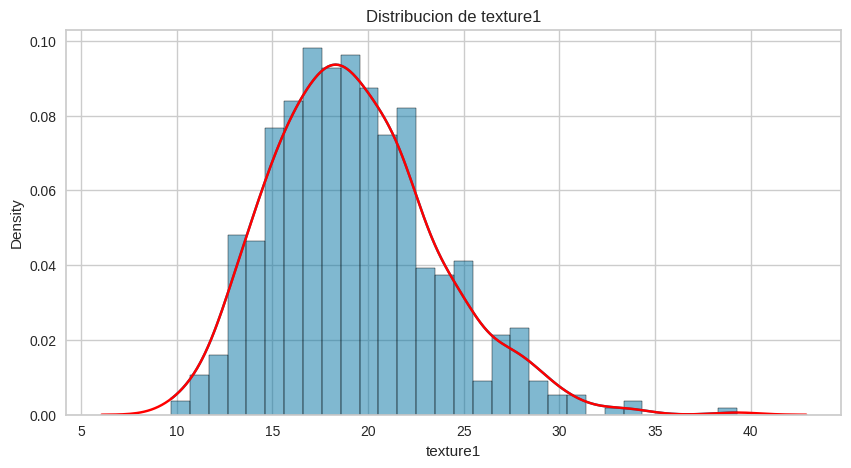

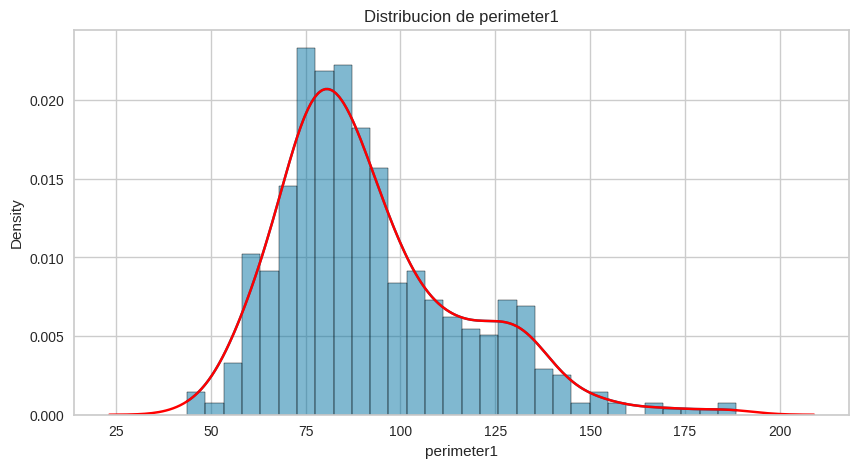

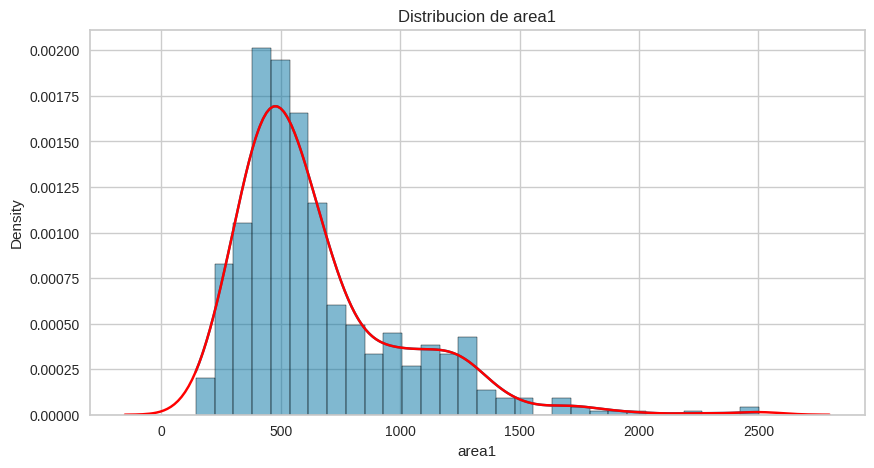

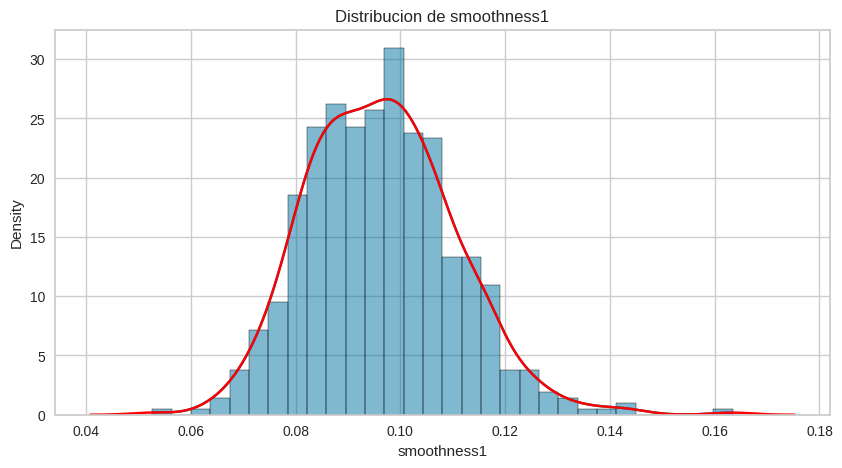

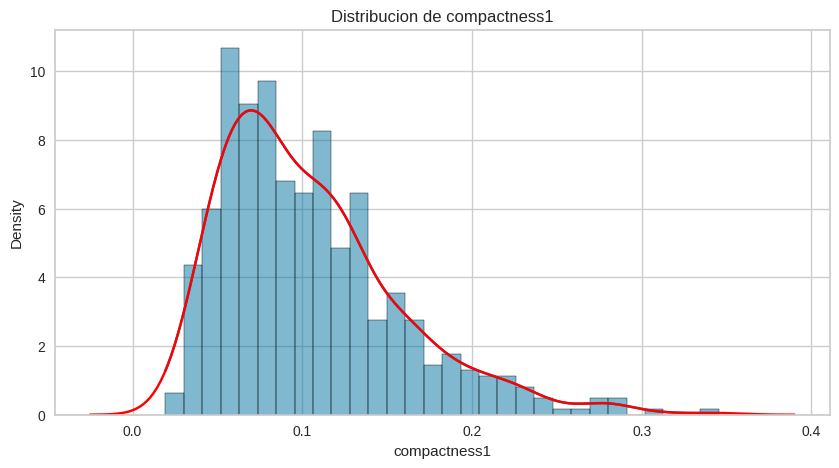

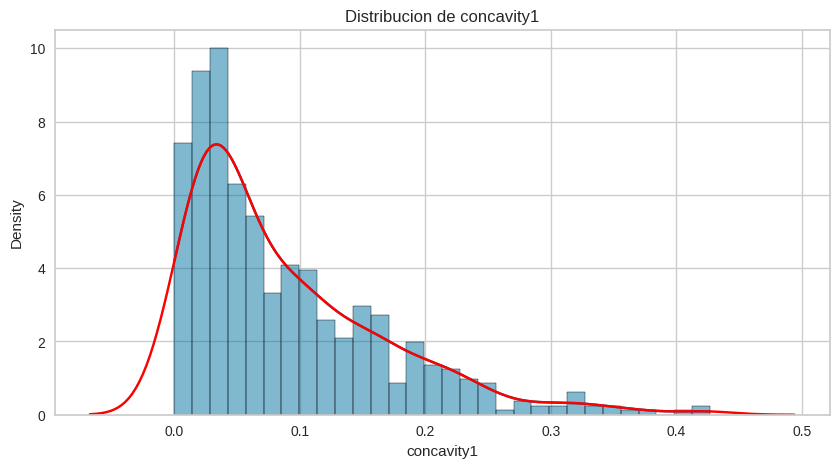

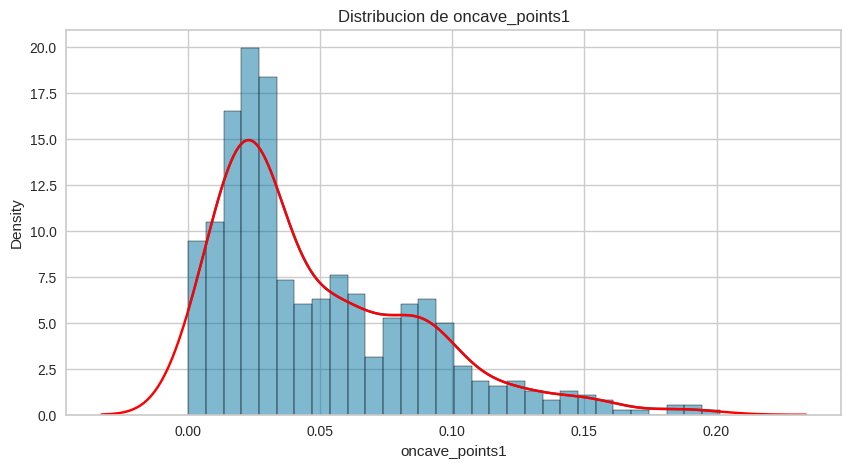

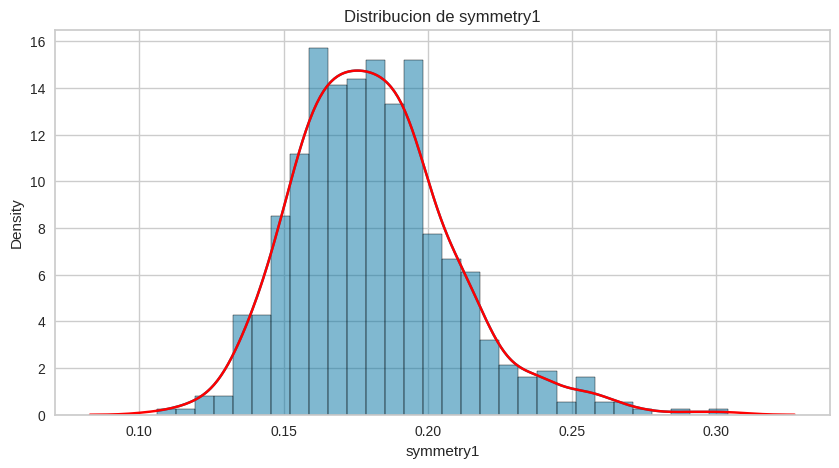

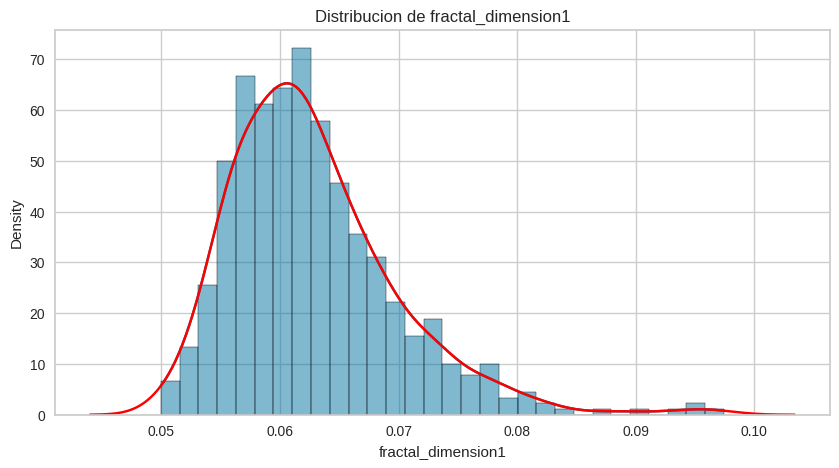

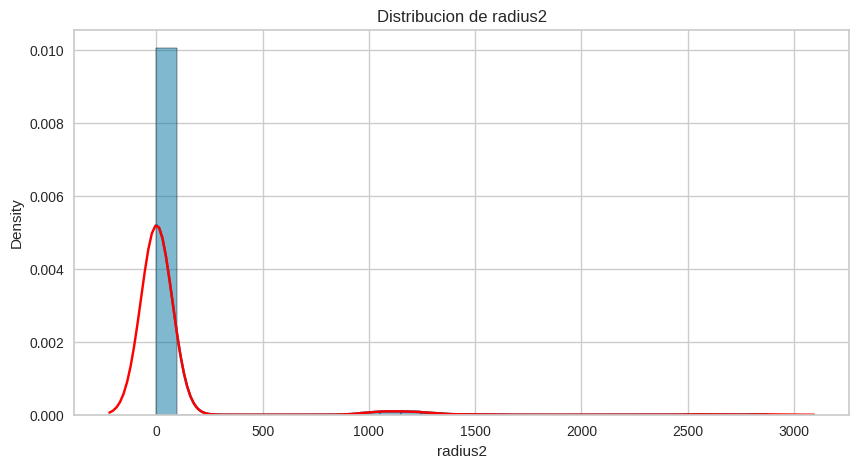

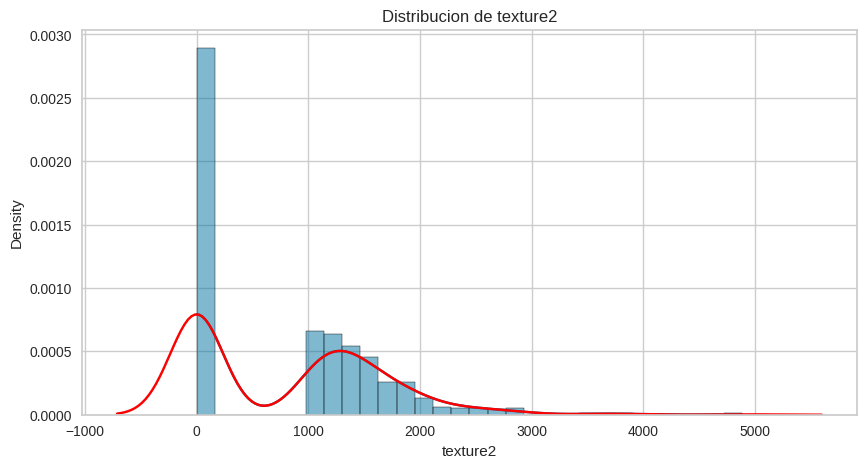

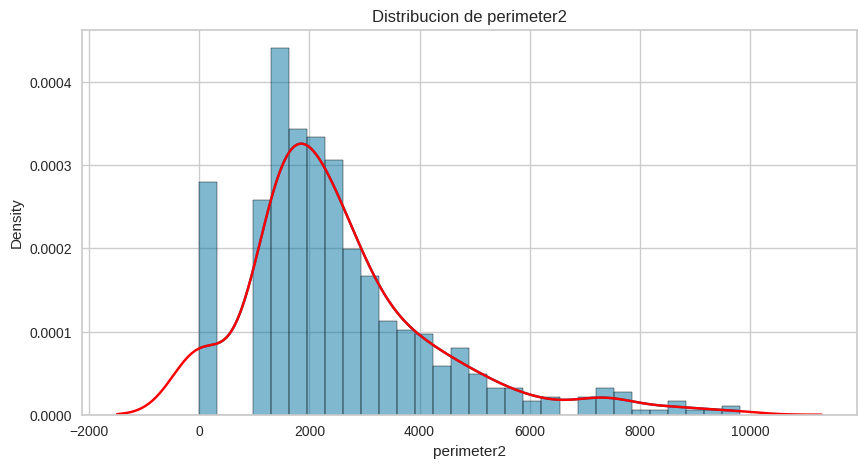

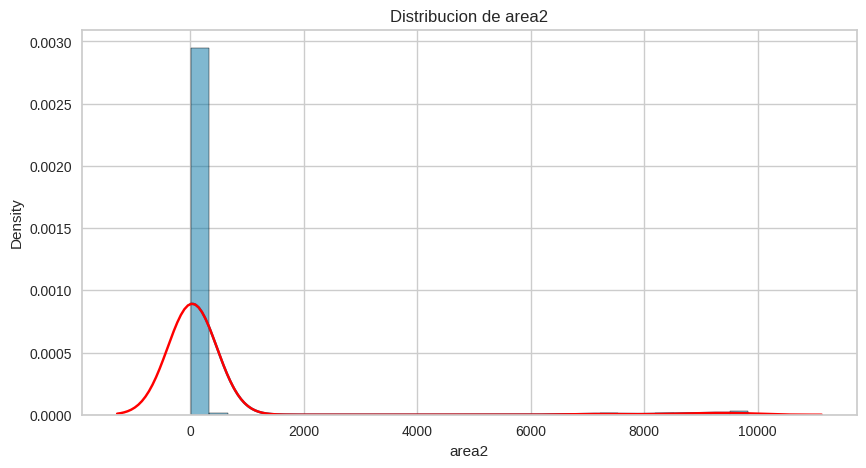

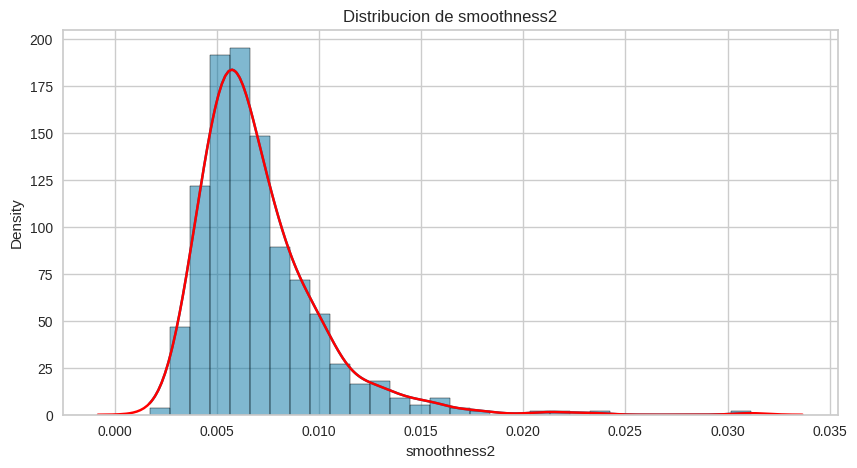

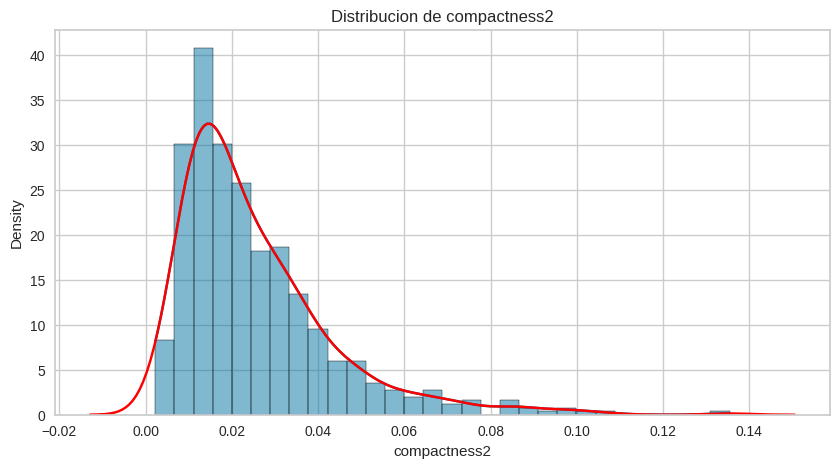

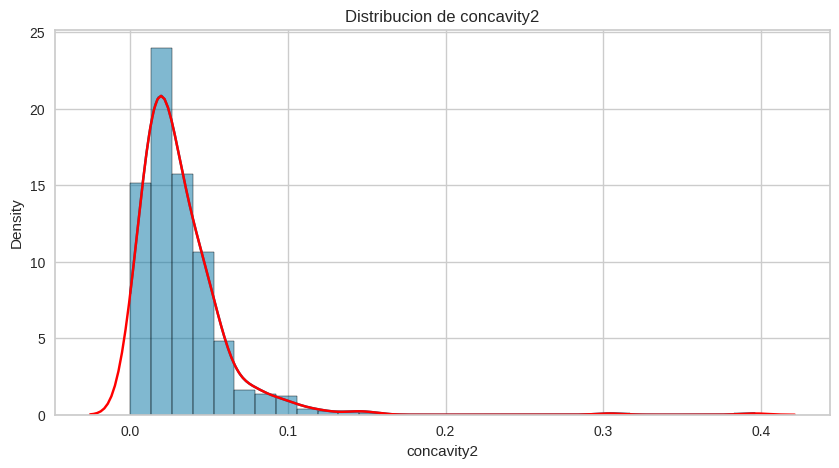

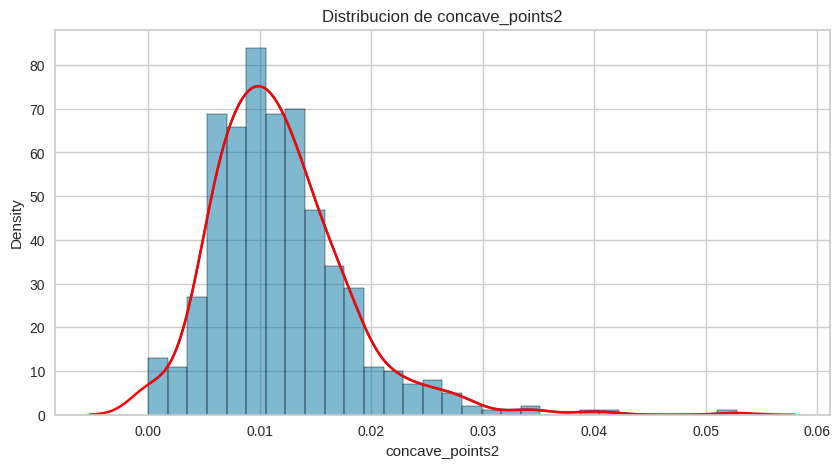

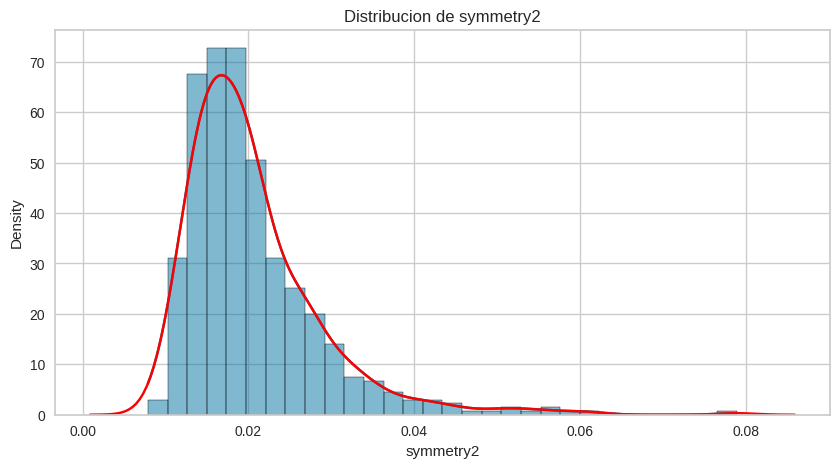

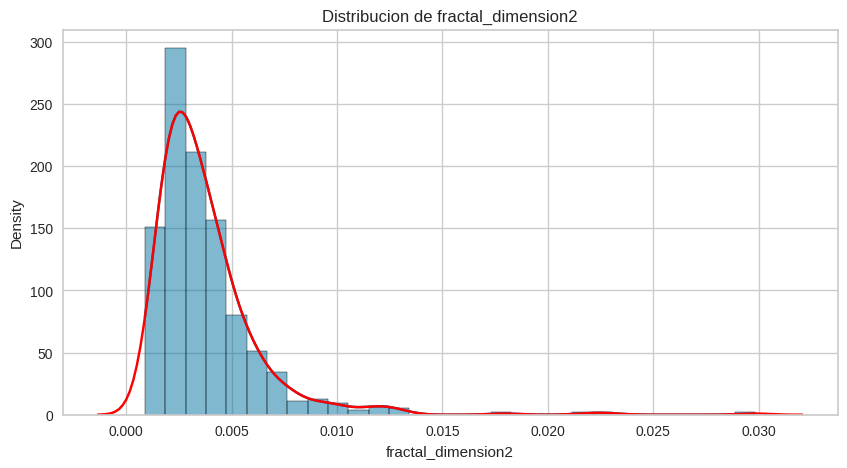

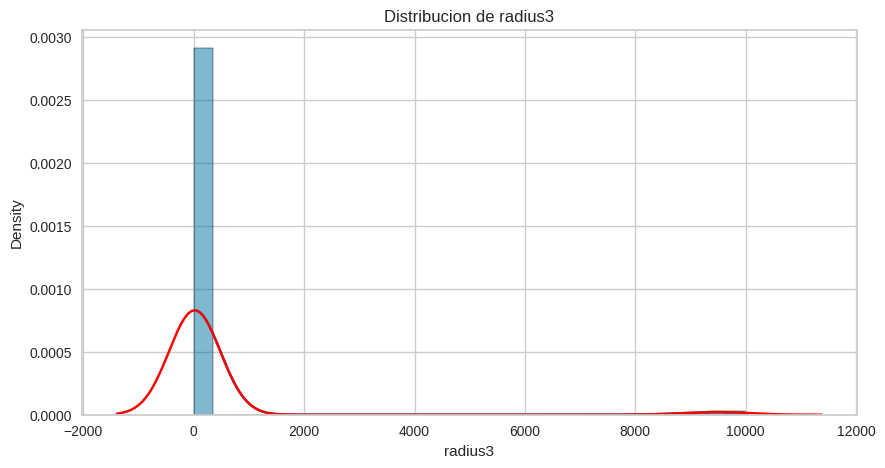

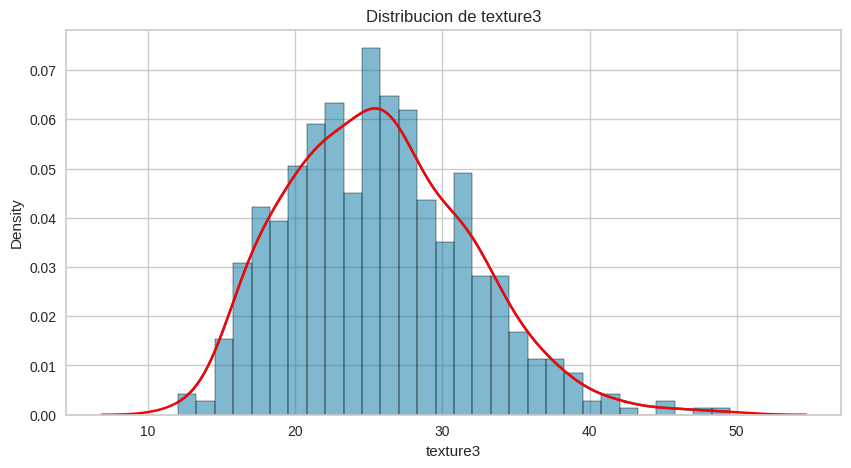

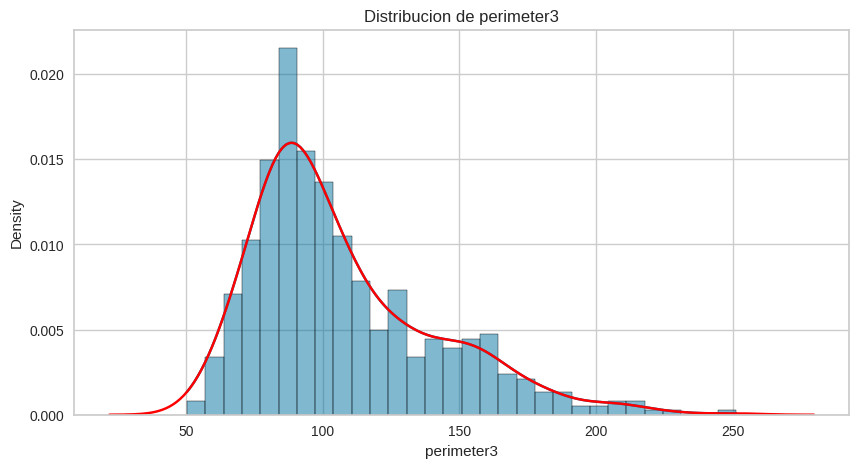

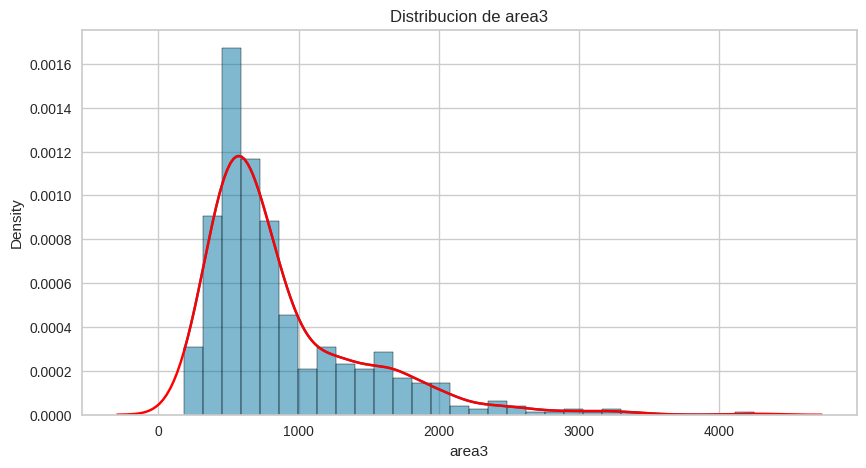

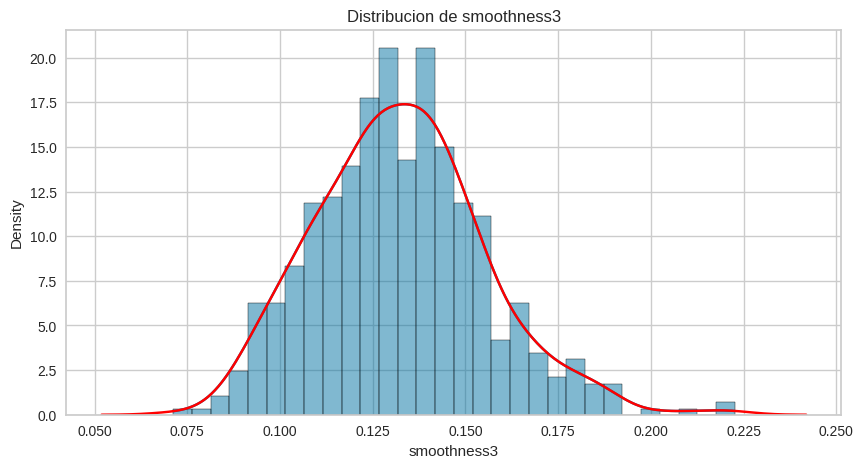

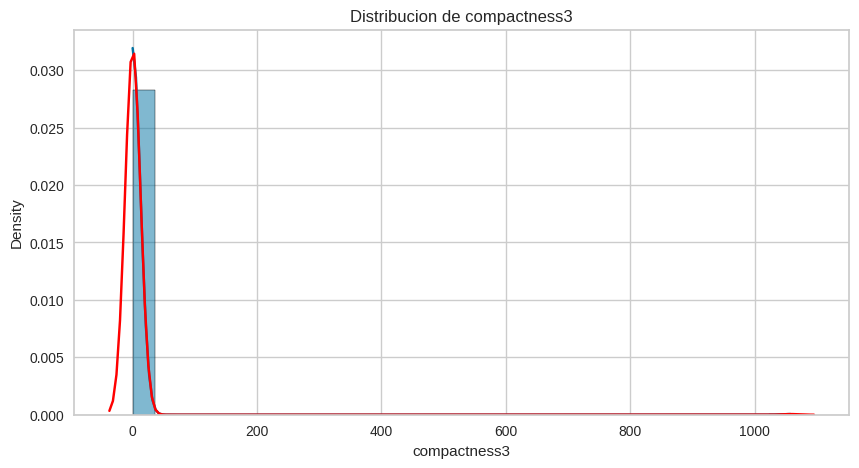

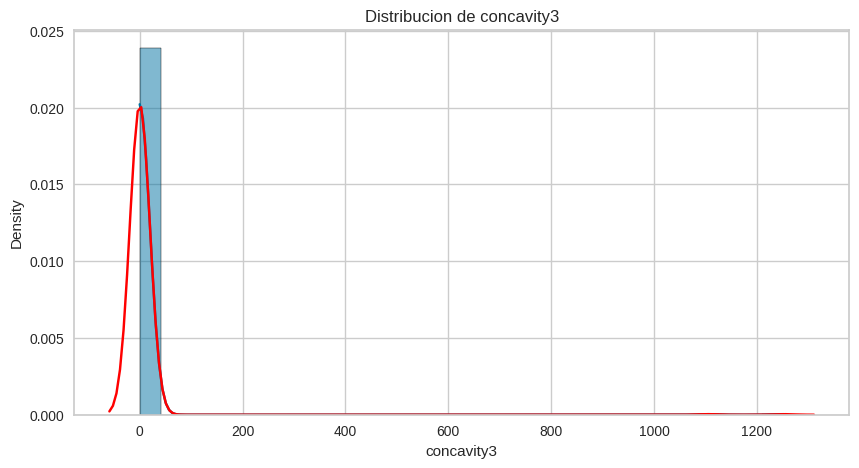

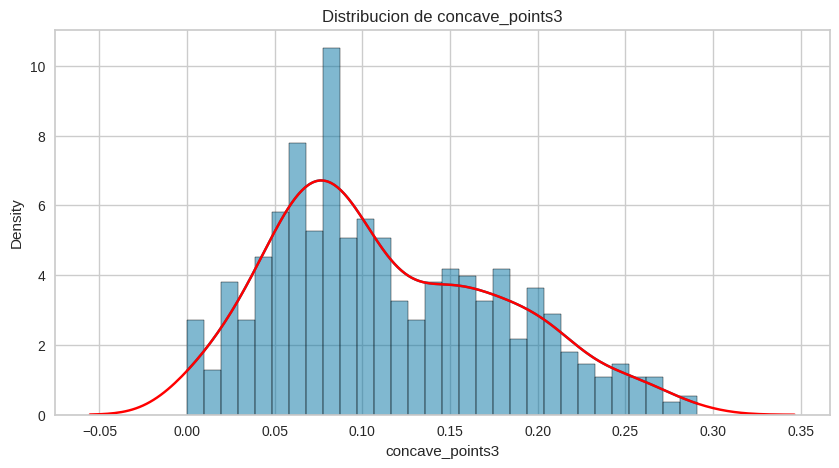

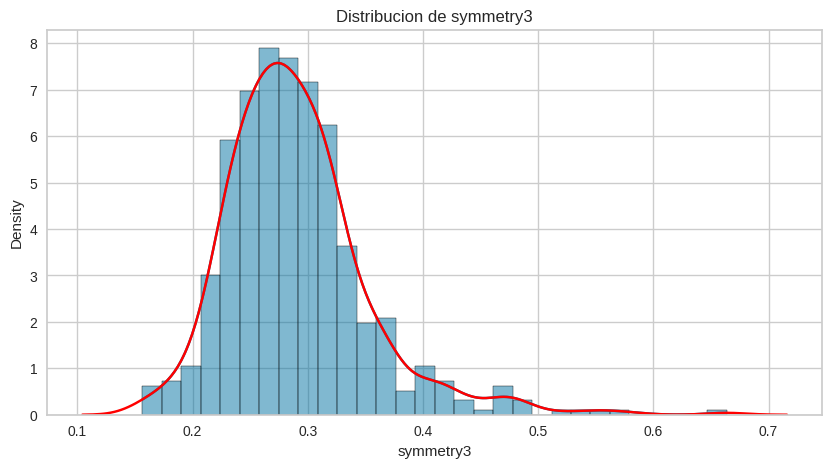

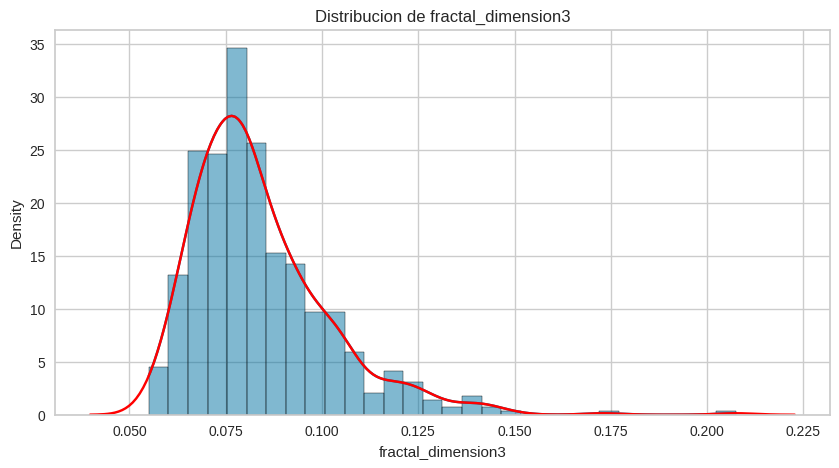

In [ ]:
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    plt.title(f'Distribucion de {col}')
    sns.histplot(df[col], bins=30, kde=True, stat='density')
    sns.kdeplot(df[col], color='red')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.savefig(f'density_{col}_plot.png')
    plt.show()

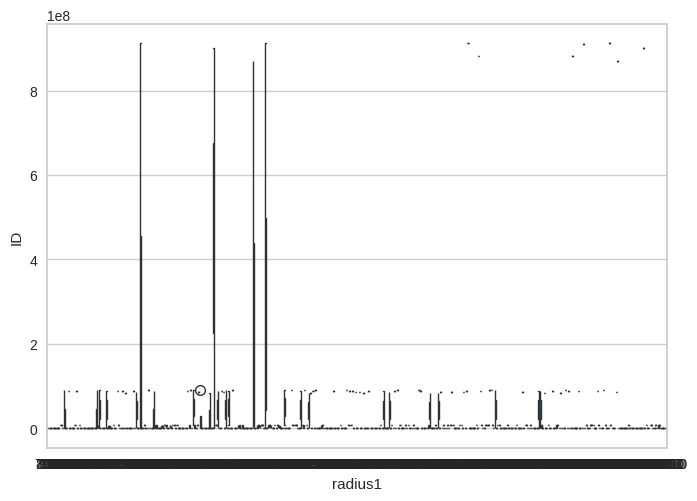

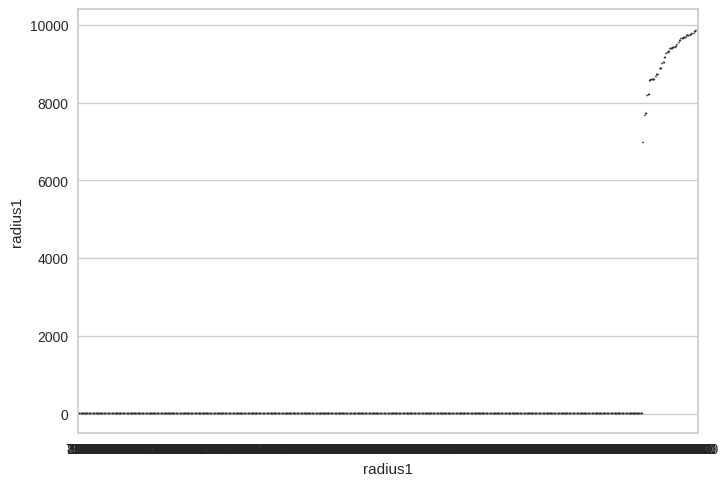

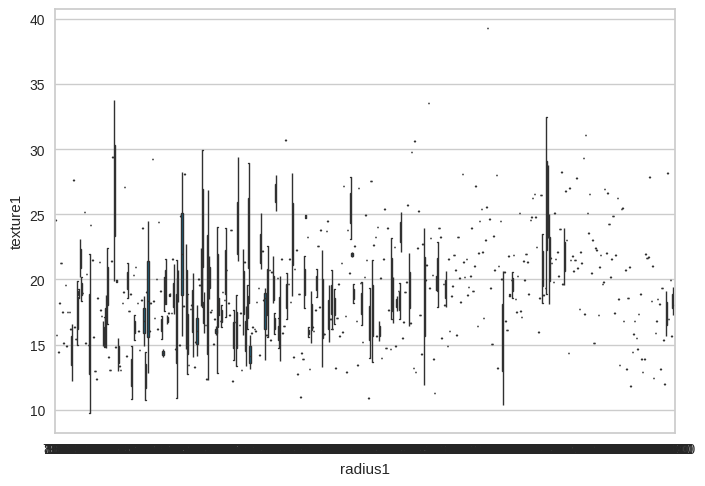

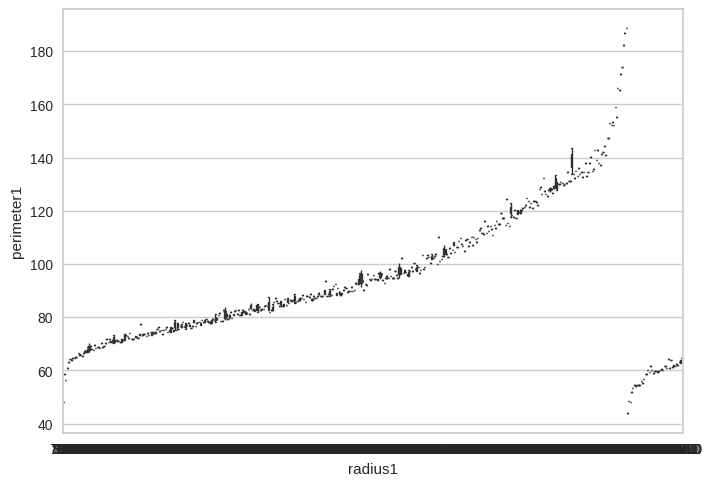

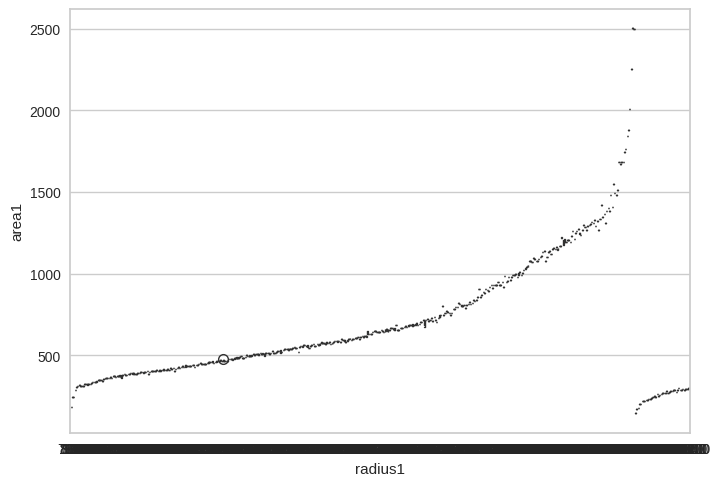

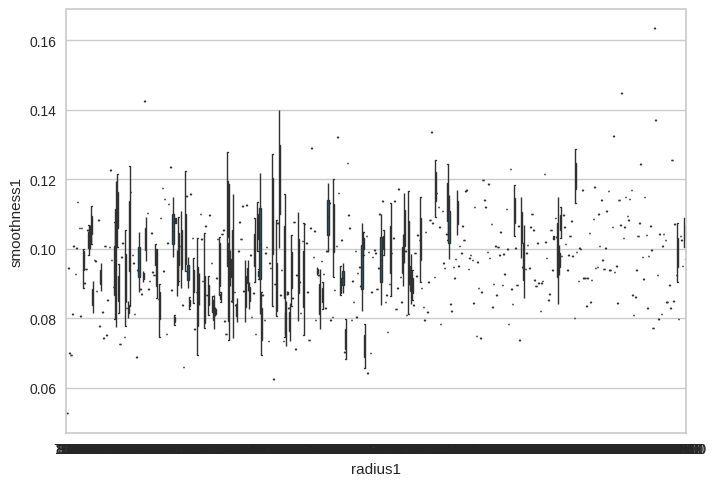

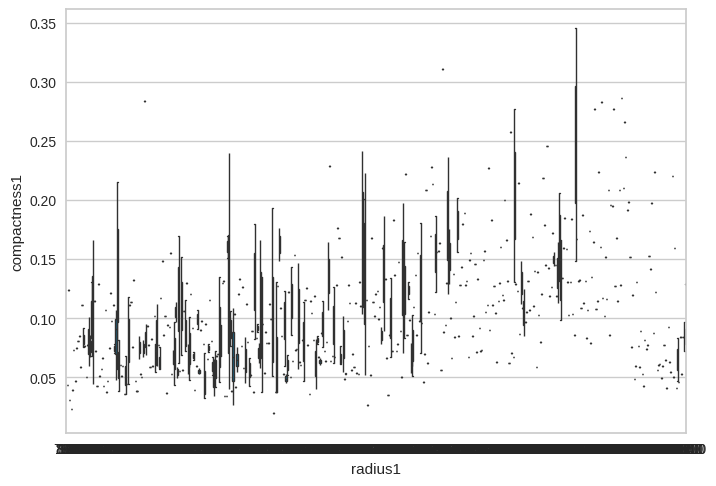

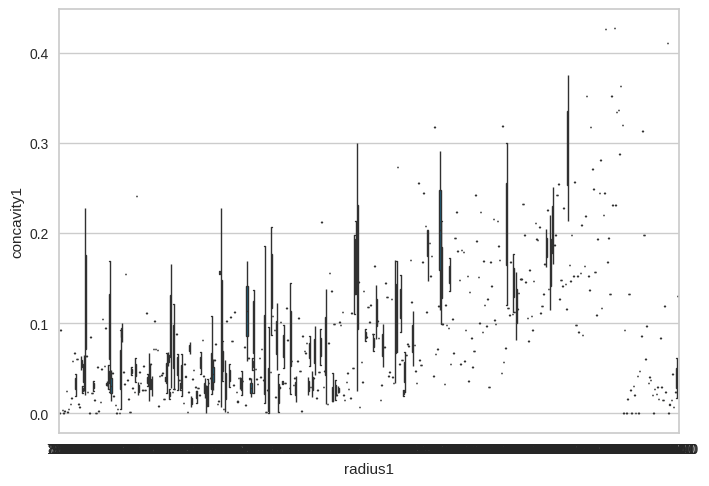

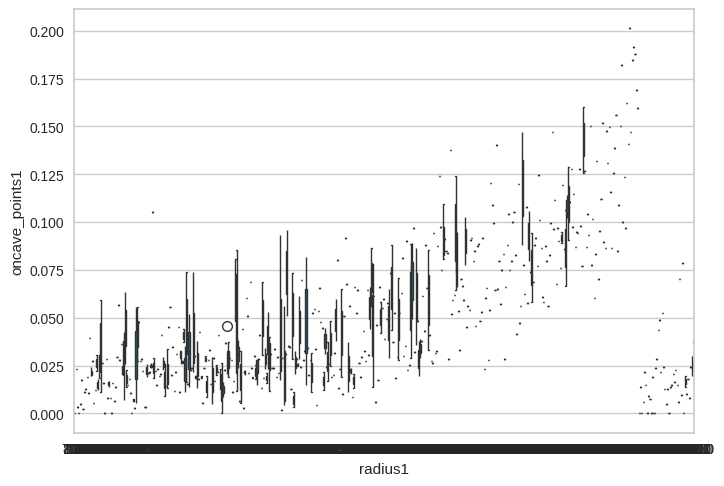

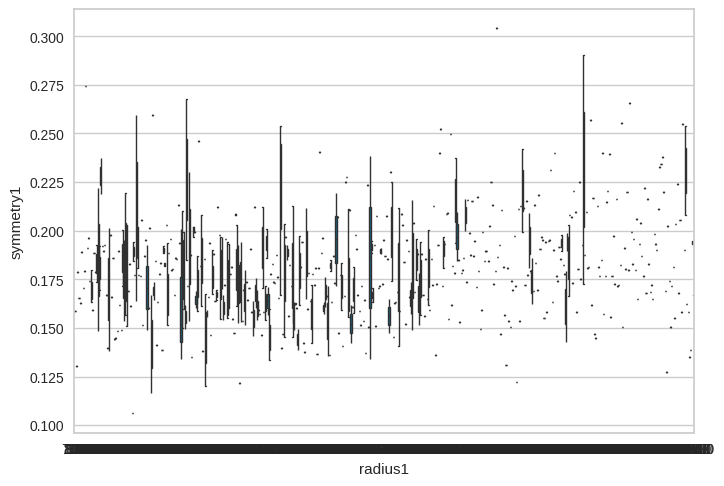

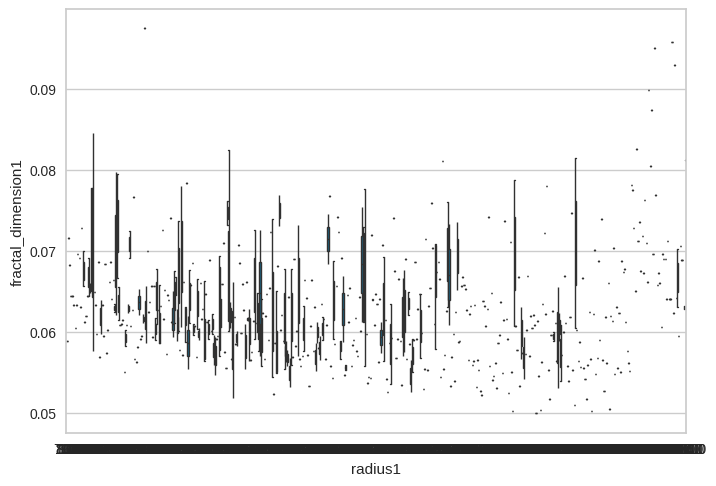

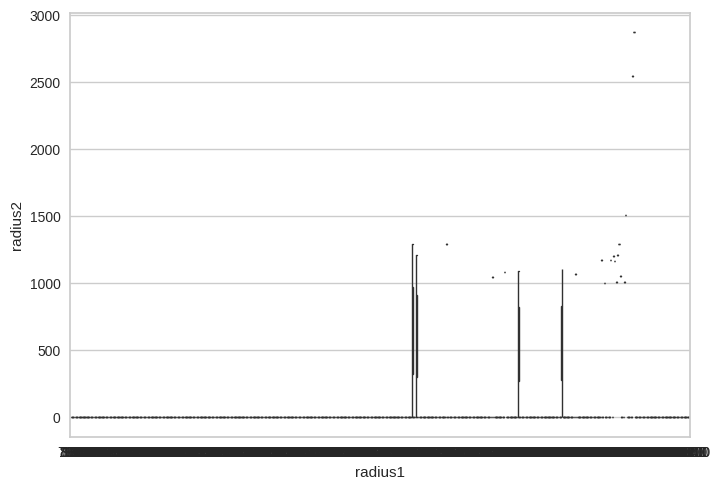

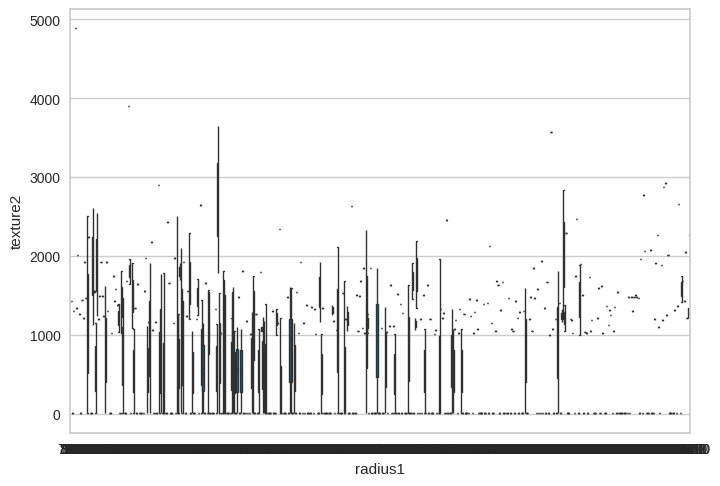

KeyboardInterrupt: 

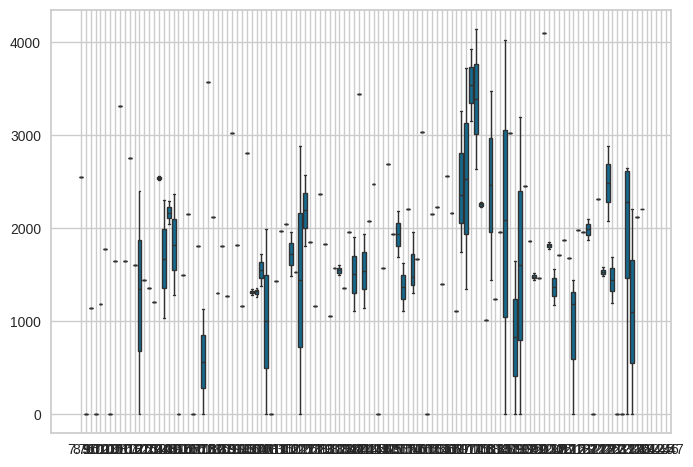

In [ ]:
def bivariate_analysis_numerical(df, var_target, var_numerical):
    for col in var_numerical:
        sns.boxplot(x=var_target,y=col,data=df)
        plt.show()

bivariate_analysis_numerical(df,'radius1',numerical_features)

KeyboardInterrupt: 

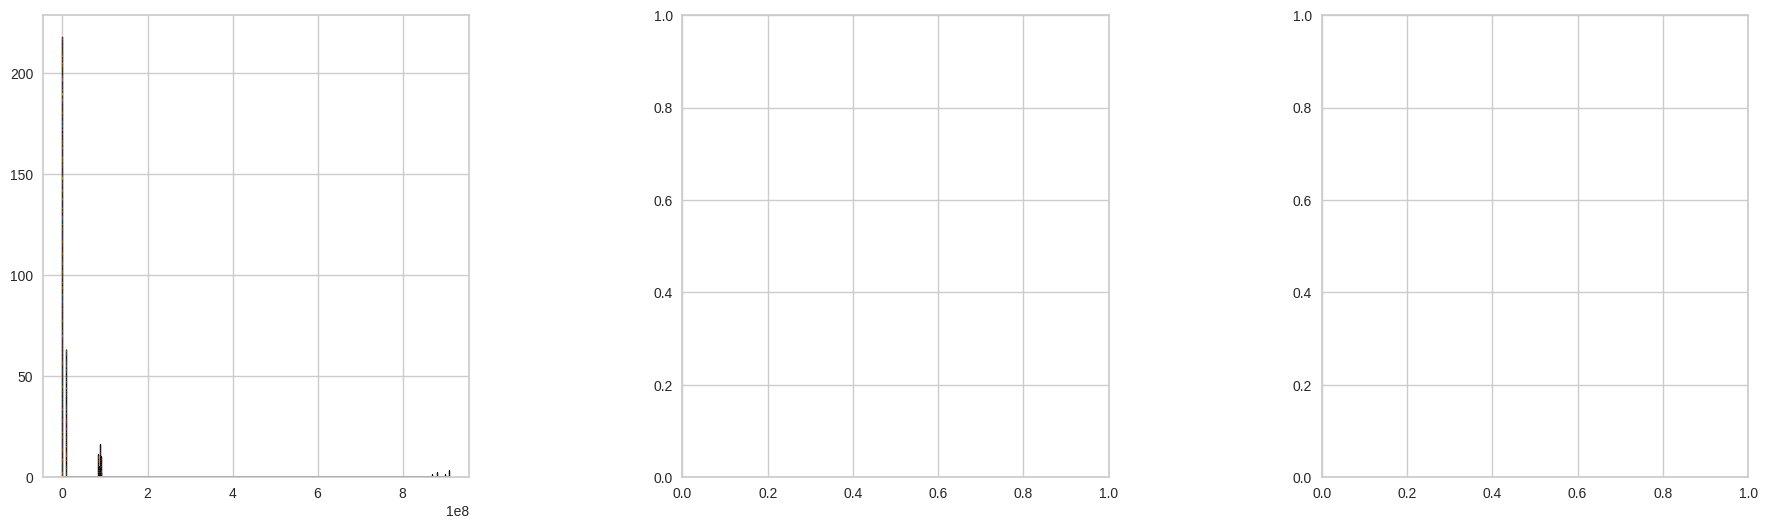

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 6), squeeze=False, gridspec_kw={'hspace': 0.5, 'wspace': 0.5})

for i, feature in enumerate(numerical_features):
    row = i // 3  # Calcular el índice de la fila
    col = i % 3   # Calcular el índice de la columna
    sns.histplot(x=df[feature], hue=df['radius1'], multiple="stack", palette="Set1", ax=axes[row, col])
    axes[row, col].set_title(feature)  # Añadir títulos a las subtramas
    plt.savefig("complete_histogram.png")

plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(22 , 22), squeeze = True, gridspec_kw=None)
for i, feature in enumerate(categorical_features[:-1]):
    fila = int(i / 4)
    columna = i % 4
    sns.histplot(x = df[feature], hue = df['radius1'], multiple = "stack", palette = "Set1", ax=axes[fila, columna])
plt.savefig("bivariate_cat_histogram.png")

In [ ]:
# análisis de variable objetivo
df['radius1'].value_counts()

12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: radius1, Length: 456, dtype: int64

In [ ]:
balance_ratio = df['radius1'].value_counts(normalize=True)

print("Grado de balanceo del atributo objetivo:")
print(balance_ratio)
print("-----------------------------------------")

fig = px.pie(df, values=df['radius1'].value_counts().values, names=df['radius1'].value_counts().index)
fig.update_traces(textinfo='percent+label', pull=[0.05, 0.05])  # Etiquetas y separación

fig.update_layout(
    title='Pie Chart - "radius1"',
)

fig.write_html("pie_chart.html")

fig.show()

Grado de balanceo del atributo objetivo:
12.34    0.007030
11.71    0.005272
12.46    0.005272
13.05    0.005272
10.26    0.005272
           ...   
12.23    0.001757
14.45    0.001757
19.18    0.001757
18.08    0.001757
7.76     0.001757
Name: radius1, Length: 456, dtype: float64
-----------------------------------------


In [ ]:
fig = px.histogram(df, x=df['radius1'].value_counts().index, y=df['radius1'].value_counts().values,title='Balance entre las Clases del Atributo Objetivo "Churn"')
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_xaxes(categoryorder='total ascending')

fig.update_layout(
    xaxis_title='Clase',
    yaxis_title='Cantidad',
    showlegend=False
)
fig.show()

In [ ]:
print(categorical_features[:-1])

Index([], dtype='object')


In [ ]:
# codificación de variables categóricas
label_encoders = {}

for cate in categorical_features[:-1]:
    le = LE()
    df[cate] = le.fit_transform(df[cate])
    label_encoders[cate] = dict(zip(le.classes_, le.transform(le.classes_)))

for var in categorical_features[:-1]:
    print('---------------------------------------------------')
    print(f'La Variable: {var} tiene este diccionario de codificación:\n')
    print(label_encoders[var])

In [ ]:
df.head()

ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  oncave_points1  ...  radius3  texture3  \
0       0.27760      0.3001         0.14710  ...    25.38     17.33   
1       0.07864      0.0869         0.07017  ...    24.99     23.41   
2       0.15990      0.1974         0.12790  ...    23.57     25.53   
3       0.28390      0.2414         0.10520  ...    14.91     26.50   
4       0.13280      0.1980         0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   

   symmetry3  fractal_dimension3  
0     0.4601             0.11890  
1     0.2750             0.08902  
2     0.3613             0.08758  
3     0.6638             0.17300  
4     0.2364             0.07678  

[5 rows x 32 columns]

In [ ]:
df1 = df.copy()

In [ ]:
df1_majority = df1[df1.Diagnosis == "B"]
df1_minority = df1[df1.Diagnosis == "M"]

churn_distribution = df1['Diagnosis'].value_counts()

df1_minority_upsampled = resample(df1_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=churn_distribution["M"],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df1_upsampled = pd.concat([df1_majority, df1_minority_upsampled])

# Display new class counts
upsampled_churn_distribution = df1_upsampled['Diagnosis'].value_counts()

In [ ]:
df1.head()

ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  oncave_points1  ...  radius3  texture3  \
0       0.27760      0.3001         0.14710  ...    25.38     17.33   
1       0.07864      0.0869         0.07017  ...    24.99     23.41   
2       0.15990      0.1974         0.12790  ...    23.57     25.53   
3       0.28390      0.2414         0.10520  ...    14.91     26.50   
4       0.13280      0.1980         0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   

   symmetry3  fractal_dimension3  
0     0.4601             0.11890  
1     0.2750             0.08902  
2     0.3613             0.08758  
3     0.6638             0.17300  
4     0.2364             0.07678  

[5 rows x 32 columns]

In [ ]:
df1['radius1'].value_counts()

12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: radius1, Length: 456, dtype: int64

In [ ]:
label_encoders = {}

le = LE()
df1['radius1'] = le.fit_transform(df1['radius1'])
label_encoders['radius1'] = dict(zip(le.classes_, le.transform(le.classes_)))

print('---------------------------------------------------')
print(f'La Variable: radius1 tiene este diccionario de codificación:\n')
print(label_encoders['radius1'])

---------------------------------------------------
La Variable: radius1 tiene este diccionario de codificación:

{7.76: 0, 8.95: 1, 9.0: 2, 9.72: 3, 10.03: 4, 10.05: 5, 10.08: 6, 10.16: 7, 10.17: 8, 10.18: 9, 10.2: 10, 10.25: 11, 10.26: 12, 10.29: 13, 10.32: 14, 10.44: 15, 10.48: 16, 10.49: 17, 10.51: 18, 10.57: 19, 10.6: 20, 10.65: 21, 10.66: 22, 10.71: 23, 10.75: 24, 10.8: 25, 10.82: 26, 10.86: 27, 10.88: 28, 10.9: 29, 10.91: 30, 10.94: 31, 10.95: 32, 10.96: 33, 10.97: 34, 11.04: 35, 11.06: 36, 11.08: 37, 11.13: 38, 11.14: 39, 11.15: 40, 11.16: 41, 11.2: 42, 11.22: 43, 11.25: 44, 11.26: 45, 11.27: 46, 11.28: 47, 11.29: 48, 11.3: 49, 11.31: 50, 11.32: 51, 11.33: 52, 11.34: 53, 11.36: 54, 11.37: 55, 11.41: 56, 11.42: 57, 11.43: 58, 11.45: 59, 11.46: 60, 11.47: 61, 11.49: 62, 11.5: 63, 11.51: 64, 11.52: 65, 11.54: 66, 11.57: 67, 11.6: 68, 11.61: 69, 11.62: 70, 11.63: 71, 11.64: 72, 11.66: 73, 11.67: 74, 11.68: 75, 11.69: 76, 11.7: 77, 11.71: 78, 11.74: 79, 11.75: 80, 11.76: 81, 11.8: 8

In [ ]:
df1.head()

ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M      329     10.38      122.80  1001.0      0.11840   
1    842517         M      385     17.77      132.90  1326.0      0.08474   
2  84300903         M      365     21.25      130.00  1203.0      0.10960   
3  84348301         M       57     20.38       77.58   386.1      0.14250   
4  84358402         M      377     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  oncave_points1  ...  radius3  texture3  \
0       0.27760      0.3001         0.14710  ...    25.38     17.33   
1       0.07864      0.0869         0.07017  ...    24.99     23.41   
2       0.15990      0.1974         0.12790  ...    23.57     25.53   
3       0.28390      0.2414         0.10520  ...    14.91     26.50   
4       0.13280      0.1980         0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   

   symmetry3  fractal_dimension3  
0     0.4601             0.11890  
1     0.2750             0.08902  
2     0.3613             0.08758  
3     0.6638             0.17300  
4     0.2364             0.07678  

[5 rows x 32 columns]

Etapa 3: Modelamiento
Se procede a elaborar el código de la modelación y la definición de la muestra de entrenamiento

In [ ]:
def split_data(df, target_column, test_size=0.20, random_state=None):
    """
    Divide un DataFrame en conjuntos de entrenamiento y prueba, y devuelve las características y las etiquetas para ambos conjuntos.

    Parameters:
        df (pd.DataFrame): DataFrame original.
        target_column (str): Nombre de la columna objetivo.
        test_size (float, optional): Proporción del conjunto de prueba. Por defecto es 0.3.
        random_state (int, optional): Semilla aleatoria para reproducibilidad. Por defecto es None.

    Returns:
        tuple: Cuatro DataFrames: X_train, X_test, y_train, y_test.
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

Split del dataset
Para efectos del entrenamiento del modelo, fijamos el 80% de los datos totales para el entrenamiento y 20% para la prueba:

In [ ]:
df2 = df.copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('Diagnosis', axis=1), df2['Diagnosis'], test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Tamaño del conjunto de prueba: X_test: {X_test.shape}, y_test: {y_test.shape}")

Tamaño del conjunto de entrenamiento: X_train: (455, 31), y_train: (455,)
Tamaño del conjunto de prueba: X_test: (114, 31), y_test: (114,)


Modelos

A continuación se definen los parámetros a evaluar en las hipótesis planteadas inicialmente. Los modelos a evaluar para el dataset preparado y transformado son los siguientes:

Regresión logística

Bosque Aleatorio

In [ ]:
param_grid_mod1 = {
    'penalty': ['l1','l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

param_grid_mod2 = {
    'n_estimators': [50, 100, 250],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

De acuerdo con lo anterior que se han definido los siguientes hiperparámetros para la regresión logística:

Regularización('penalty), con el objeto de evitar sobreajuste, con los métodos l1 para Lasso y l2 para Ridge.

Fuerza de la regulazización, "C". Constante con tres valores: 0.1, 1 y 10.

Solver: Acá sólo utilizamos el algoritmo "liblineal" para ajustar los pesos de la regresión.

En total, tendríamos un total de 6 combinaciones de hiperparámetros para la evaluación de este modelo.

Por otro lado, para el caso de los Random Forest a evaluar, vamos a definir los siguientes hiperparámetros:

Número de árboles ('n_estimators): El número de árboles que tendrá el bosque. Evaluaremos con 50, 100 y 250 árboles, adecuado para el tamaño del dataset a estudiar.

Profundidad máxima ('max_depth'): Define cuán profundo pueden crecer los ábholes. Para el tamaño de la muestra consideramos adecuado simular con los valores 10, 20 y 30.

Mínimo de muestras para definir un nodo ('min_samples_split'): Usamos los valores de 2, 5 y 10, adecuados para el tamaño del dataset y para prevenir sobreajuste.

Mínimo número de muestras en hojas terminales ('min_samples_leaf'): Usamos los valores 1, 2 y 4, adecuado para el tamaño del dataset.

Esto significa que tenemos un total de 81 posibles combinaciones de todos los parámetros definidos (3 cantidades de árboles, 3 parámetros de profundidad máxima, 3 del mínimo de muestras por nodo y 3 de mínimo de muestras en hojas terminales. (3^4 parámetros).

In [ ]:
models = {
    'LogisticRegression': (LogisticRegression(random_state=42,max_iter=500), param_grid_mod1),
    'RandomForestClassifier': (RandomForestClassifier(random_state=42), param_grid_mod2),
}

Ahora bien y a partir de las definiciones de hiperparámetros descritas, se procede a la búsqueda del mejor modelo a partir de la búsqueda de hiperparámetros, al tiempo que se realiza una validación cruzada con 10 pliegues (10 folds).

Busqueda exhaustiva de hiperparametros - Grid Search
A continuación se establece la búsqueda exhaustivade los hiperparámetros de cada modelo a partir de Grid Search. Se plantea un esquema de validacion con 10 folds, con el objetivo de tener una mejor estimación de los hiperparámetros que mejor se ajustan a los modelos planteados.

En el caso del modelo de regresión logística, se configuraron 6 parámetros en total, lo que significa que el modelo se correría un total de 60 veces (1 vez por cada pliegue en los datos, para el ejercicio solicitado de validación cruzada).

En el caso del Random Forest, donde se predefinieron 81 parámetros y 10 pliegues, se modelarían un total de 810 modelos. Vale la pena señalar que el costo computacional al que nos enfrentaríamos con el random forest puede llegar a ser alto

In [ ]:
# DataFrame para almacenar los resultados
columns = ['Modelo', 'Número de iteraciones', 'Mejor accuracy', 'Tiempo empleado']
results_grid = pd.DataFrame(columns=columns)

# Realizando la búsqueda en cuadrícula para cada modelo
for model_name, (model, param_grid) in tqdm(models.items()):
    gs = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=10,
                    n_jobs=-1,
                    verbose=2)
    print(f"Realizando Grid Search para el modelo {model_name}...")
    # Medir el tiempo de ejecución
    time_start = time.time()
    gs.fit(X_train, y_train)
    time_grid = time.time() - time_start

    values_grid  = [model_name, len(gs.cv_results_['params']), gs.best_score_, time_grid]
    result_df    = pd.DataFrame([values_grid], columns=columns)
    results_grid = pd.concat([results_grid, result_df], ignore_index=True)
    print('El resultado del modelo es: ', gs.best_score_)

# Visualizar los resultados
print("Resultados de Grid Search:")
print(results_grid)

  0%|          | 0/2 [00:00<?, ?it/s]

Realizando Grid Search para el modelo LogisticRegression...
Fitting 10 folds for each of 6 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

 50%|█████     | 1/2 [01:26<01:26, 86.60s/it]

El resultado del modelo es:  0.9604830917874396
Realizando Grid Search para el modelo RandomForestClassifier...
Fitting 10 folds for each of 81 candidates, totalling 810 fits


100%|██████████| 2/2 [04:55<00:00, 147.69s/it]

El resultado del modelo es:  0.9670048309178745
Resultados de Grid Search:
                   Modelo Número de iteraciones  Mejor accuracy  \
0      LogisticRegression                     6        0.960483   
1  RandomForestClassifier                    81        0.967005   

   Tiempo empleado  
0        86.596929  
1       208.775360  


En esta simulación vale la pena señalar que la precisión estuvo alrededor del 76% para el mejor de los modelos simulados de regresión logística, mientras que el mejor modelo de Random Forest presentó una presición del 90% aproximadamente. No obstante, en el entorno de ejecución en el que se hizo la corrida, el costo computacional para el Random Forest fue bastante superior.

Busqueda aleatoria de hiperparametros - Random Search
A continuación se establece la búsqueda aleatoria de los hiperparámetros de cada modelo, de la misma forma cómo se corrió la búsqueda exhaustiva:

In [ ]:
# DataFrame para almacenar los resultados
columns = ['Modelo', 'Número de iteraciones', 'Mejor accuracy', 'Tiempo empleado']
results_grid = pd.DataFrame(columns=columns)

# Realizando la búsqueda aleatoria para cada modelo
for model_name, (model, param_grid) in tqdm(models.items()):
    rs = RandomizedSearchCV(estimator=model,
                            param_distributions=param_grid,
                            scoring='f1_weighted',
                            cv=10,
                            n_jobs=-1,
                            verbose=2,
                            n_iter=400)
    print(f"Realizando Random Search para el modelo {model_name}...")
    # Medir el tiempo de ejecución
    time_start = time.time()
    rs.fit(X_train, y_train)
    time_grid = time.time() - time_start

    # Almacenar los resultados
    values_grid  = [model_name, len(rs.cv_results_['params']), rs.best_score_, time_grid]
    result_df    = pd.DataFrame([values_grid], columns=columns)
    results_grid = pd.concat([results_grid, result_df], ignore_index=True)
    print(f'El resultado del modelo {model_name} es: ', rs.best_score_)
# Visualizar los resultados
print("Resultados de Random Search:")
print(results_grid)

  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=400. Running 6 iterations. For exhaustive searches, use GridSearchCV.



Realizando Random Search para el modelo LogisticRegression...
Fitting 10 folds for each of 6 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

 50%|█████     | 1/2 [01:35<01:35, 95.89s/it]/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 81 is smaller than n_iter=400. Running 81 iterations. For exhaustive searches, use GridSearchCV.



El resultado del modelo LogisticRegression es:  0.9601307979039451
Realizando Random Search para el modelo RandomForestClassifier...
Fitting 10 folds for each of 81 candidates, totalling 810 fits


100%|██████████| 2/2 [05:02<00:00, 151.07s/it]

El resultado del modelo RandomForestClassifier es:  0.9668814308209356
Resultados de Random Search:
                   Modelo Número de iteraciones  Mejor accuracy  \
0      LogisticRegression                     6        0.960131   
1  RandomForestClassifier                    81        0.966881   

   Tiempo empleado  
0        95.881838  
1       206.257435  


[ ]
# DataFrame para almacenar los resultados
columns = ['Modelo', 'Número de iteraciones', 'Mejor accuracy', 'Tiempo empleado']
results_grid = pd.DataFrame(columns=columns)

# Realizando la búsqueda aleatoria para cada modelo
for model_name, (model, param_grid) in tqdm(models.items()):
    rs = RandomizedSearchCV(estimator=model,
                            param_distributions=param_grid,
                            scoring='f1_weighted',
                            cv=10,

Los resultados observados son similares que los obtenidos bajo el método de Grid Search. Esto se debe a que si bien con la búsqueda aleatoria de hiperparámetros se hacen un número de fit que no son los mismos que los de la búsqueda exhaustiva, se encuentra una configuración de parámetros muy parecida la de esta última.

El tiempo empleado también implica un costo computacional interesante pero que no varía respecto a la búsqueda exhaustiva.

Busqueda bayesiana de hiperparametros - Bayes Search

Finalmente se utiliza otro método que es la búsqueda bayesiana para definir cuáles serían los mejores parámetros de cada uno de los hiperparámetros de los dos modelos seleccionados

In [ ]:
# Se instala la librería requerida
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.3 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
# DataFrame para almacenar los resultados
columns = ['Modelo', 'Número de iteraciones', 'Mejor accuracy', 'Tiempo empleado']
results_grid = pd.DataFrame(columns=columns)

# Realizando la búsqueda aleatoria para cada modelo
for model_name, (model, param_grid) in tqdm(models.items()):
    bs = BayesSearchCV(estimator=model,
                        search_spaces=param_grid,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1,
                        verbose=2,
                        n_iter=50)
    print(f"Realizando Bayes Search para el modelo {model_name}...")
    # Medir el tiempo de ejecución
    time_start = time.time()
    bs.fit(X_train, y_train)
    time_grid = time.time() - time_start

    # Almacenar los resultados
    values_grid  = [model_name, len(bs.cv_results_['params']), bs.best_score_, time_grid]
    result_df    = pd.DataFrame([values_grid], columns=columns)
    results_grid = pd.concat([results_grid, result_df], ignore_index=True)
    print('El resultado del modelo es: ', bs.best_score_)

Modelo 1 -
Utilización de las métricas de evaluación adecuadas
A continuación, despues de efectuar la modelación, se opta por seleccionar el modelo con mayor precisión en el entrenamiento con el objetivo de evaluar su desempeño en el conjunto de pruebas con las métricas de evaluación adecuadas.

En el caso del modelo de regresión logística, procedemos con el siguiente código y los 6 parámetros antes descritos a definir el mejor set disponible:

In [ ]:
param_grid_mod1 = {
    'penalty': ['l1','l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}
models = {
    'LogisticRegression': (LogisticRegression(random_state=42,max_iter=500), param_grid_mod1),
}

# DataFrame para almacenar los resultados
columns = ['Modelo', 'Número de iteraciones', 'Mejor accuracy', 'Tiempo empleado']
results_grid = pd.DataFrame(columns=columns)

# Realizando la búsqueda en cuadrícula para cada modelo
for model_name, (model, param_grid) in tqdm(models.items()):
    gslr = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=10,
                    n_jobs=-1,
                    verbose=2)
    print(f"Realizando Grid Search para el modelo {model_name}...")
    # Medir el tiempo de ejecución
    time_start = time.time()
    gslr.fit(X_train, y_train)
    time_grid = time.time() - time_start

    values_grid  = [model_name, len(gslr.cv_results_['params']), gslr.best_score_, time_grid]
    result_df    = pd.DataFrame([values_grid], columns=columns)
    results_grid = pd.concat([results_grid, result_df], ignore_index=True)
    print('El resultado del modelo es: ', gslr.best_score_)

# Visualizar los resultados
print("Resultados de Grid Search:")
print(results_grid)

  0%|          | 0/1 [00:00<?, ?it/s]

Realizando Grid Search para el modelo LogisticRegression...
Fitting 10 folds for each of 6 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

100%|██████████| 1/1 [01:32<00:00, 92.68s/it]

El resultado del modelo es:  0.9604830917874396
Resultados de Grid Search:
               Modelo Número de iteraciones  Mejor accuracy  Tiempo empleado
0  LogisticRegression                     6        0.960483         92.67304


Con el siguiente código, definimos los mejores parámetros para el modelo de regresión logística:

In [ ]:
print("Los parametros de Logistic Regression con GridSearch son: ", gslr.best_params_)

Los parametros de Logistic Regression con GridSearch son:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


En este caso, optamos por un valor de C de 10, El método de regularización l1 (Regressión Lasso) y optimización "liblinear".

Las métricas para este modelo son las siguientes:

In [ ]:
lr = LogisticRegression(**gslr.best_params_)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Los resultados no son dispares entre si en el puntaje f-1 Score en el modelo de regresión logística con los parámetros seleccionados. No obstante, no existe una diferencia tanto en el precision como en el recall en la misma orientación que la esperada teóricamente.

Accuracy de 0.97: Indica que el modelo tuvo una precisión total (accuracy) del 96% en las predicciones del conjunto de test. Es decir, clasificó correctamente el 97% de las muestras.

Recall de 0.97 para Dianostico B: Detectó correctamente el 97% de las muestras reales de Diagnostico B.
F1-score de 0.97 para Diagnostico B: Representa el balance entre precisión y recall. Es útil cuando hay clases desequilibradas.
Y de forma similar para Diagnostico M - "Malo":

Precision 96%
Recall 96%
F1 96%
En resumen, el modelo funciona  bien.

Para verificar los resultados, procedemos a realizar la matriz de confusión:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



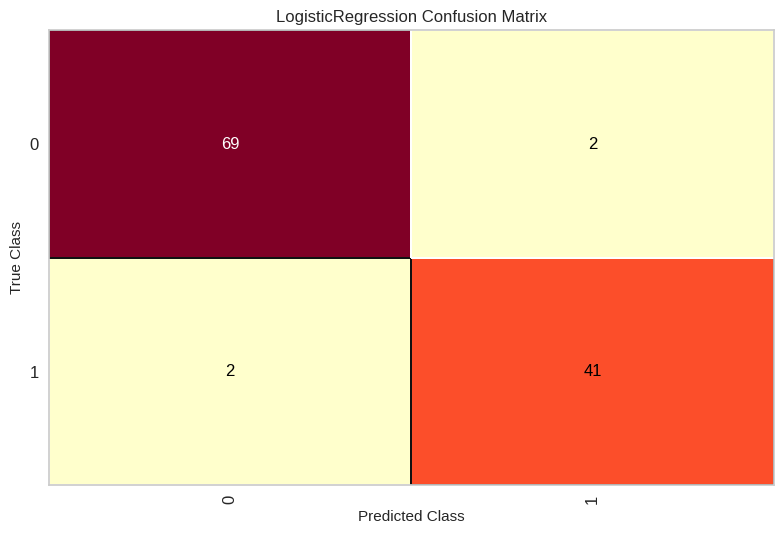

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm = ConfusionMatrix(lr, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

Para mejorar la visualización de los resultados, presentamos un reporte gráfico con las principales métricas de evaluación de la regresión logística seleccionada con su respectiva curva ROC:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/classification_report.py:204: RuntimeWarning:

invalid value encountered in divide



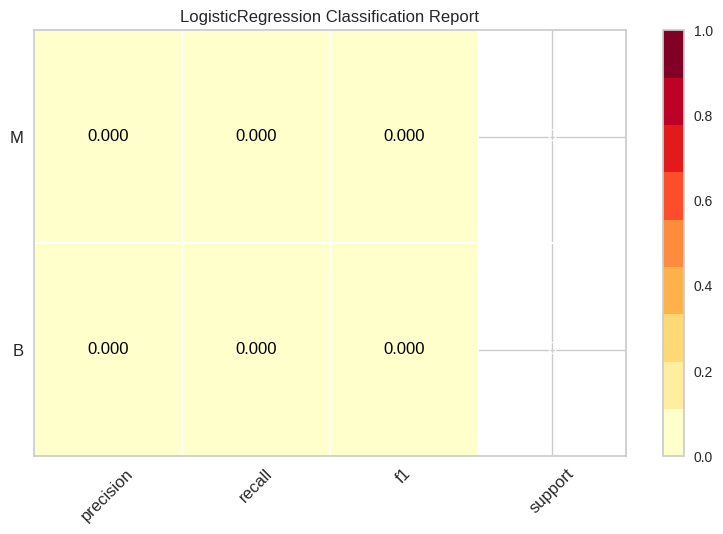

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [ ]:
visualizer = ClassificationReport(lr, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
visualizer = ROCAUC(lr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Modelo 2- Utilización de las métricas de evaluación adecuadas
Pasamos a evaluar las métricas del modelo de Random Forest.

En primer lugar, después de efectuar el tuning de hiperparámetros con la validación cruzada, se escogen los mejores modelos de los trés métodos de búsqueda de hiperparmetros:

In [ ]:
# Random Forest
print("Los parametros de Random Forest con GridSearch son: ", gs.best_params_)
print("Los parametros de Random Forest con RandomSearch son: ", rs.best_params_)
print("Los parametros de Random Forest con BayesSearch son: ", bs.best_params_)

Los parametros de Random Forest con GridSearch son:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 250}
Los parametros de Random Forest con RandomSearch son:  {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}


NameError: name 'bs' is not defined

Al respecto, se escoge el resultado de la búsqueda exhaustiva, cuyos resultados fueron los mismos del método Bayes Search. Los hiperparámetros seleccionados son los siguientes:

Número de árboles ('n_estimators): 250

Profundidad máxima ('max_depth'): 10

Mínimo de muestras para definir un nodo: 5

Mínimo número de muestras en hojas terminales: 1

Lo anterior, dado que fue la configuración del random forest de mejor desempeño en precision. A continuacion, presentamos las métricas de evaluación:

In [ ]:
rf = RandomForestClassifier(**gs.best_params_)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Los resultados de las métricas de las corridas sobre el conjunto de pruebas son las siguientes:

Accuracy total de 0.96: indica que el modelo tuvo una precisión total (accuracy) del 96%. Indica un muy buen modelo predictivo.
Para Diagnostico B- "Bueno":

Precision: 0.96 quiere decir que el 96% de las muestras que predijo como Diagnostico B. Muy buena capacidad de no tener falsos positivos.
Recall: 0.99 indica que detectó correctamente el 99% de las muestras positivas reales de Diagnostico B. Un buen recall.
F1 Score: 0.95 balance entre precisión y recall. Muy bueno también.
Para Diagnostico M "Malo":

Demuestra algo opuesto, un poco más bajo en recall (93%) pero con mejor precision (98%).

El F1 Score equilibra bien considerando las diferencias de relevancia entre precision y recall según el caso de uso.

En resumen, este modelo está muy bien entrenado con métricas altas tanto por clase como en la precisión global. Registra claramente un mucho mejor desempeño que los resultados para la regresión logística

Para una mejor visualización de los resultados que se acaban de describir, se dibu

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



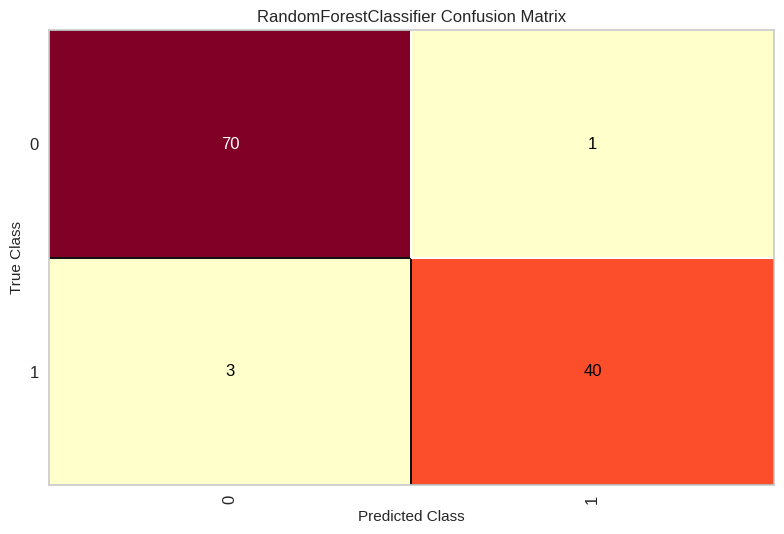

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm = ConfusionMatrix(rf, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/classification_report.py:204: RuntimeWarning:

invalid value encountered in divide



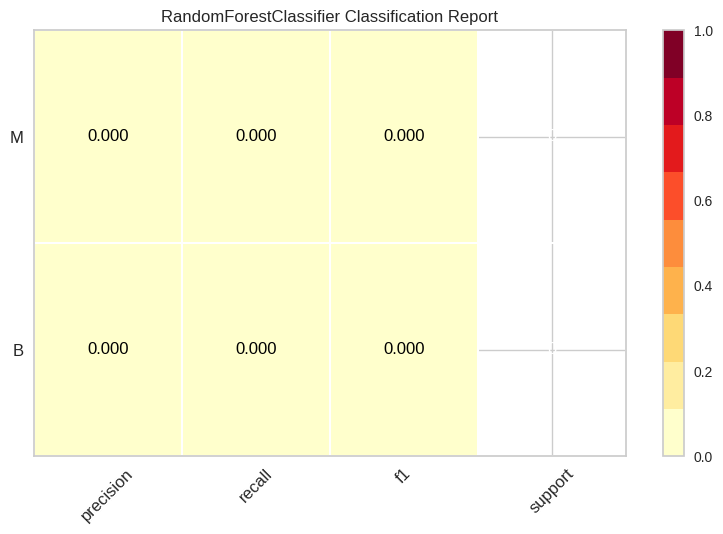

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [ ]:
visualizer = ClassificationReport(rf, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
visualizer = ROCAUC(rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

El valor del AUC de 0.96 del modelo clasificador de Random Forest indica un exelente nivel de ajuste.

En conclusión, el Random Forest es preferible en el presente ejercicio por su rendimiento tanto a nivel global como por clase. Demuestra mejor capacidad de generalización.

Lo anterior puede ser ocasionado por dos razones. La primera es la posible la presencia de relaciones no lineales entre los datos que determinan la decisión o no de un diagnostico bueno. En este caso, el clasificador de Random Forest presenta mejor rendimiento, frente a la naturaleza lineal de la regresión logística. La segunda es el balanceo por over sampling que se realizó al data set en la etapa de preparación, ya que esto puede llevar a un sobre ajuste, para el cual el Random Forest es mucho mas resistente que la regresión logística.